A discussion on the independence of the Y variable is presented by finding the invrse of a matrix through its identity. A basic understanding of linear algebra is improtant for this project.

## Linear Algebra in Numpy

In [1]:
# inverting a matrix

import numpy as np

# create array to be transformed into vectors

x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print(x1,x2,x3,sep="\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)

In [3]:
X = np.concatenate((x1,x2,x3), axis=0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [4]:
# inverting a matrix

X_inverse = X.getI()
X_inverse

matrix([[-8.5000000e+00, -1.0000000e+00,  2.2500000e+00],
        [ 1.5000000e+00, -7.6861594e-17, -2.5000000e-01],
        [ 6.5000000e+00,  1.0000000e+00, -1.7500000e+00]])

## Ordinary Least Squares

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = [0,1],
                  parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [6]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries,
                                         years[:-1]],
                                        names = data.index.names)
multi_index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1971-01-01'),
            ('AGO', '1972-01-01'),
            ('AGO', '1973-01-01'),
            ('AGO', '1974-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1976-01-01'),
            ('AGO', '1977-01-01'),
            ('AGO', '1978-01-01'),
            ('AGO', '1979-01-01'),
            ...
            ('ZWE', '2006-01-01'),
            ('ZWE', '2007-01-01'),
            ('ZWE', '2008-01-01'),
            ('ZWE', '2009-01-01'),
            ('ZWE', '2010-01-01'),
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01')],
           names=['ISO_Code', 'Year'], length=7452)

In [7]:
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [8]:
# creating lag variables

data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      1970-01-01              NaN                  NaN  
         1971-01-01              NaN                  NaN  
         1972-01-01              NaN                  NaN  
         1973-01-01              NaN                  NaN  
         1974-01-01              NaN                  NaN  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1404.0  
         2012-01-01           1604.0               1515.0  
         2013-01-01           1604.0               1604.0  
         2014-01-01           1594.0               1604.0  
         2015-01-01           1560.0               1594.0  

[7452 rows x 8 columns]

In [9]:
# calling data for one country

data = data.dropna(axis=0)
data.loc["GBR"]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2001-01-01  8.452018            6.961156                        8.234602   
2002-01-01  8.490705            7.139978                        8.144261   
2003-01-01  8.499127            7.039513                        8.245855   
2004-01-01  8.382597            6.920611                        8.069173   
2005-01-01  8.393285            6.922756                        8.265496   
2006-01-01  8.302836            6.914460                        7.982602   
2007-01-01  8.192020            6.929650                        7.644268   
2008-01-01  8.025975            6.161823                        7.807282   
2009-01-01  8.010150            6.282977                        7.979651   
2010-01-01  8.028130            6.002021                        7.971147   
2011-01-01  7.991630            6.026605                        7.966475   
2012-01-01  8.023953            6.123371                        7.825436   
2013-01-01  8.003675            6.479671                        7.812331   
2014-01-01  7.973524            6.118760                        7.829461   
2015-01-01  8.075913            6.161316                        7.921505   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2001-01-01     9.520818                          9.231009    8.312506   
2002-01-01     9.484984                          9.161324    8.522978   
2003-01-01     9.414910                          9.236219    8.559139   
2004-01-01     9.426507                          8.908917    8.587775   
2005-01-01     9.449126                          8.786506    8.542543   
2006-01-01     9.395209                          8.748802    8.473108   
2007-01-01     9.435705                          8.686429    8.264048   
2008-01-01     9.406692                          8.600234    8.153843   
2009-01-01     9.499708                          8.744129    7.544287   
2010-01-01     9.584280                          8.782008    7.801191   
2011-01-01     9.556971                          8.682056    7.726041   
2012-01-01     9.756184                          8.554477    7.860295   
2013-01-01     9.724509                          8.273205    7.728658   
2014-01-01     9.751757                          8.460951    7.706689   
2015-01-01     9.841927                          8.418714    8.036102   

            RGDP Per Capita  RGDP Per Capita Lag  
Year                                              
2001-01-01          32356.0              31619.0  
2002-01-01          32992.0              32356.0  
2003-01-01          33977.0              32992.0  
2004-01-01          34638.0              33977.0  
2005-01-01          35424.0              34638.0  
2006-01-01          36045.0              35424.0  
2007-01-01          36679.0              36045.0  
2008-01-01          36163.0              36679.0  
2009-01-01          34338.0              36163.0  
2010-01-01          34722.0              34338.0  
2011-01-01          34971.0              34722.0  
2012-01-01          35185.0              34971.0  
2013-01-01          35618.0              35185.0  
2014-01-01          36436.0              35618.0  
2015-01-01          36941.0              36436.0

In [11]:
#creating dataset for regression

y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.24   
Size of Government                          -0.24                1.00   
Legal System & Property Rights               0.67               -0.17   
Sound Money                                  0.44                0.11   
Freedom to trade internationally             0.51                0.14   
Regulation                                   0.51                0.08   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.67         0.44   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.59   
Sound Money                                                 0.59         1.00   
Freedom to trade internationally                            0.68         0.75   
Regulation                                                  0.66         0.57   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.51        0.51  
Size of Government                                            0.14        0.08  
Legal System & Property Rights                                0.68        0.66  
Sound Money                                                   0.75        0.57  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [12]:
reg_data.describe().round(2)

RGDP Per Capita  Size of Government  Legal System & Property Rights  \
count          1999.00             1999.00                         1999.00   
mean          17872.83                6.53                            5.29   
std           19089.03                1.11                            1.70   
min             523.00                3.20                            1.54   
25%            4022.50                5.76                            4.03   
50%           11488.00                6.54                            5.23   
75%           25657.00                7.31                            6.32   
max          156029.00                9.44                            9.14   

       Sound Money  Freedom to trade internationally  Regulation  
count      1999.00                           1999.00     1999.00  
mean          8.06                              7.11        6.85  
std           1.52                              1.18        1.04  
min           0.00                              2.06        2.56  
25%           7.01                              6.36        6.23  
50%           8.35                              7.28        6.89  
75%           9.38                              8.00        7.58  
max           9.89                              9.75        9.44

In [13]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     387.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.07e-290
Time:                        00:12:00   Log-Likelihood:                -21861.
No. Observations:                1999   AIC:                         4.373e+04
Df Residuals:                    1993   BIC:                         4.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -3352.8659    301.104    -11.135      0.000   -3943.377   -2762.355
Legal System & Property Rights    5137.7986    289.343     17.757      0.000    4570.351    5705.246
Sound Money                        368.8037    308.936      1.194      0.233    -237.068     974.675
Freedom to trade internationally  1904.1245    460.911      4.131      0.000    1000.206    2808.043
Regulation                        2396.0906    425.096      5.637      0.000    1562.411    3229.770
Constant                         -2.036e+04   2683.152     -7.587      0.000   -2.56e+04   -1.51e+04
==============================================================================
Omnibus:                     1644.254   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55398.326
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      27.724   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data.loc["GBR", [y_var[0], y_var[0] + " Predictor"]].plot

<ipython-input-14-ac4145fa18e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


OLS Statistics

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

$SST = SSR + SSE$

In [15]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y_hat.sub(y_mean))
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AGO      2006-01-01                5888.936630 -11983.891784   
         2007-01-01                6938.646269 -10934.182145   
         2008-01-01                5820.385195 -12052.443219   
         2009-01-01                -559.344439 -18432.172853   
         2010-01-01                6752.189724 -11120.638690   
...                                        ...           ...   
ZWE      2011-01-01                 576.274207 -17296.554207   
         2012-01-01               -1574.968350 -19447.796764   
         2013-01-01                -786.788053 -18659.616468   
         2014-01-01                 394.254808 -17478.573606   
         2015-01-01                7553.916466 -10318.911949   

                     Squared Residuals  Squared Errors  Squared Totals  
ISO_Code Year                                                           
AGO      2006-01-01       1.436137e+08    1.824211e+04    1.403947e+08  
         2007-01-01       1.195563e+08    5.492167e+04    1.144863e+08  
         2008-01-01       1.452614e+08    4.475826e+06    9.874056e+07  
         2009-01-01       3.397450e+08    7.156051e+07    9.945731e+07  
         2010-01-01       1.236686e+08    1.410893e+06    9.866108e+07  
...                                ...             ...             ...  
ZWE      2011-01-01       2.991708e+08  

In [16]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

SSR,SSE,SST

(358868313273.4214, 369184927866.725, 728053241140.146)

In [17]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / n-k
n, k, estimator_variance

(1999.0, 6, 184684800.33653075)

In [18]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      90663.347889   
Legal System & Property Rights          34051.247307   
Sound Money                             -5598.363714   
Freedom to trade internationally       -29588.668329   
Regulation                             -17544.772554   
Constant                              -396536.606542   

                                  Legal System & Property Rights  \
Size of Government                                  34051.247307   
Legal System & Property Rights                      83719.625982   
Sound Money                                        -10982.229986   
Freedom to trade internationally                   -48004.526989   
Regulation                                         -47842.818213   
Constant                                            92349.787790   

                                   Sound Money  \
Size of Government                -5598.363714   
Legal System & Property Rights   -10982.229986   
Sound Money                       95441.443937   
Freedom to trade internationally -73446.912532   
Regulation                       -12488.226102   
Constant                         -66296.524283   

                                  Freedom to trade internationally  \
Size of Government                                   -29588.668329   
Legal System & Property Rights                       -48004.526989   
Sound Money                                          -73446.912532   
Freedom to trade internationally                     212439.135506   
Regulation                                           -42703.701572   
Constant                                            -179072.303933   

                                     Regulation      Constant  
Size of Government                -17544.772554 -3.965366e+05  
Legal System & Property Rights    -47842.818213  9.234979e+04  
Sound Money                       -12488.226102 -6.629652e+04  
Freedom to trade internationally  -42703.701572 -1.790723e+05  
Regulation                        180706.821842 -4.665628e+05  
Constant                         -466562.804566  7.199304e+06

In [19]:
results.params

Size of Government                  -3352.865866
Legal System & Property Rights       5137.798603
Sound Money                           368.803686
Freedom to trade internationally     1904.124509
Regulation                           2396.090634
Constant                           -20357.173685
dtype: float64

### calculate T stats

In [20]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

Beta  Standard Error    t-stats
Size of Government               -3352.865866      301.103550 -11.135259
Legal System & Property Rights    5137.798603      289.343440  17.756748
Sound Money                        368.803686      308.935987   1.193787
Freedom to trade internationally  1904.124509      460.911201   4.131218
Regulation                        2396.090634      425.096250   5.636584

In [21]:
r2 = SSR / SST

"R^2", r2

('R^2', 0.49291493120946267)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     387.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.07e-290
Time:                        00:12:11   Log-Likelihood:                -21861.
No. Observations:                1999   AIC:                         4.373e+04
Df Residuals:                    1993   BIC:                         4.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -3352.8659    301.104    -11.135      0.000   -3943.377   -2762.355
Legal System & Property Rights    5137.7986    289.343     17.757      0.000    4570.351    5705.246
Sound Money                        368.8037    308.936      1.194      0.233    -237.068     974.675
Freedom to trade internationally  1904.1245    460.911      4.131      0.000    1000.206    2808.043
Regulation                        2396.0906    425.096      5.637      0.000    1562.411    3229.770
Constant                         -2.036e+04   2683.152     -7.587      0.000   -2.56e+04   -1.51e+04
==============================================================================
Omnibus:                     1644.254   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55398.326
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      27.724   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

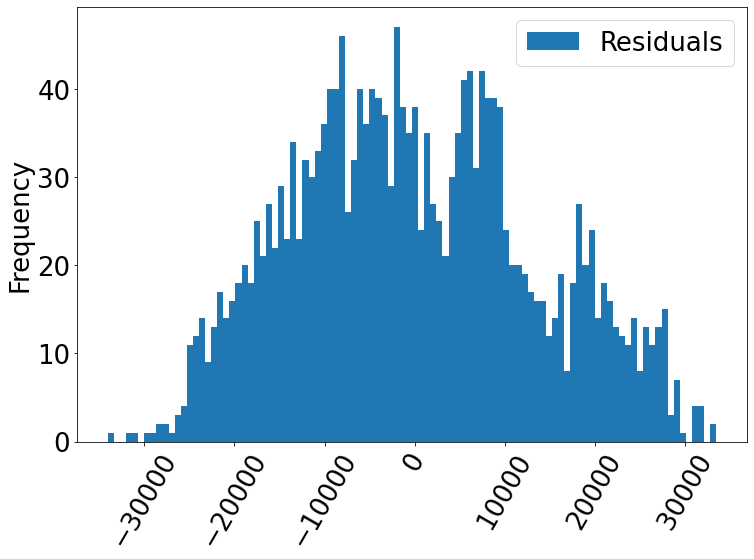

In [23]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Frequency'>

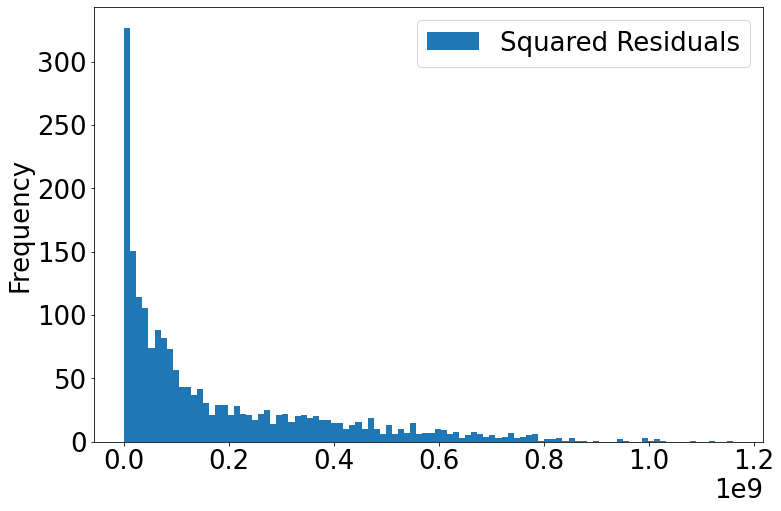

In [24]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

<ipython-input-25-dbde2fe7e653>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))
/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1167: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1167: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1167: UserWarning: Attempting to set identical

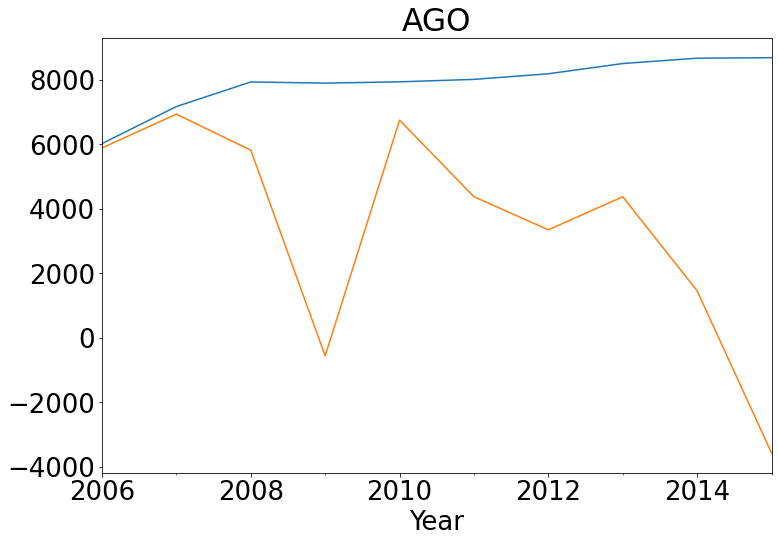

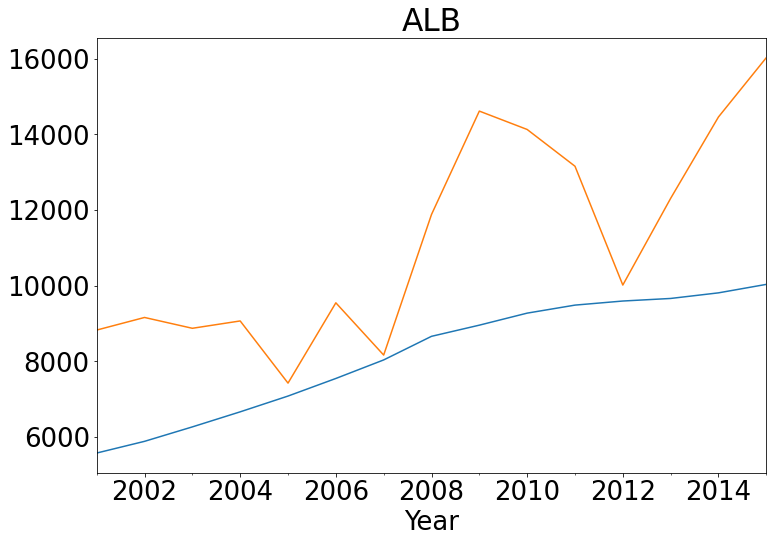

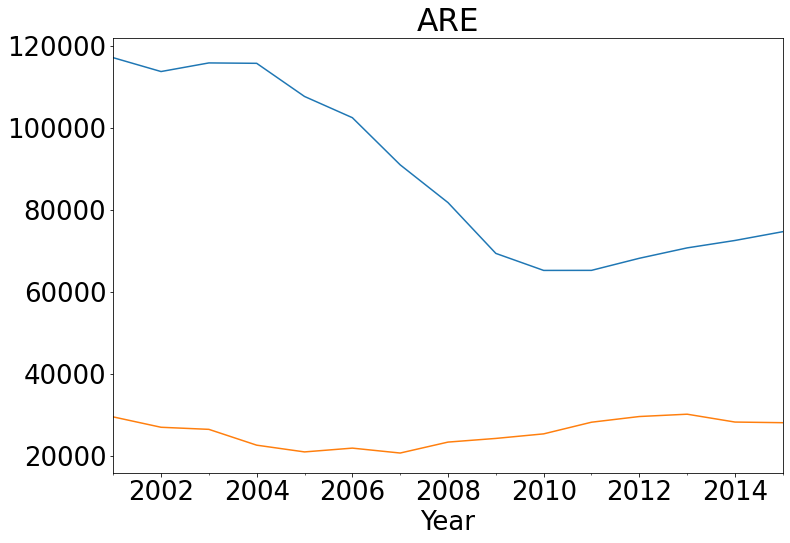

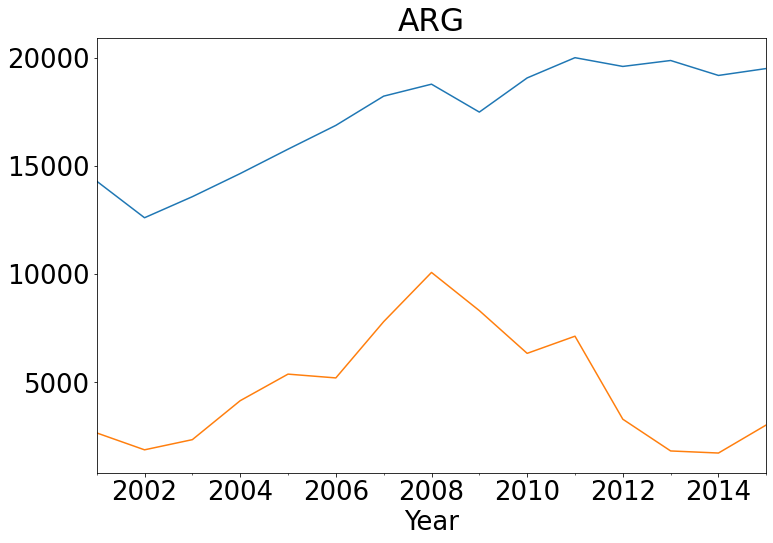

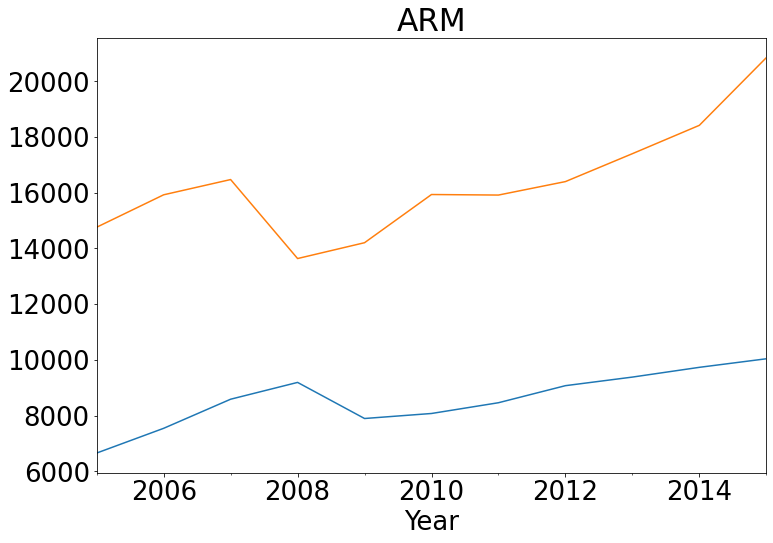

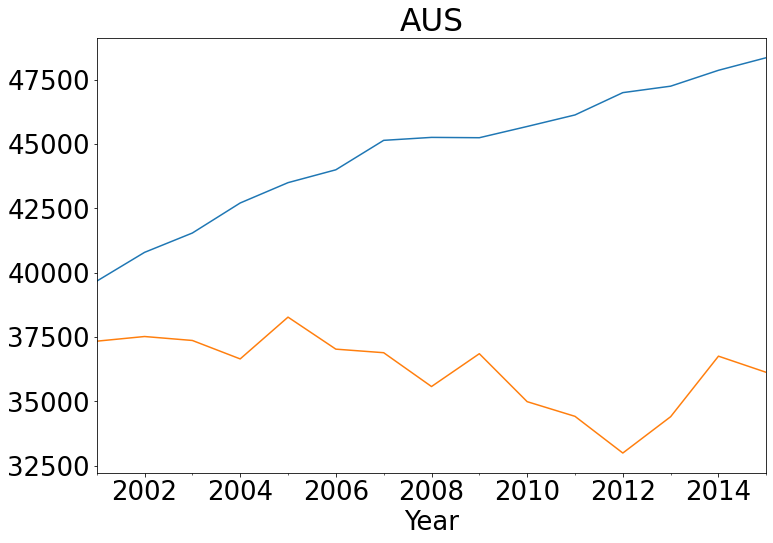

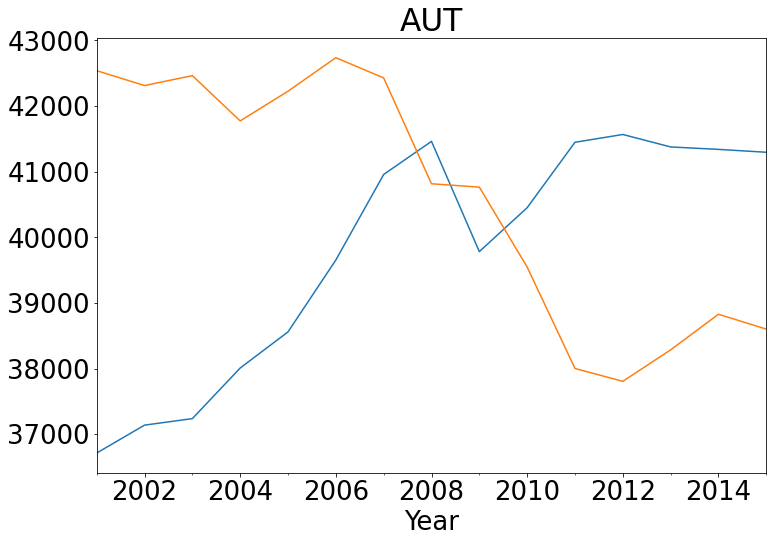

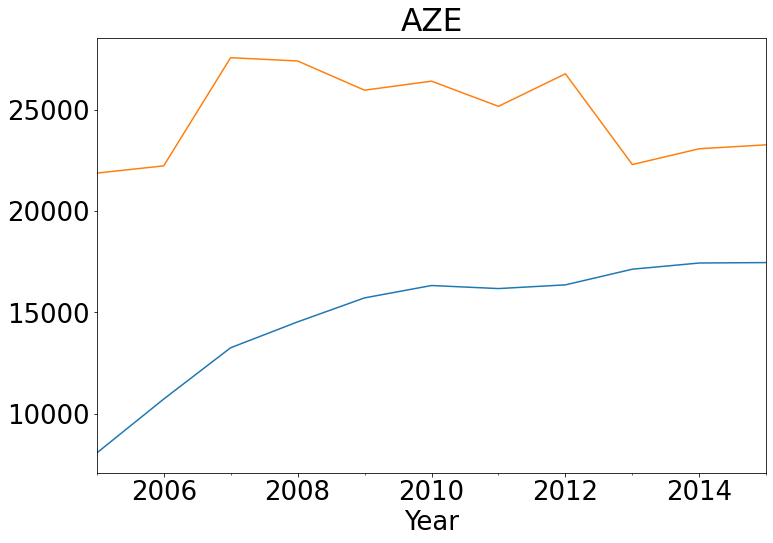

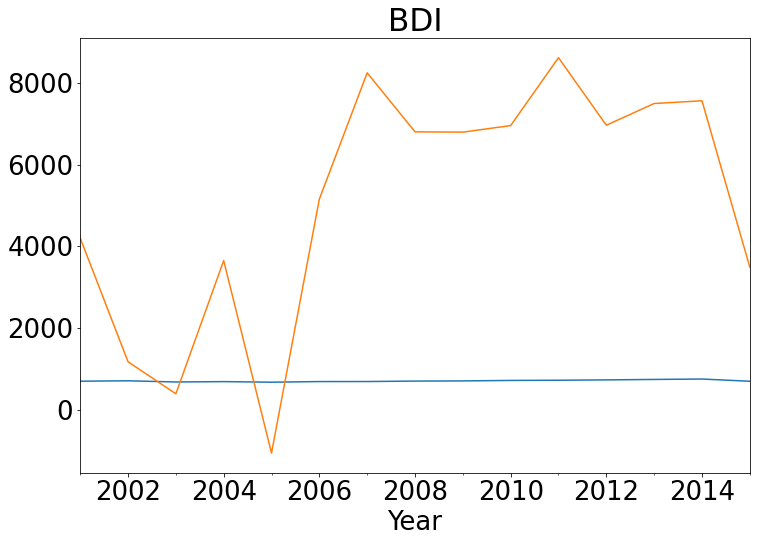

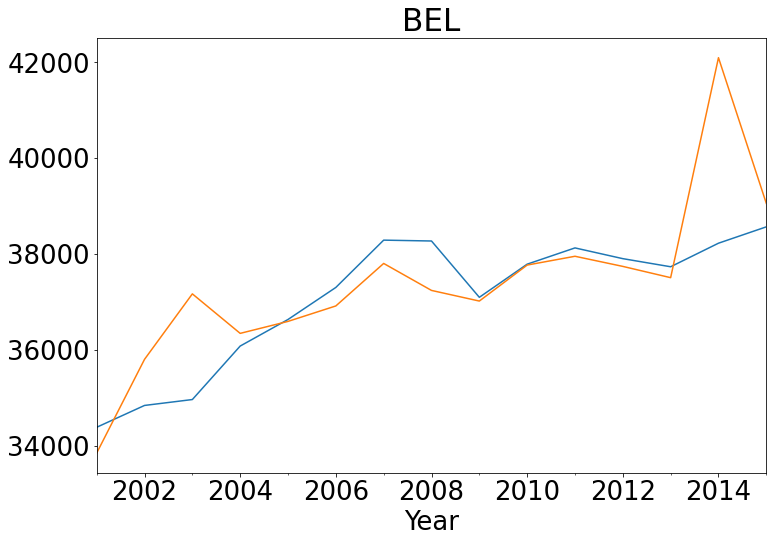

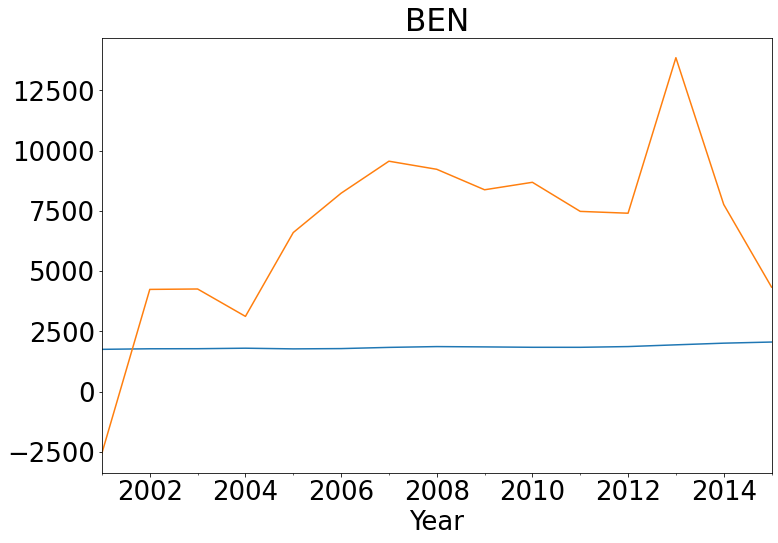

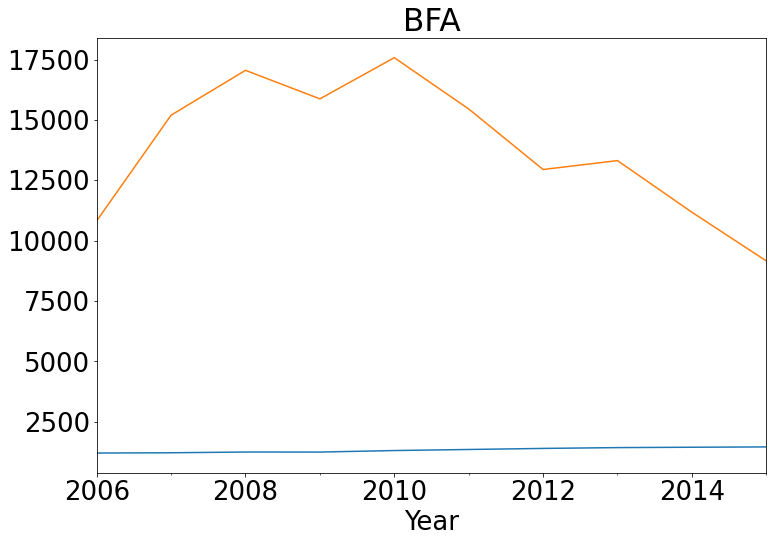

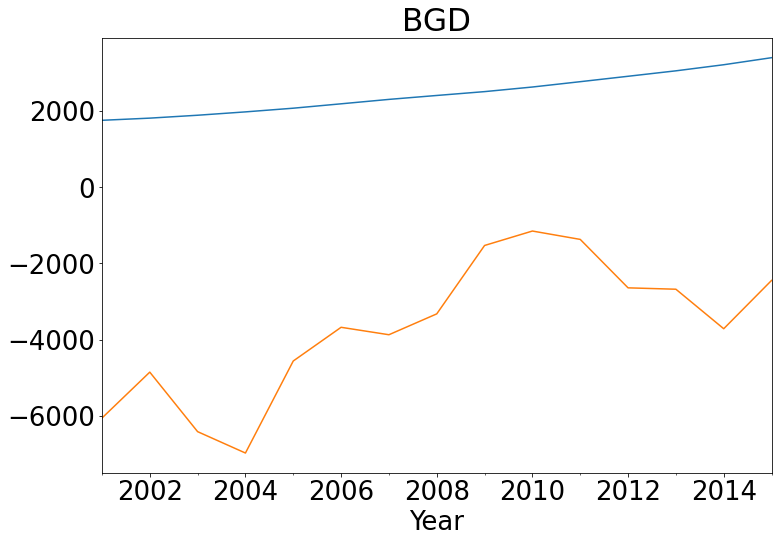

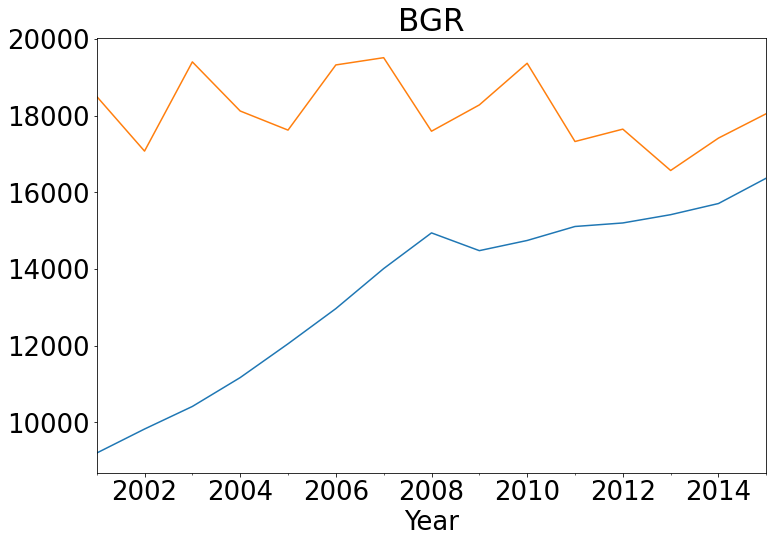

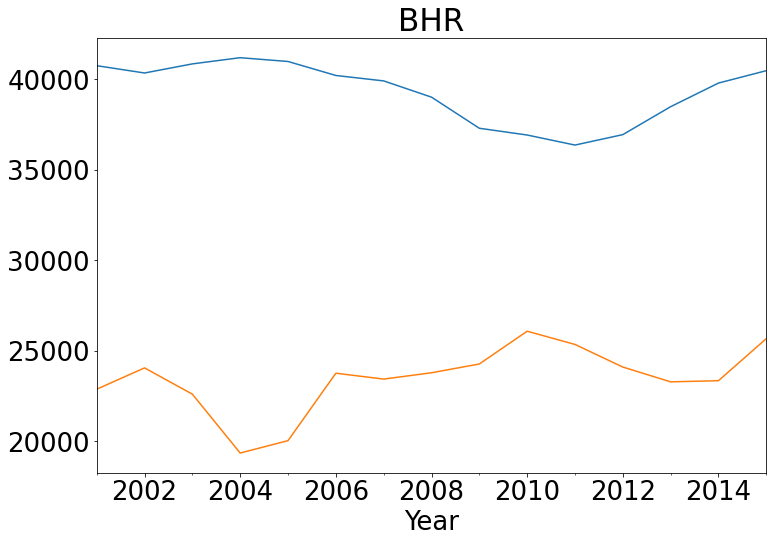

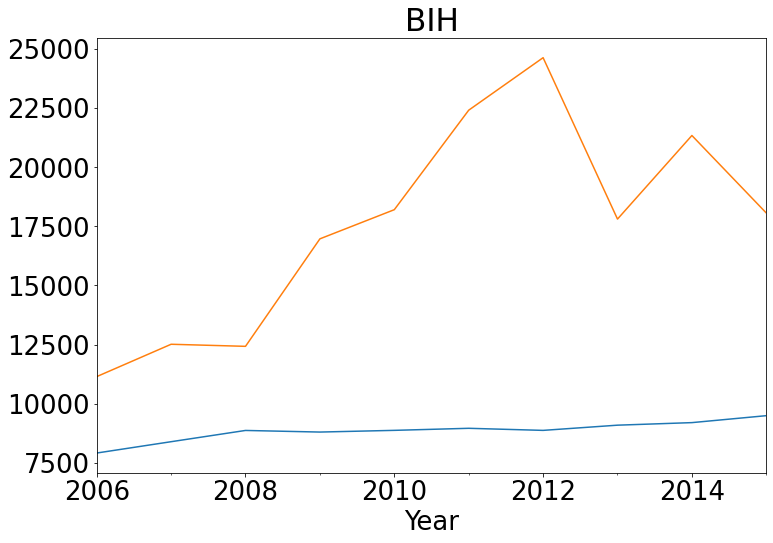

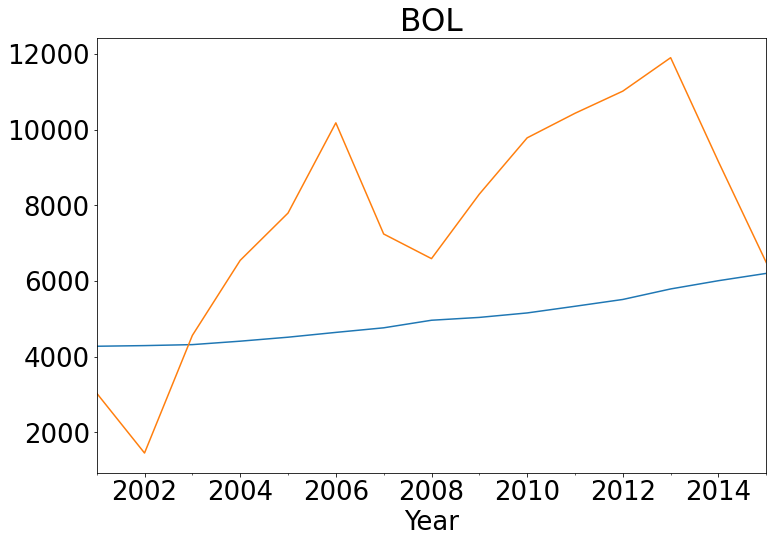

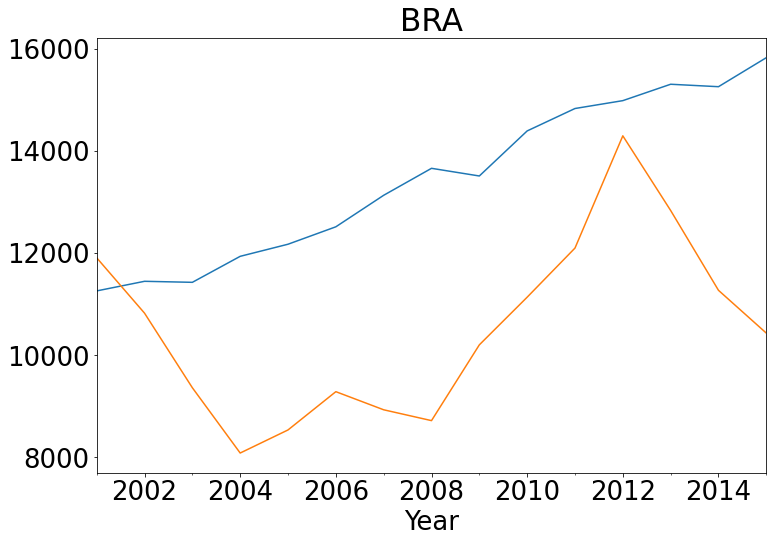

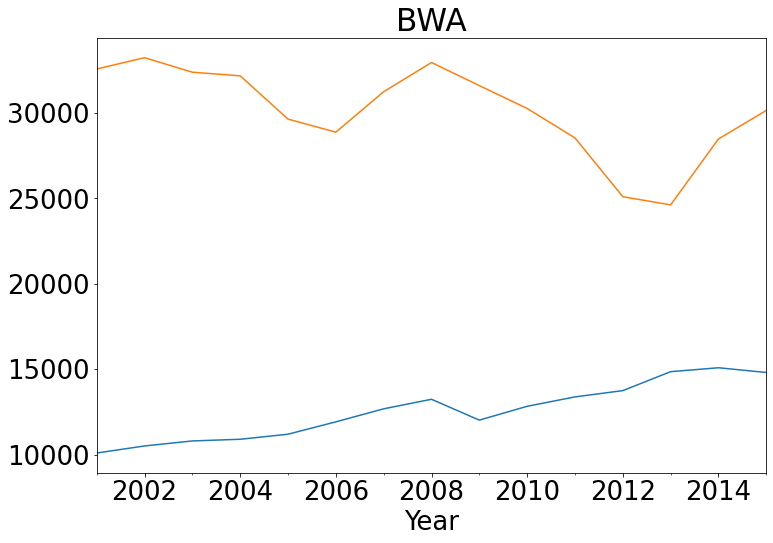

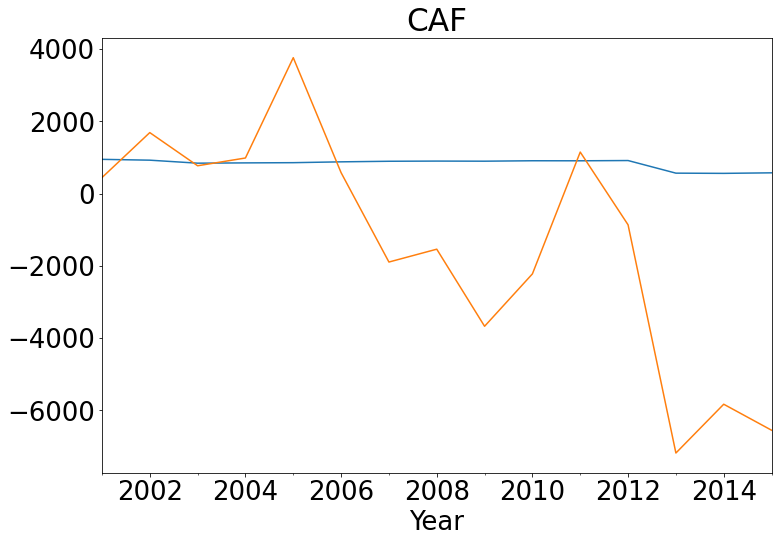

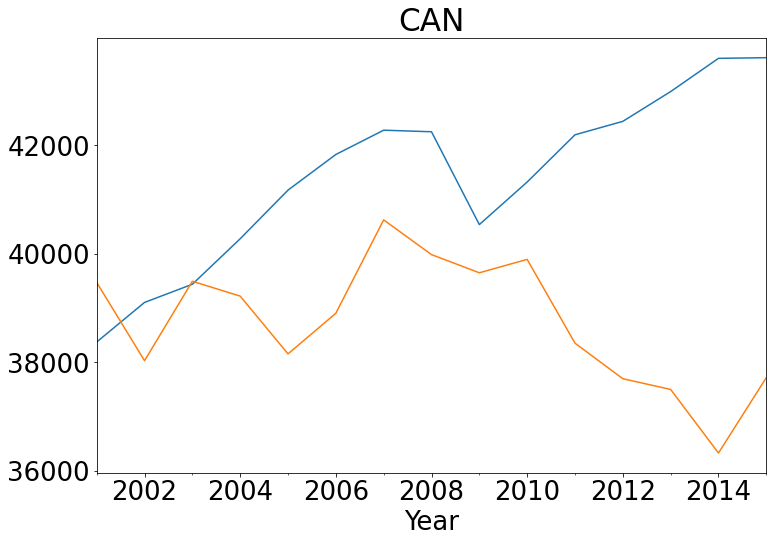

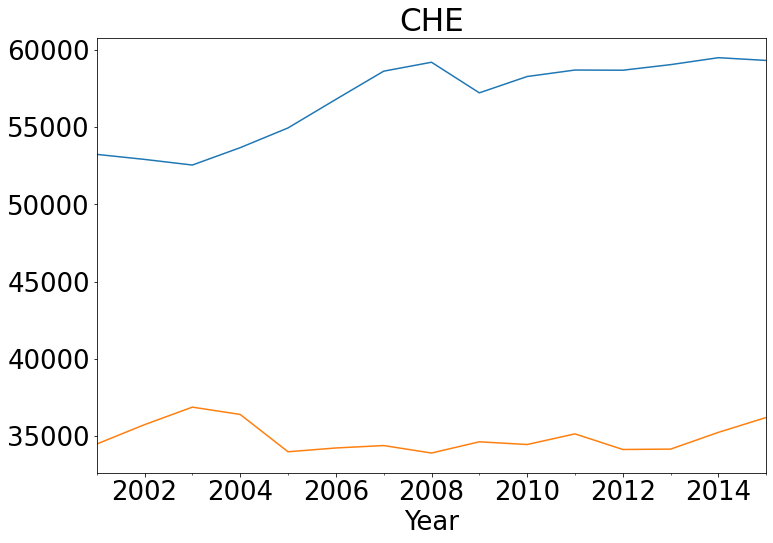

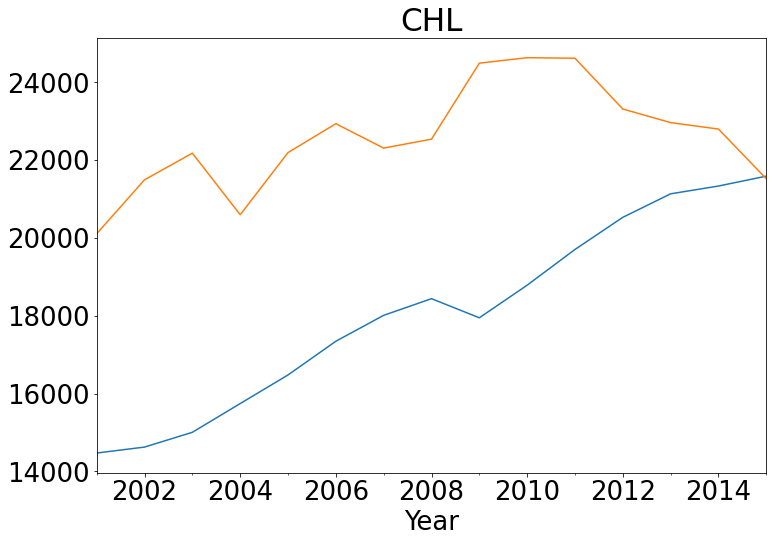

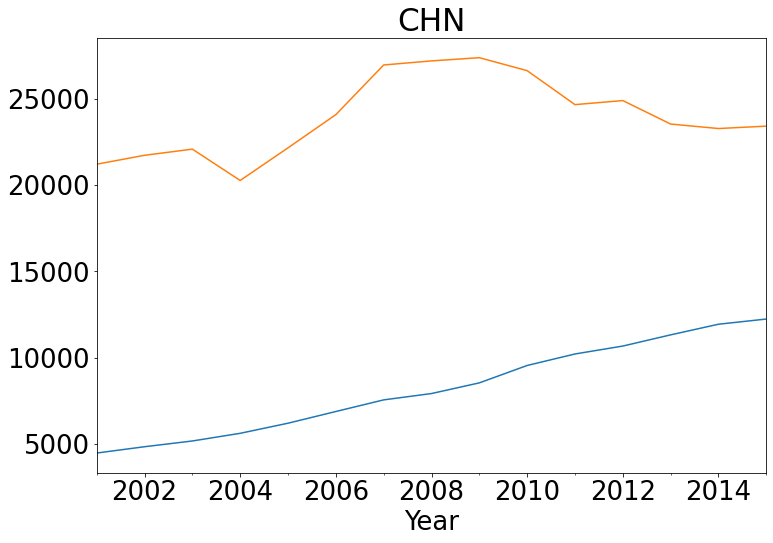

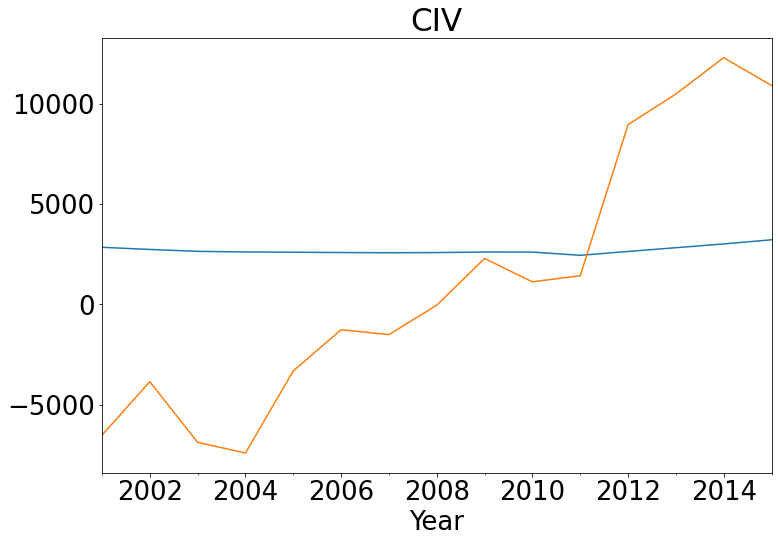

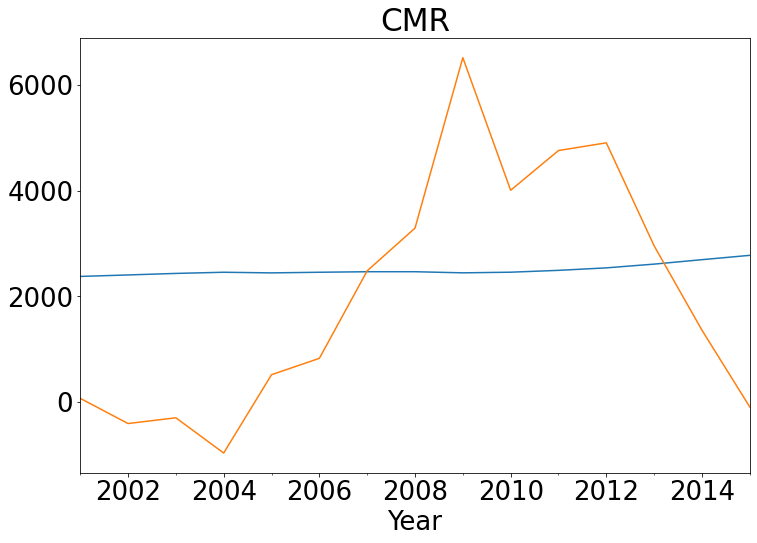

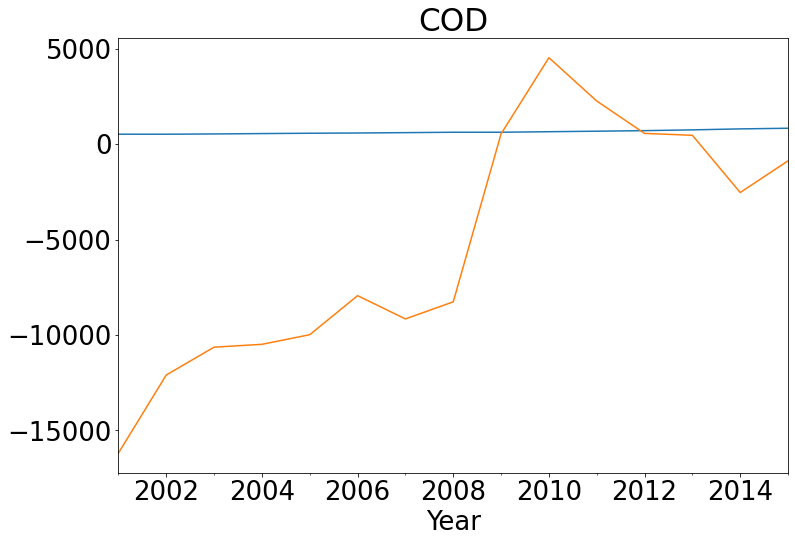

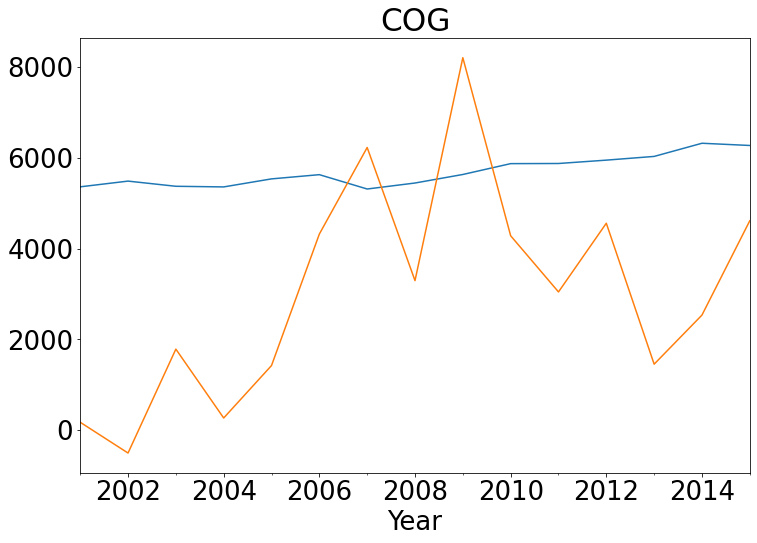

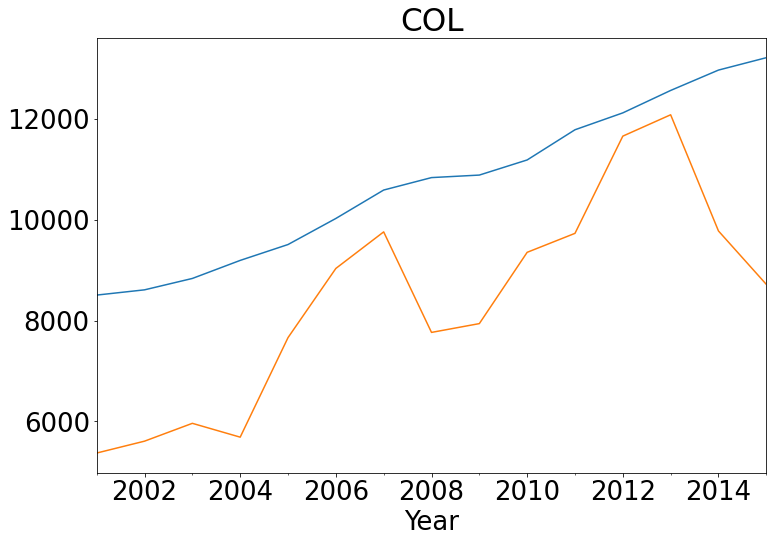

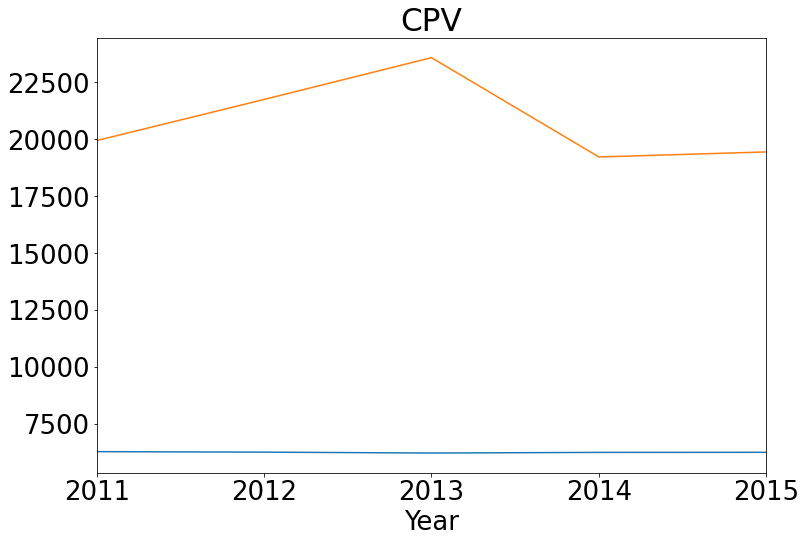

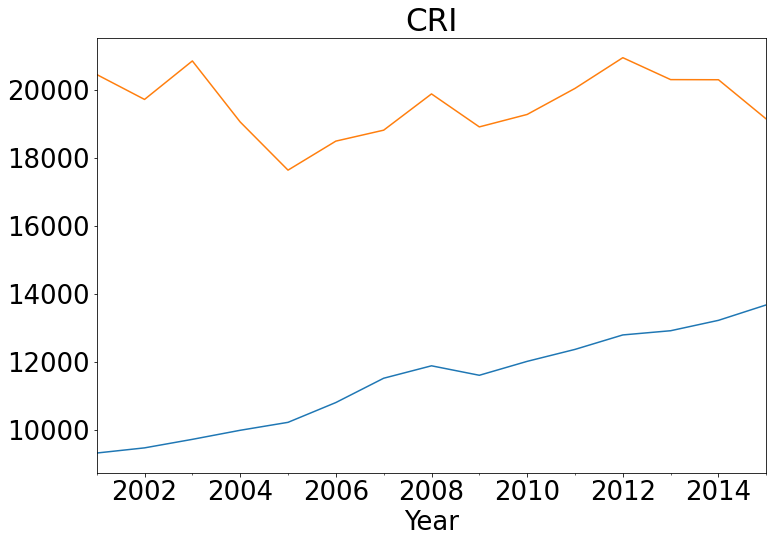

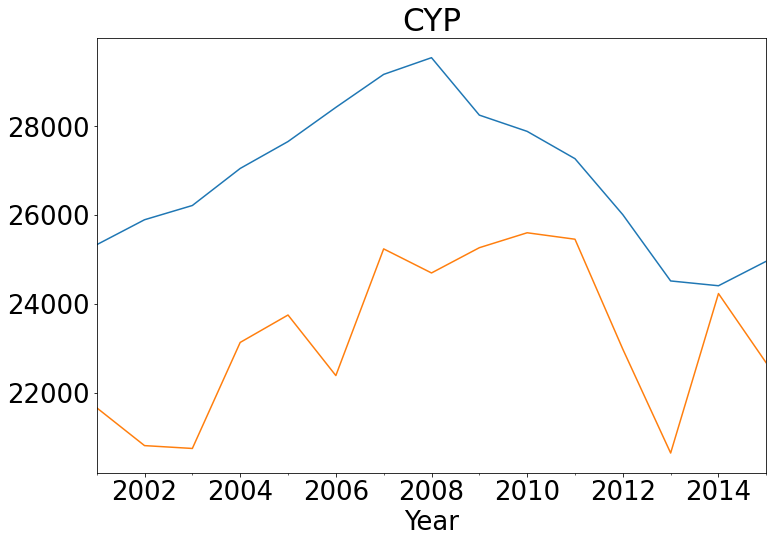

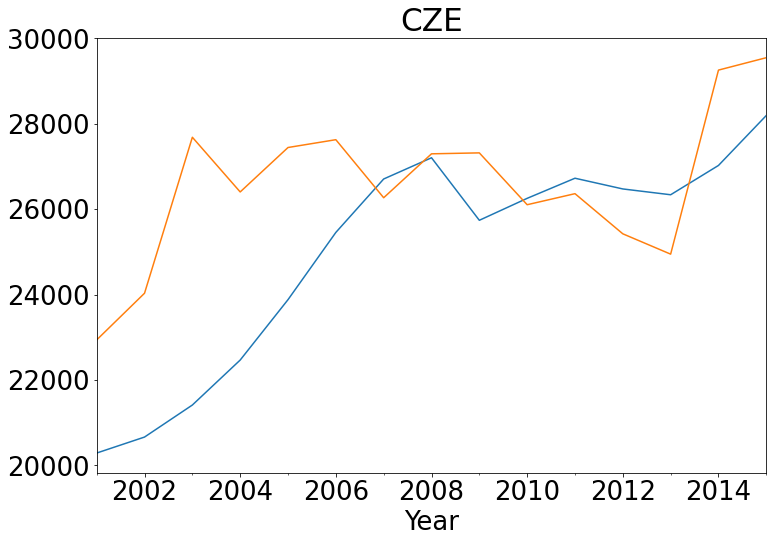

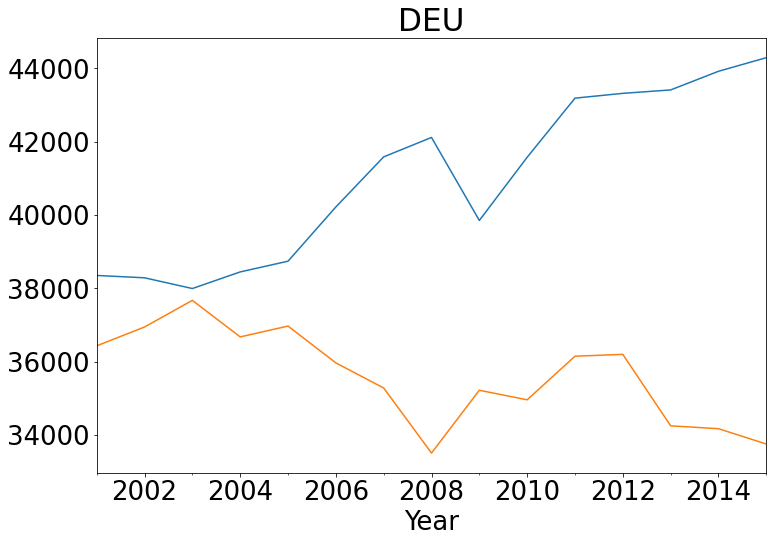

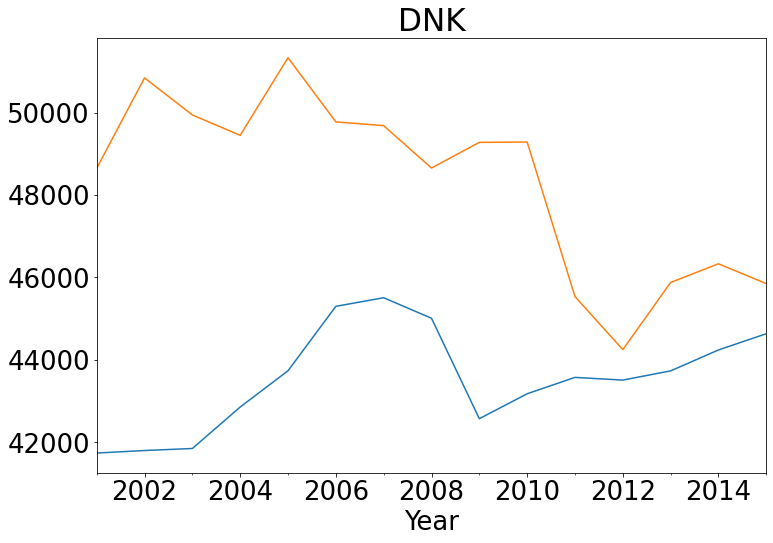

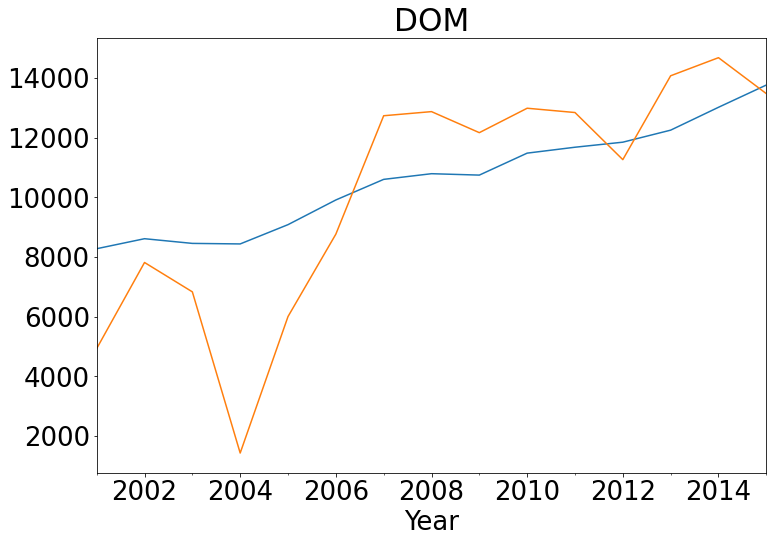

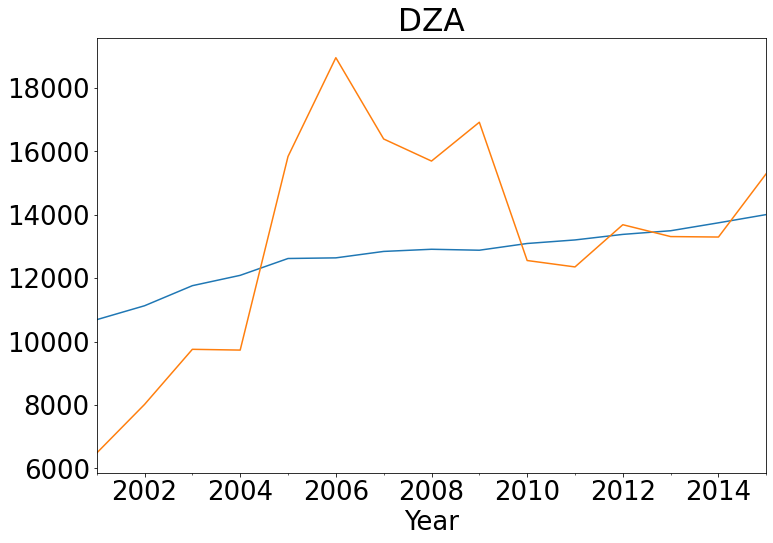

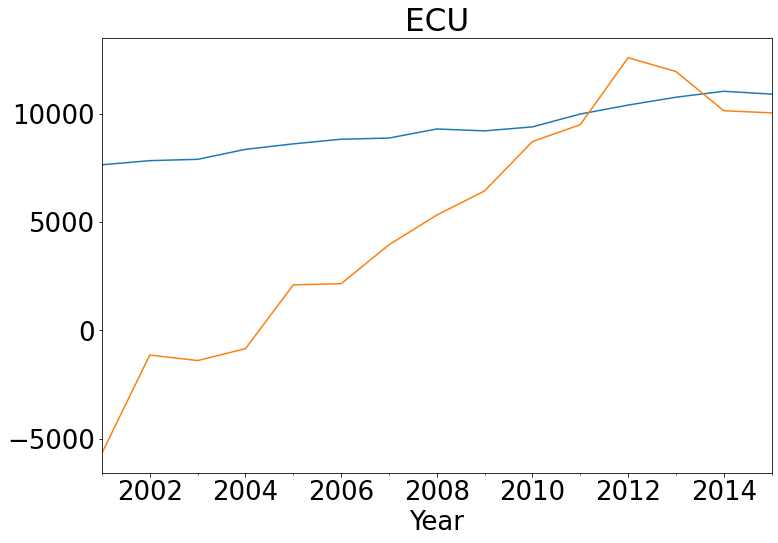

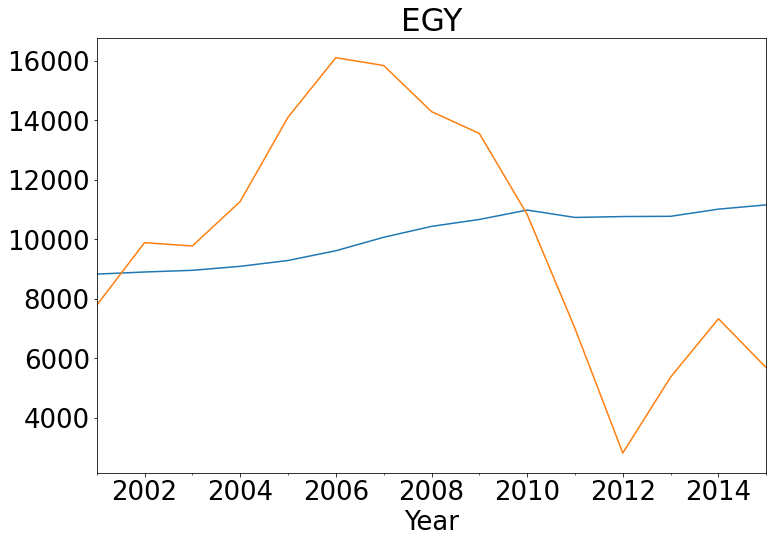

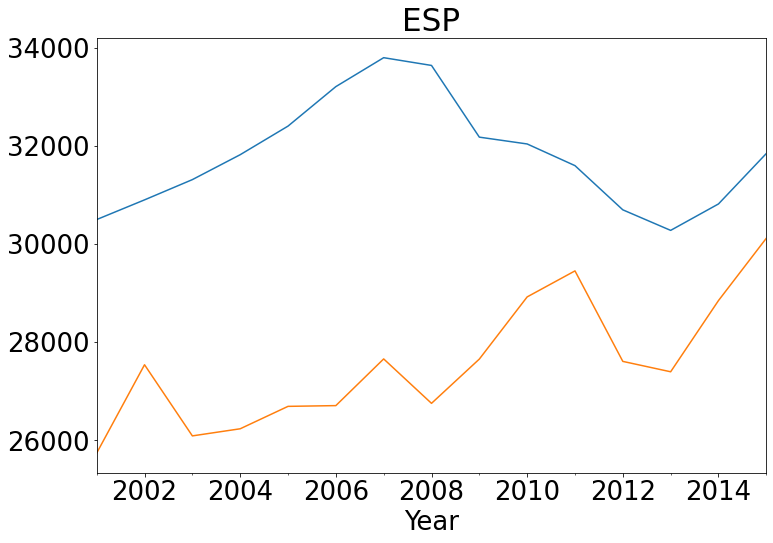

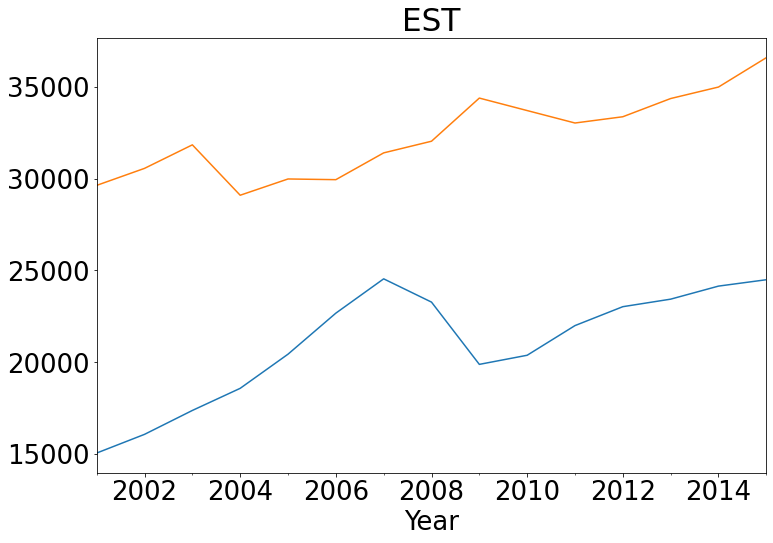

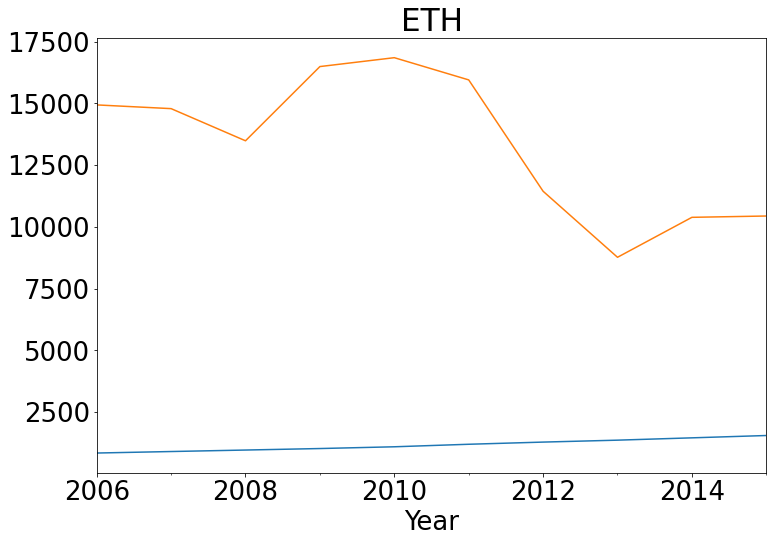

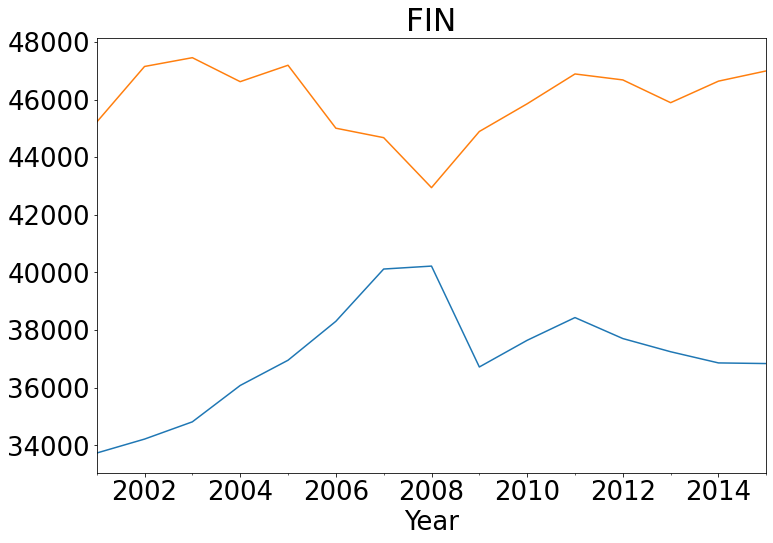

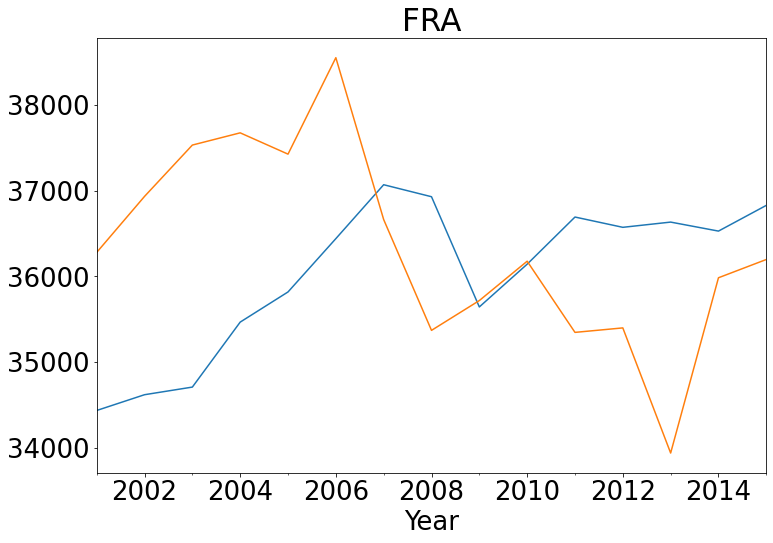

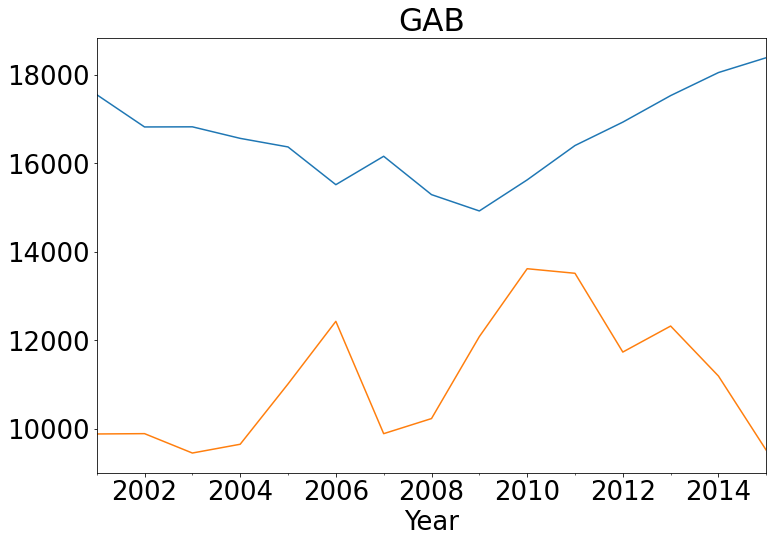

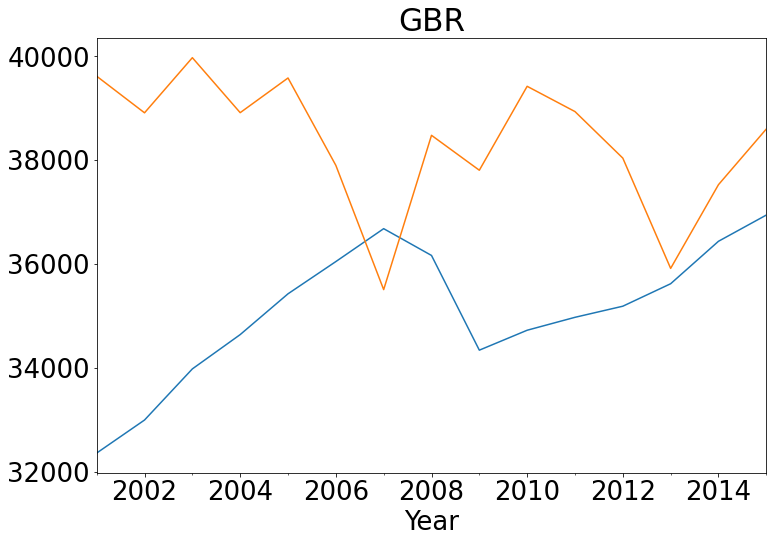

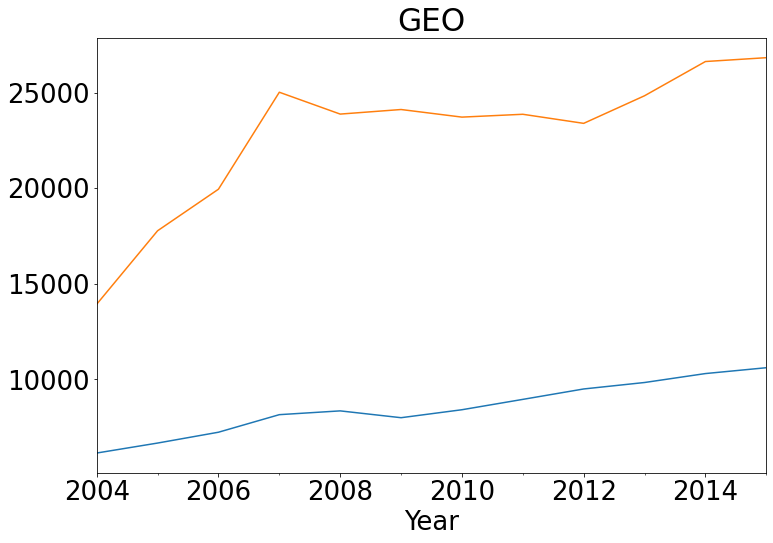

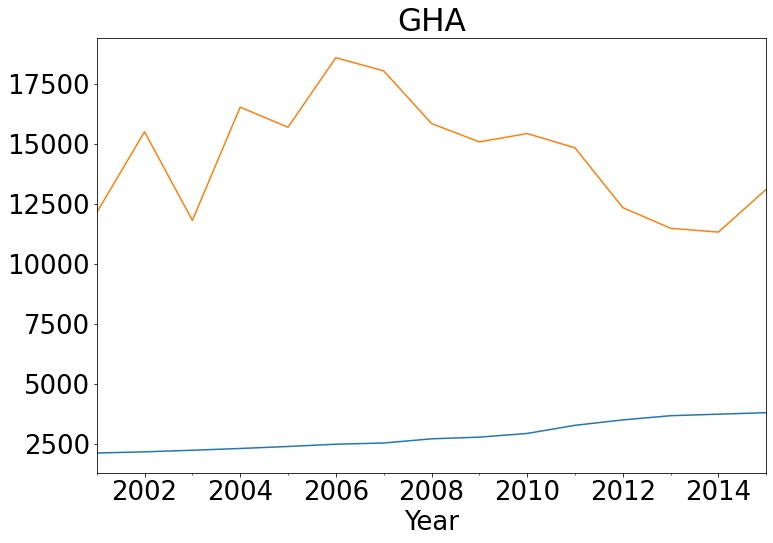

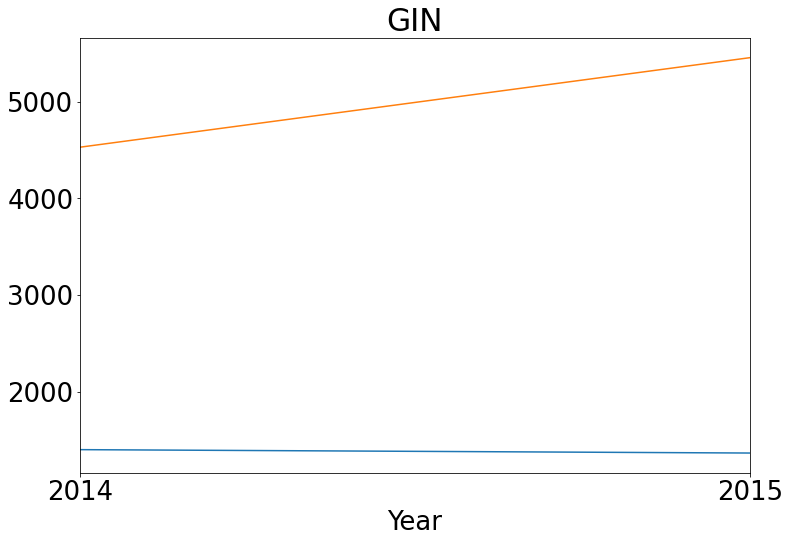

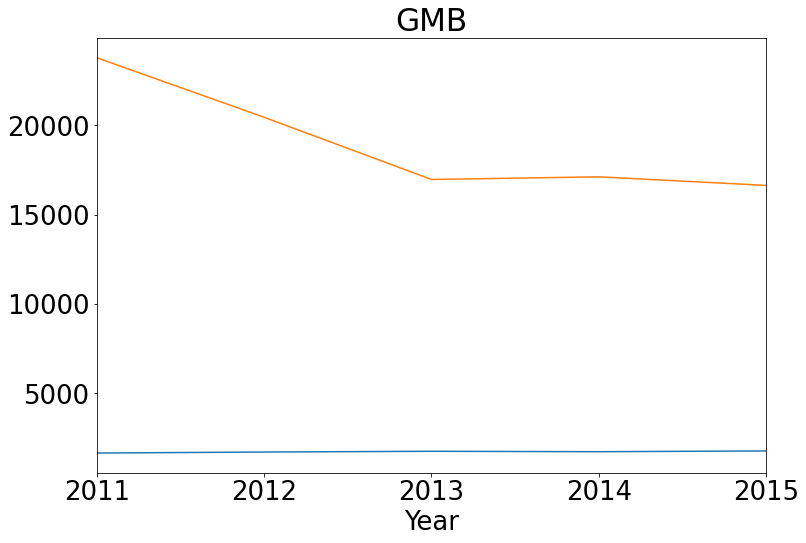

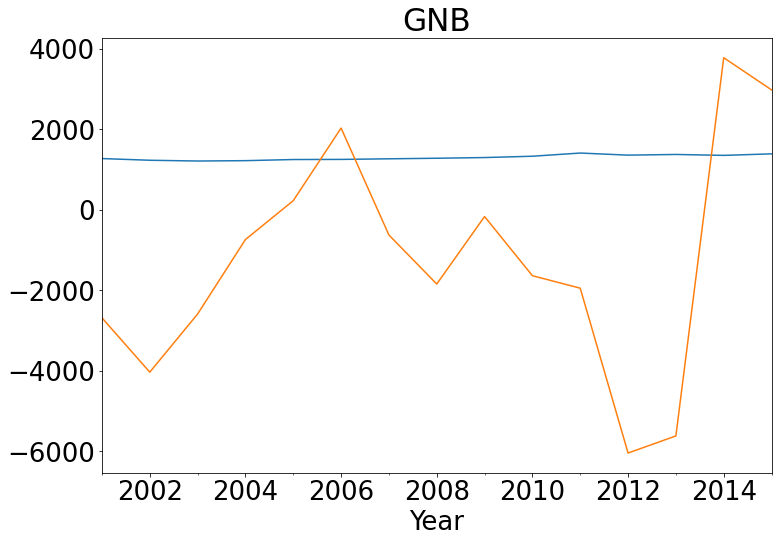

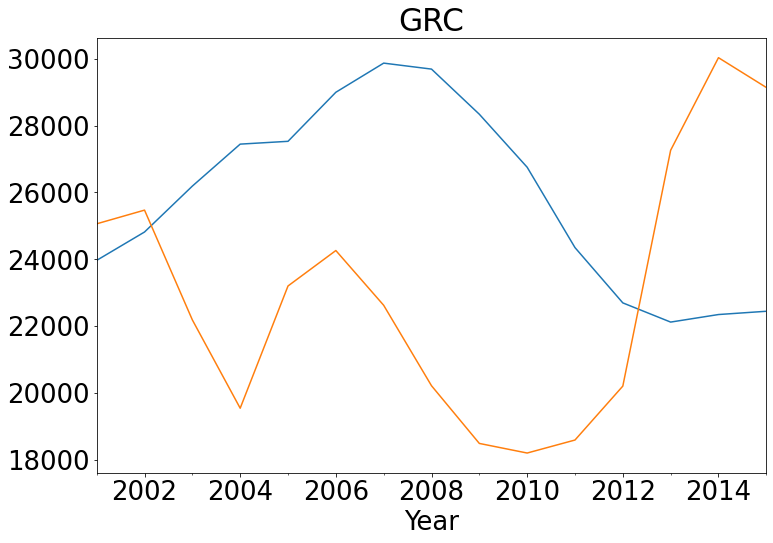

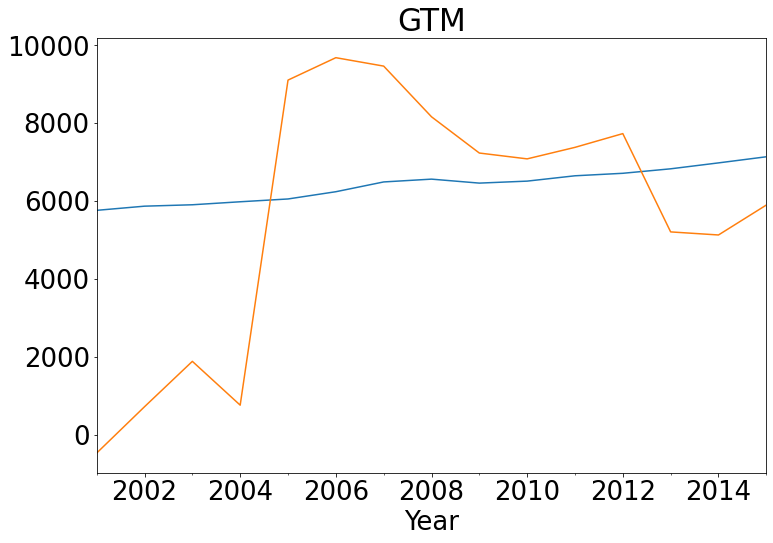

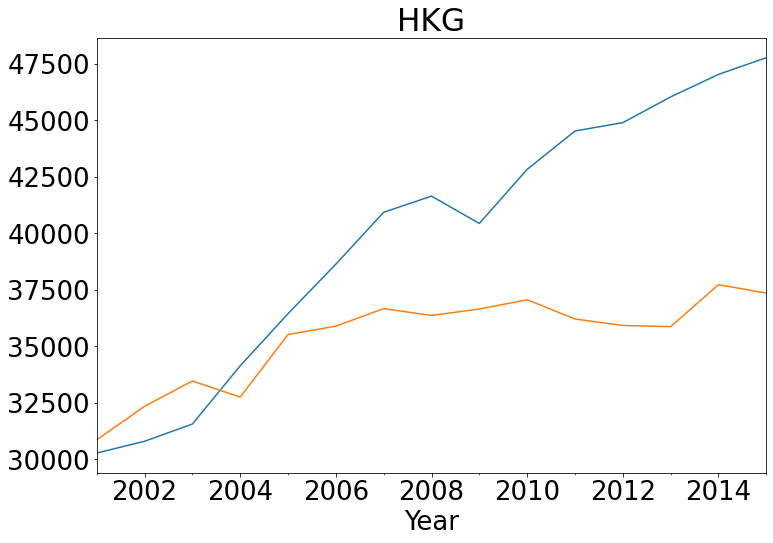

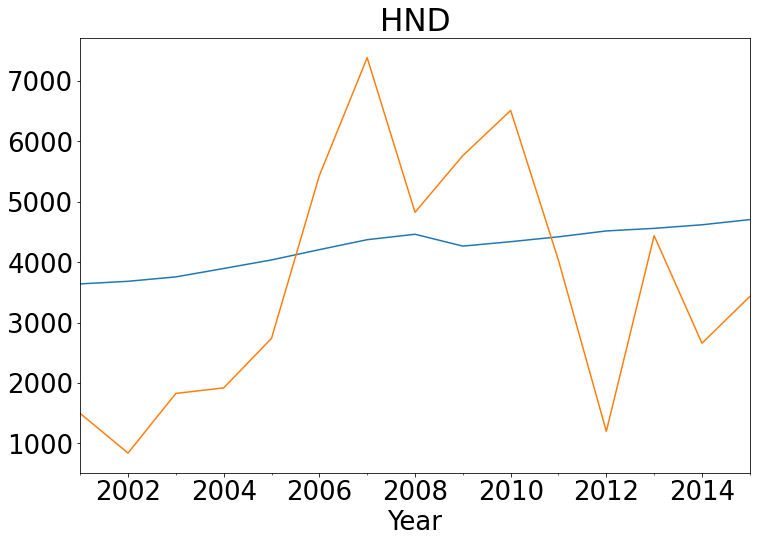

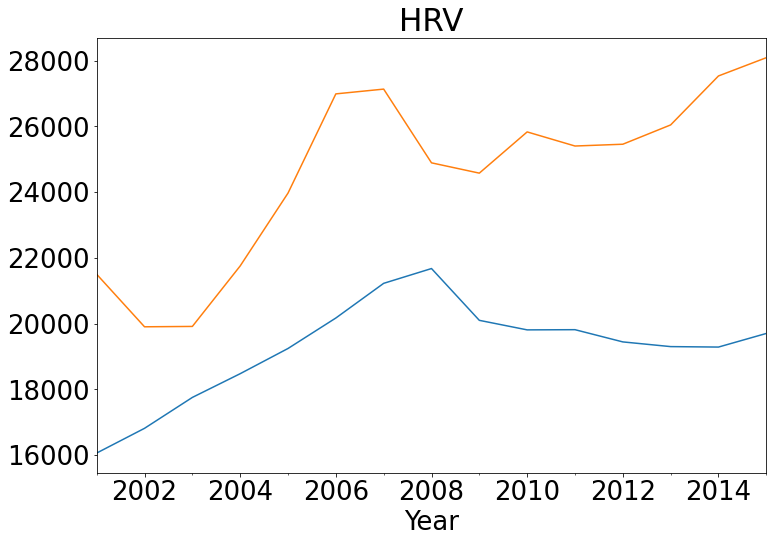

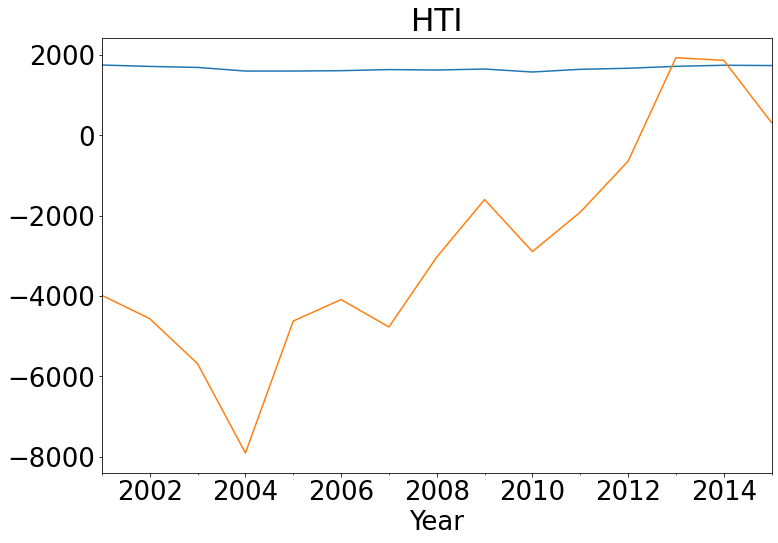

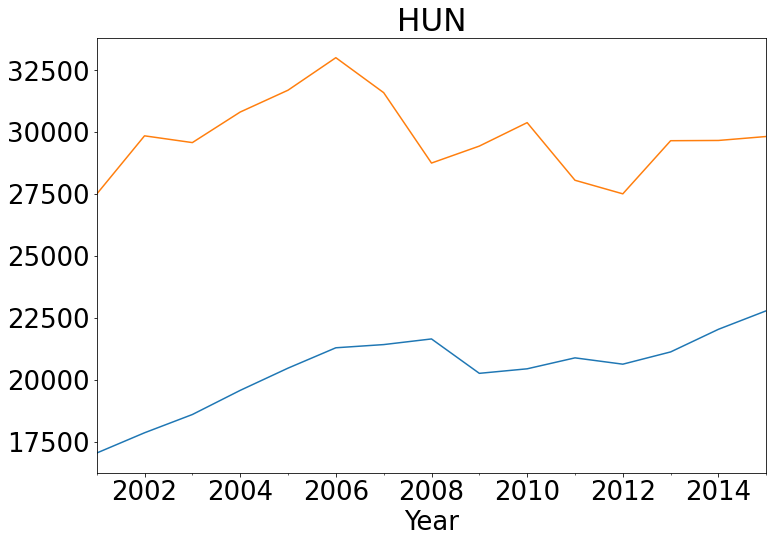

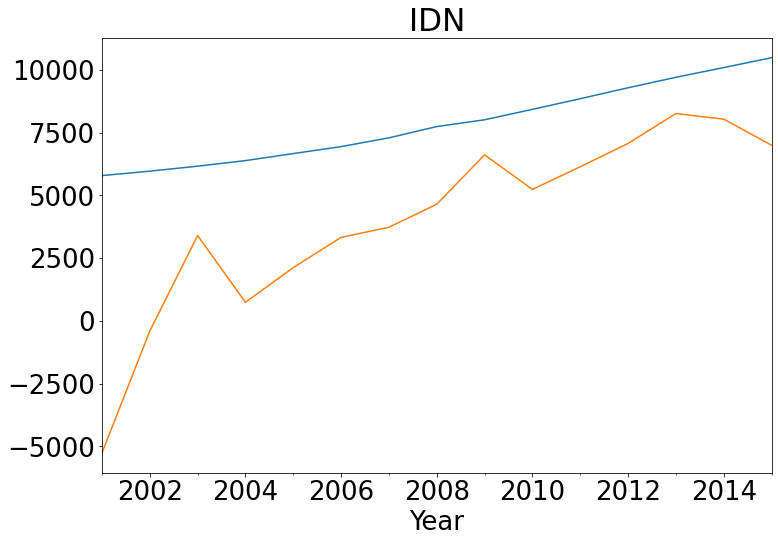

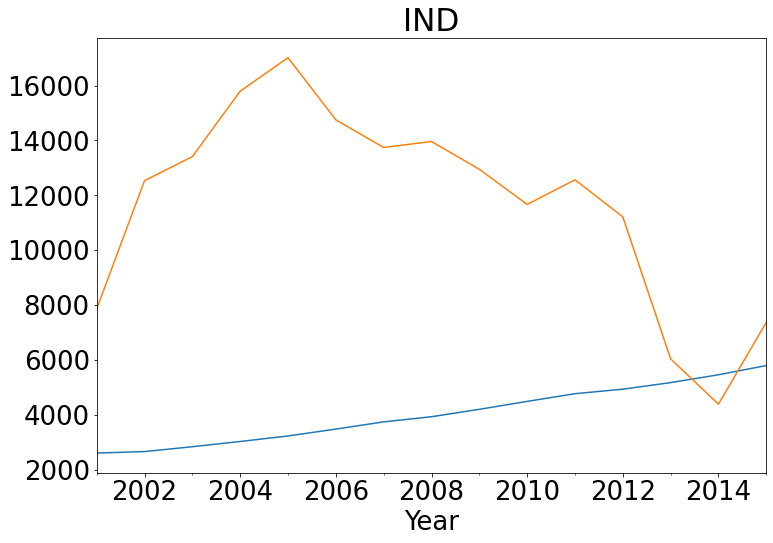

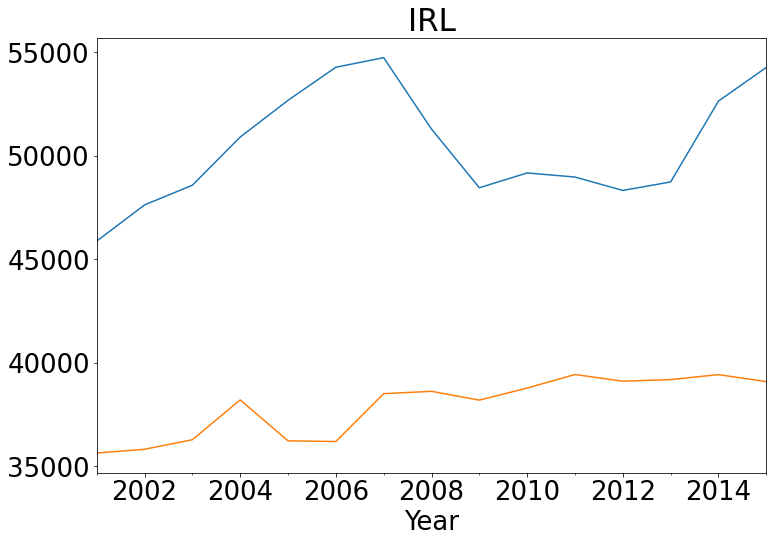

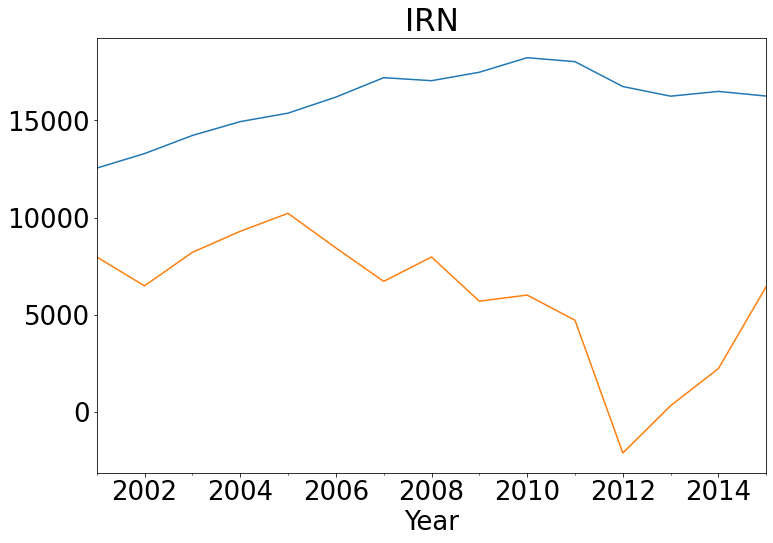

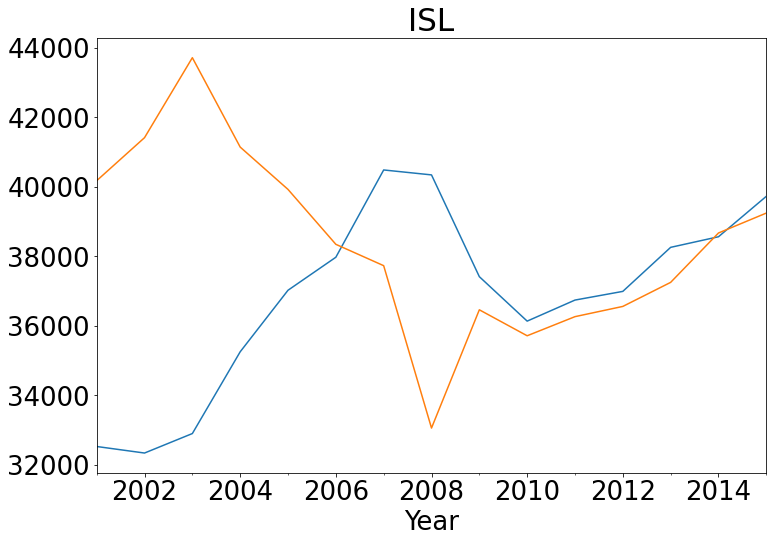

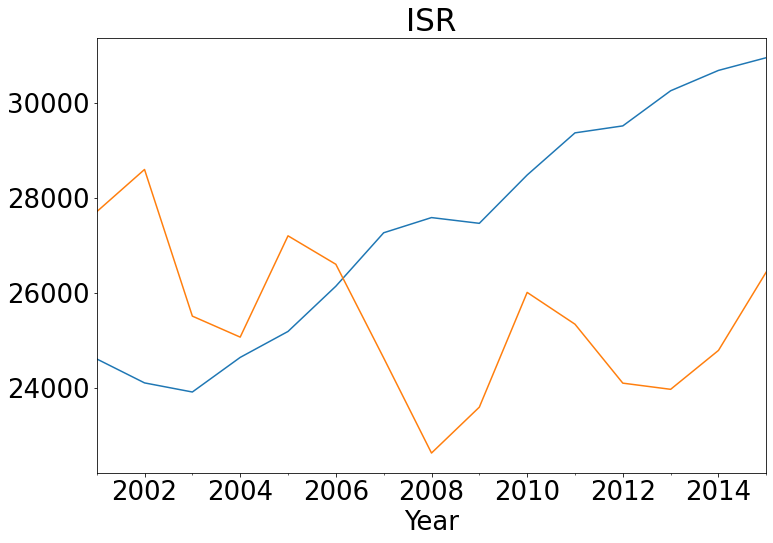

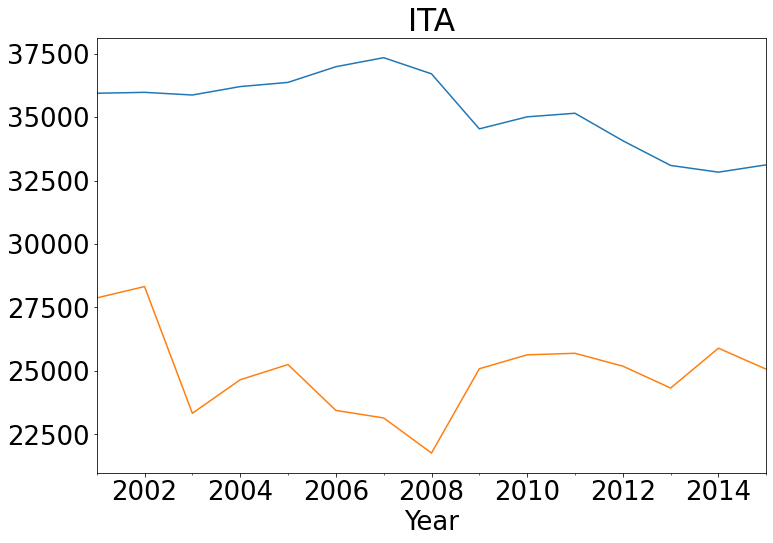

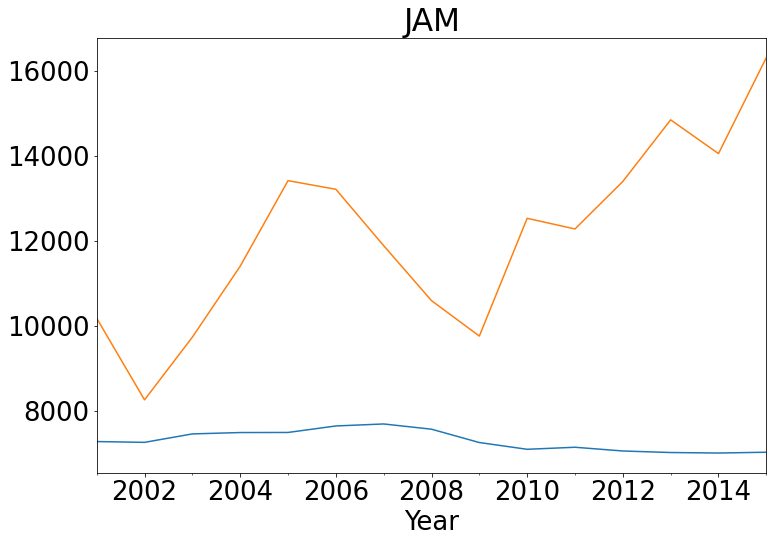

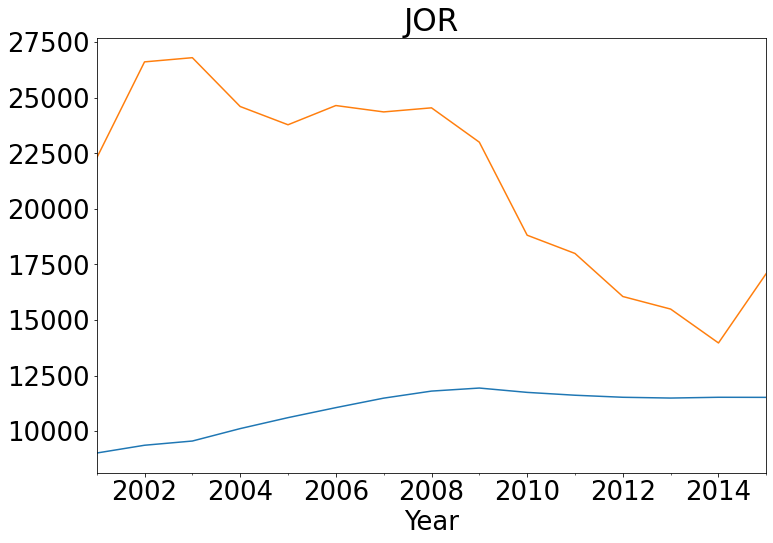

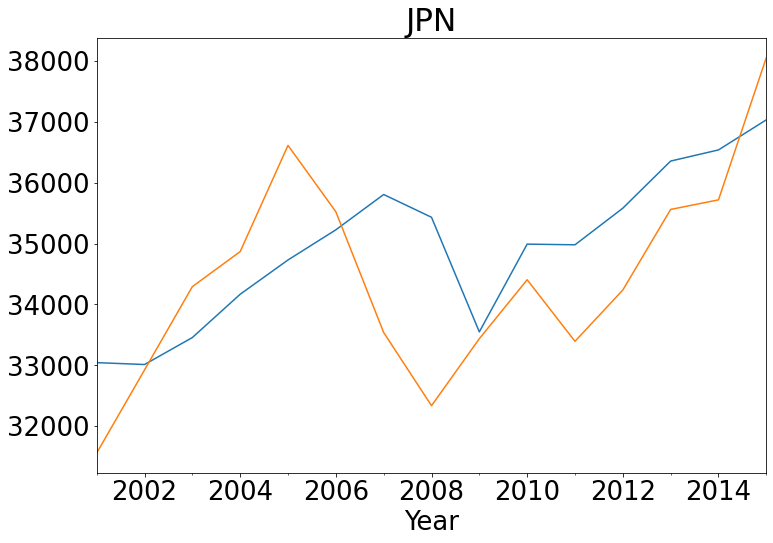

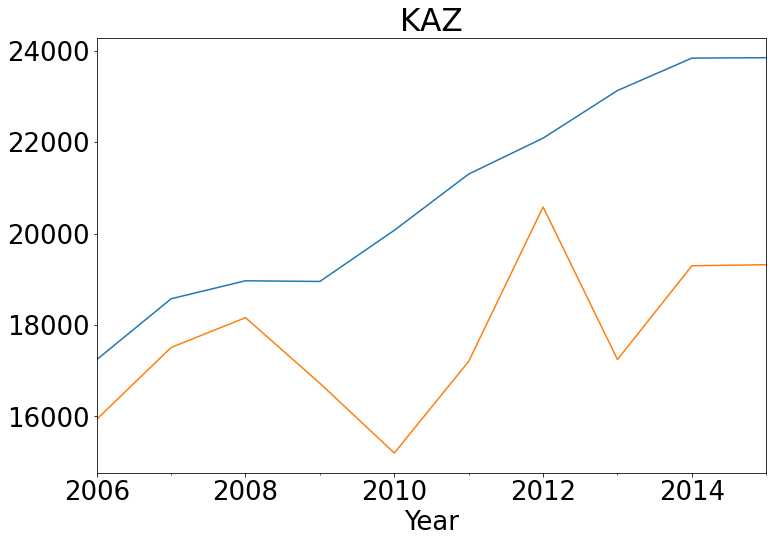

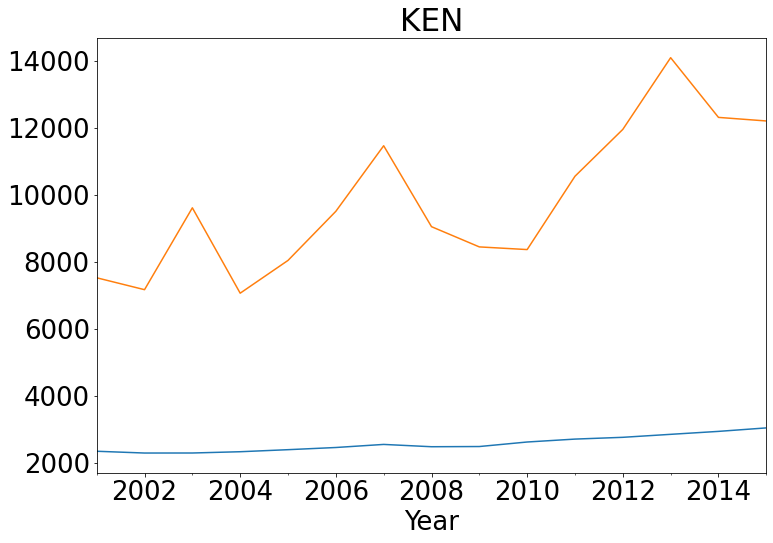

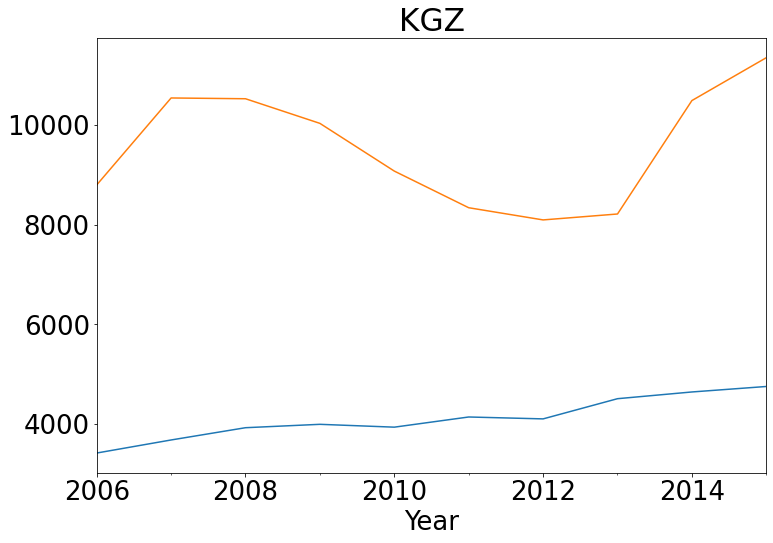

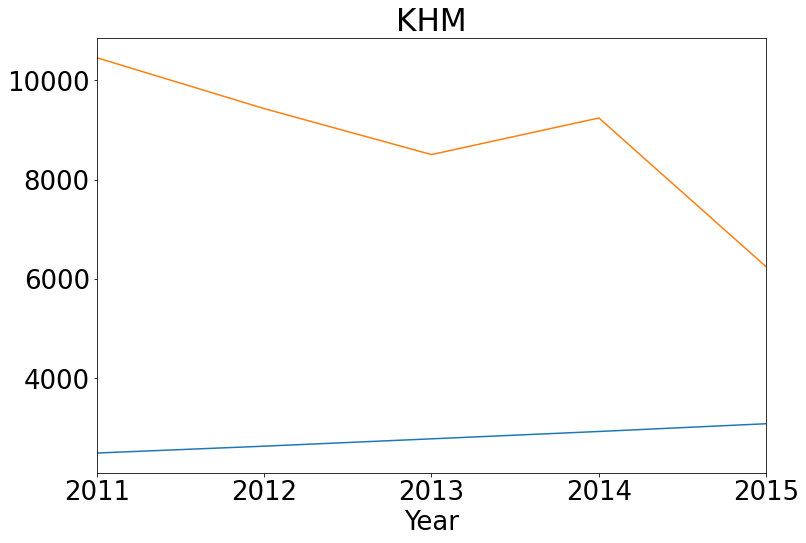

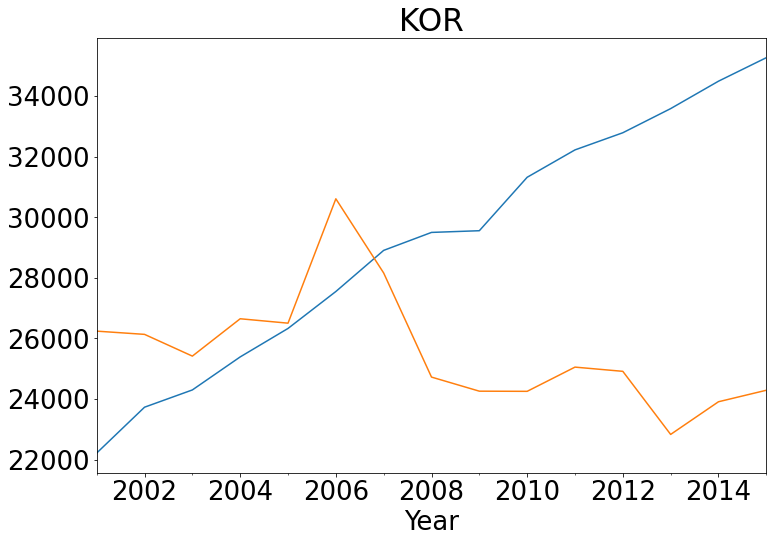

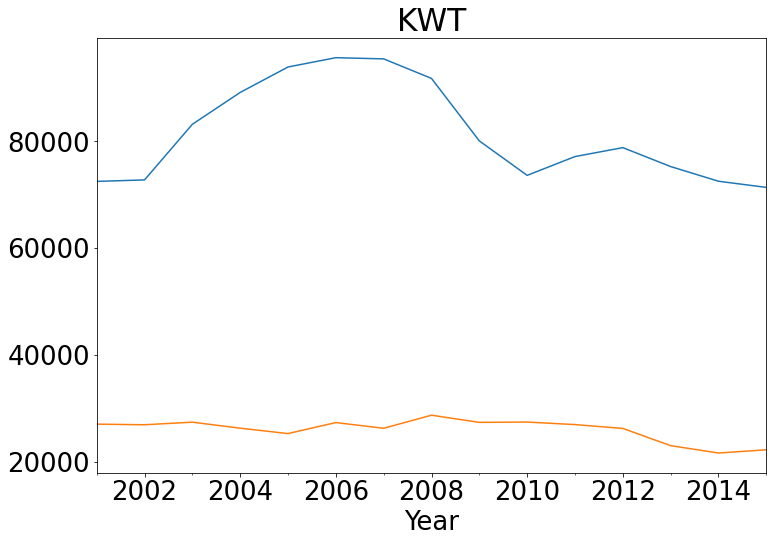

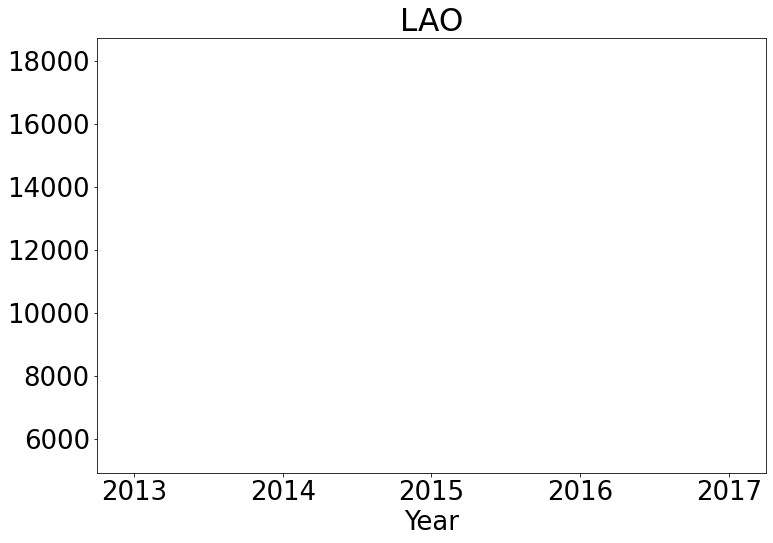

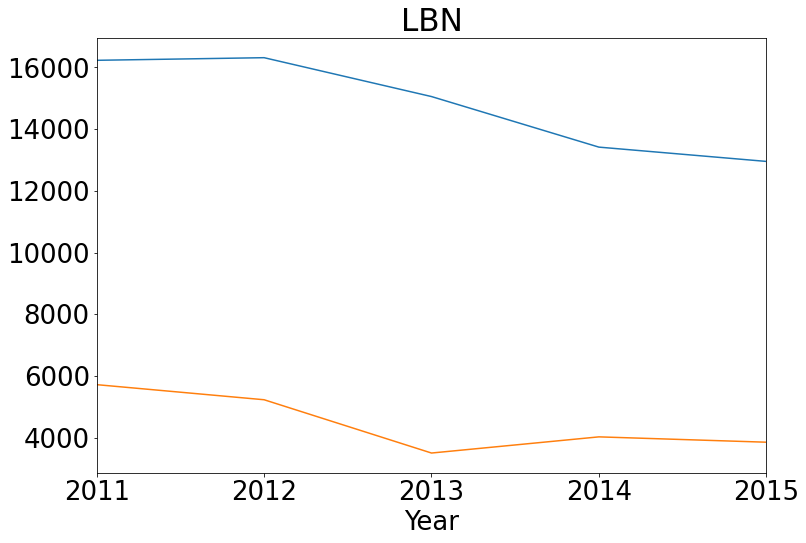

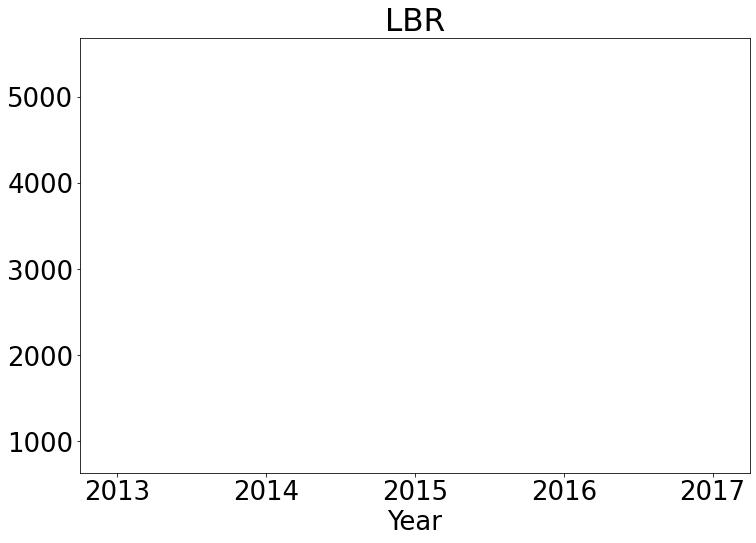

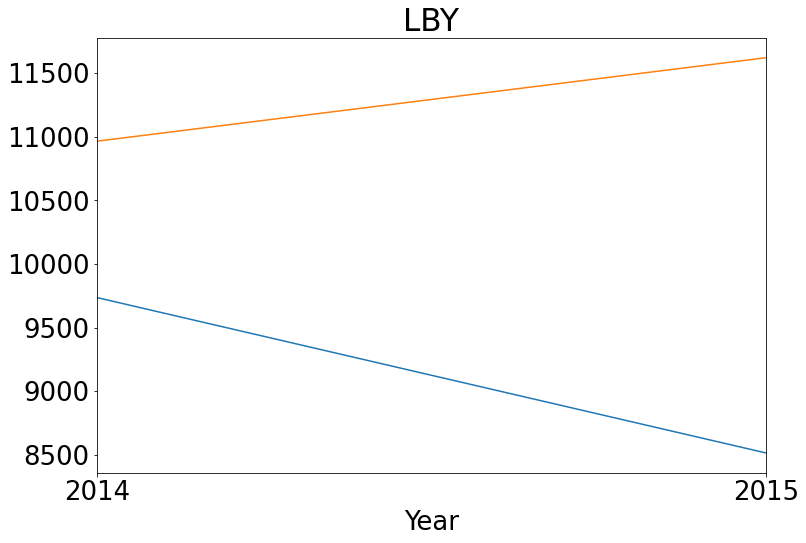

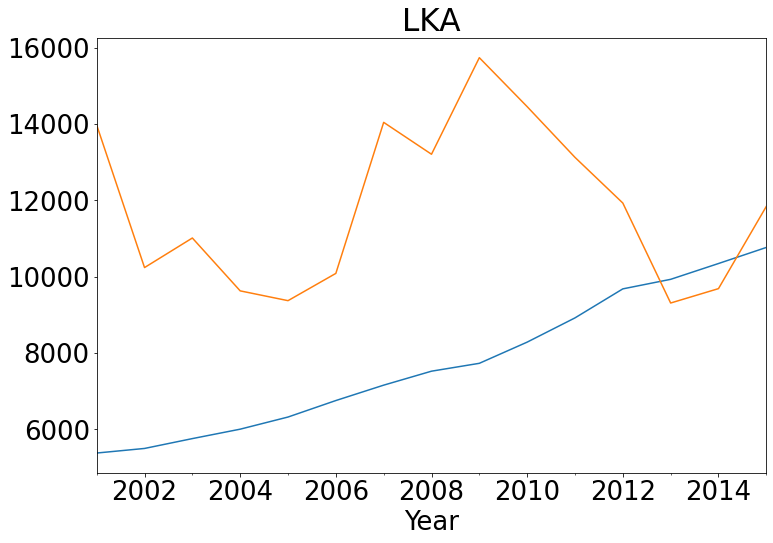

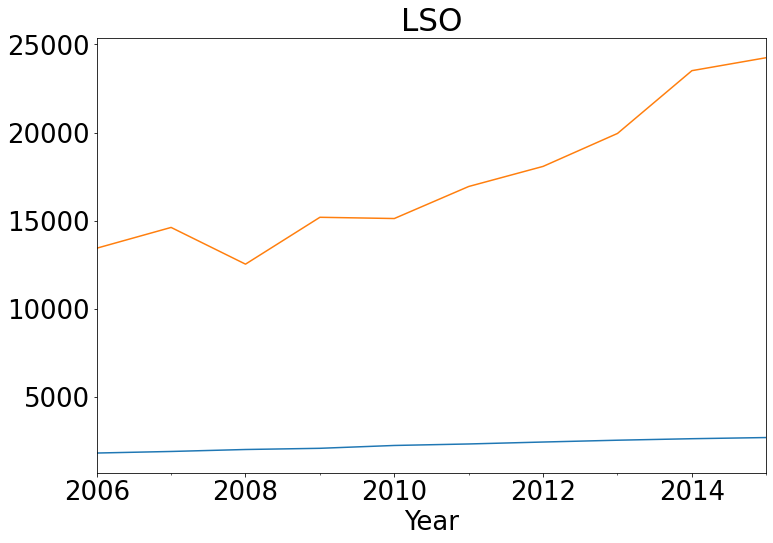

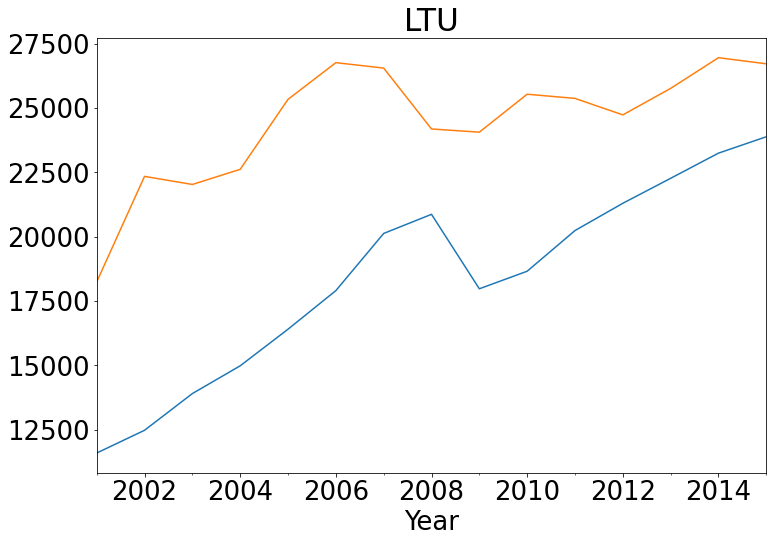

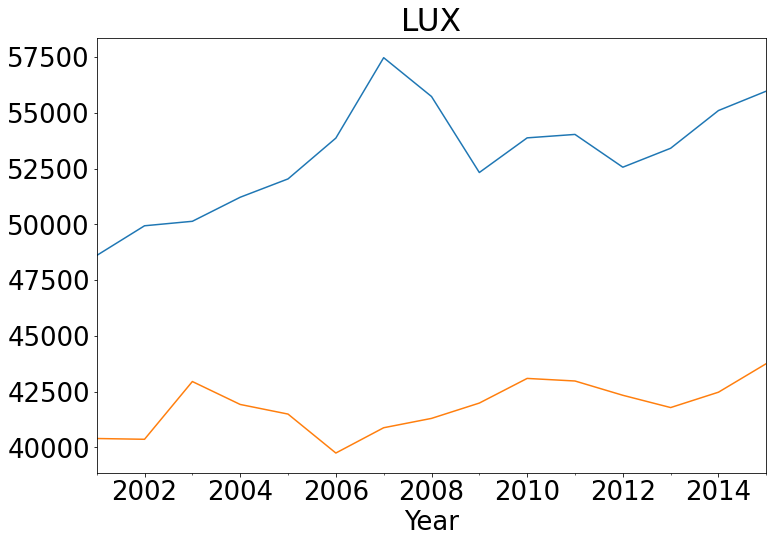

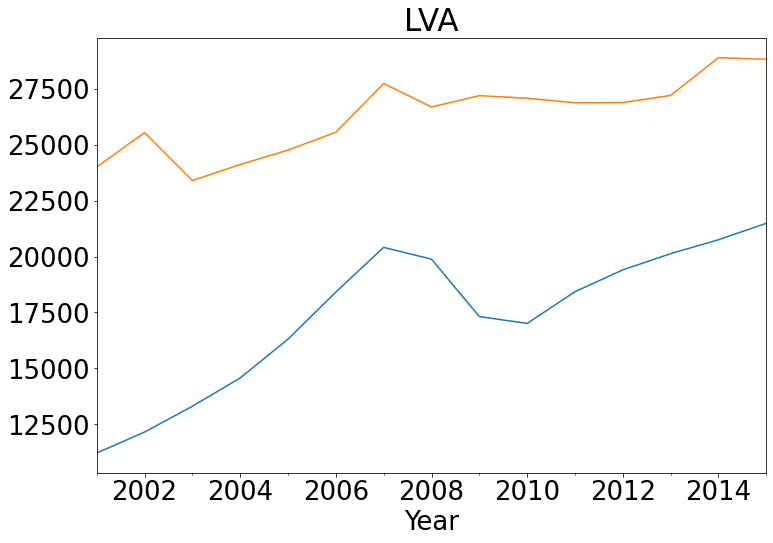

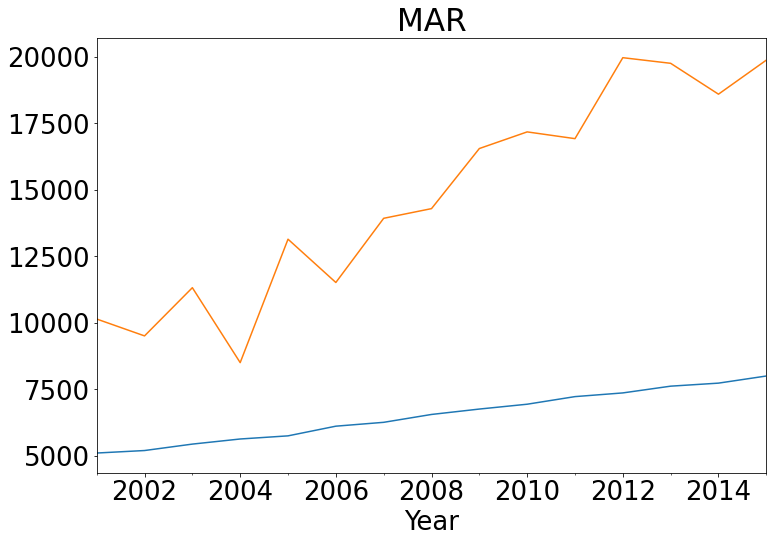

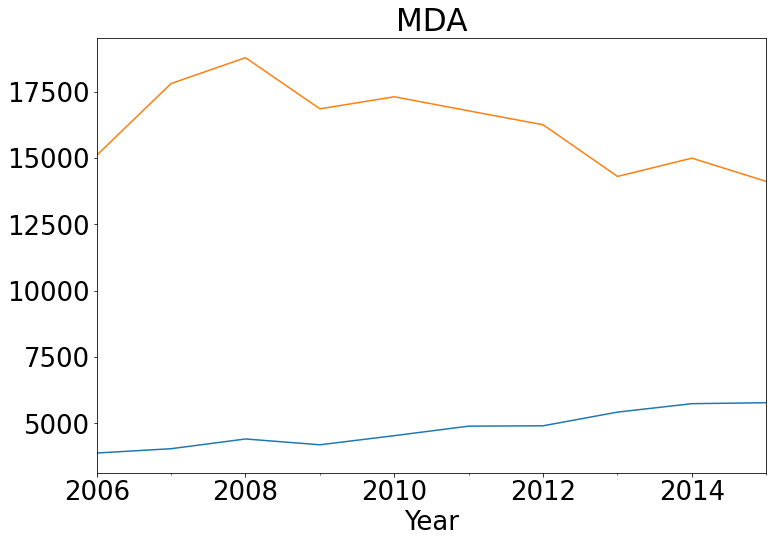

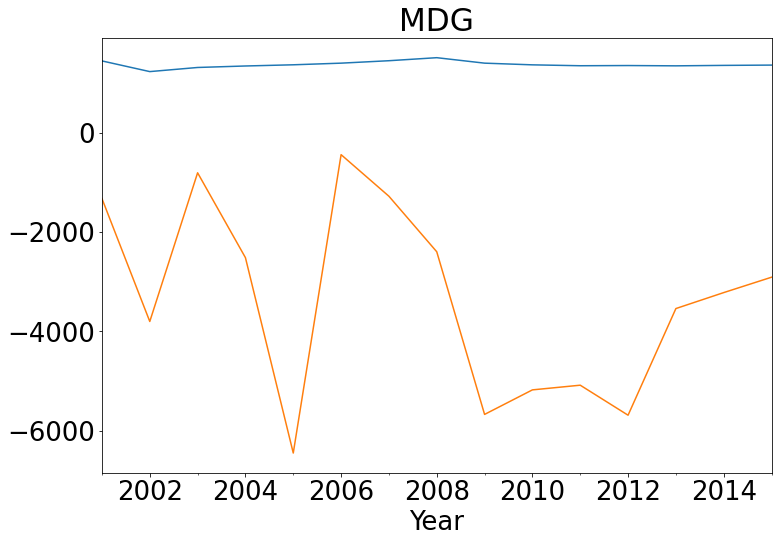

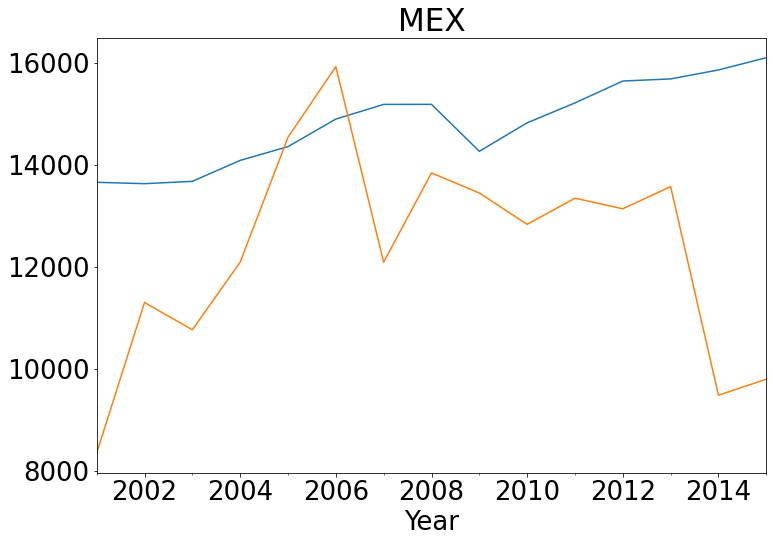

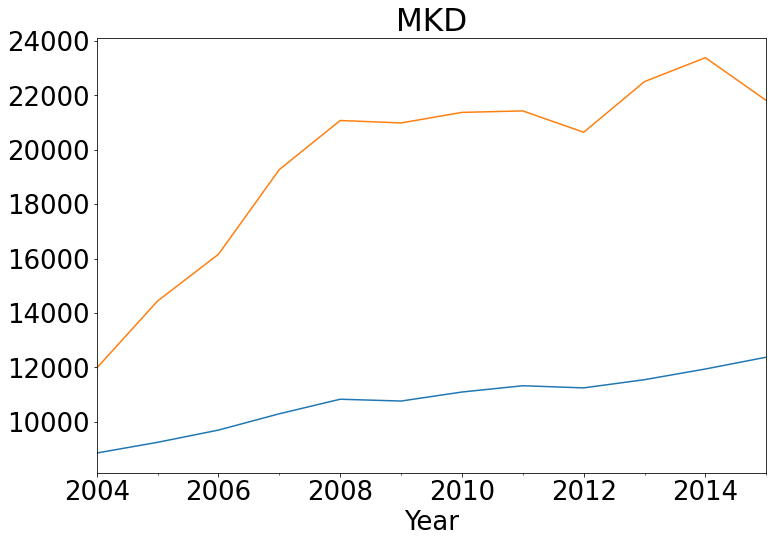

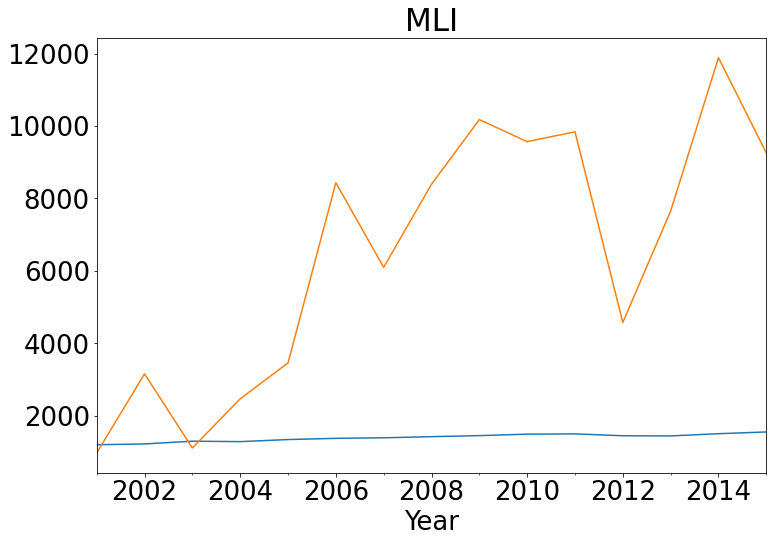

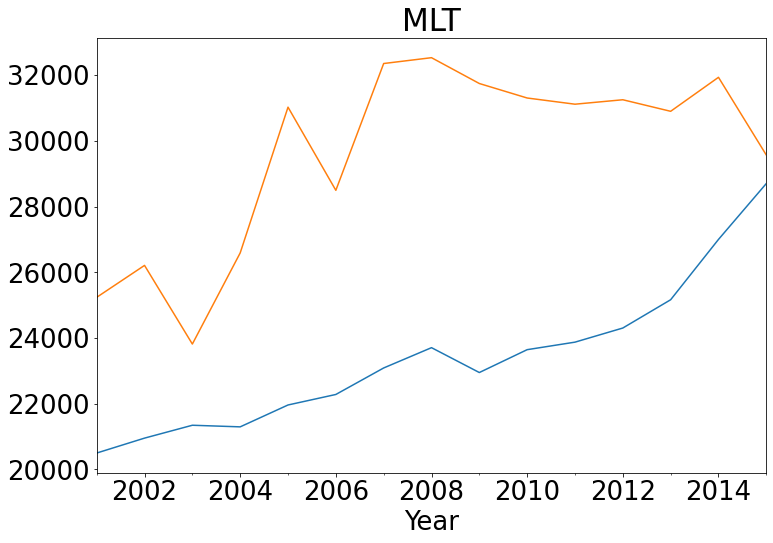

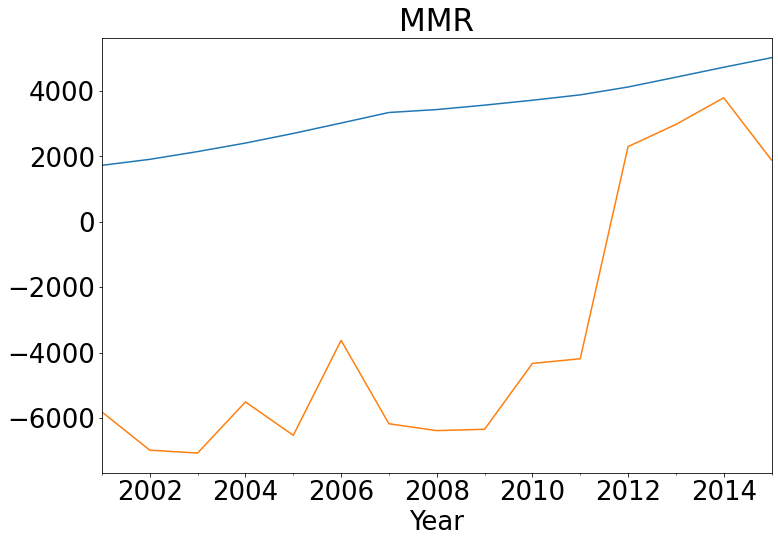

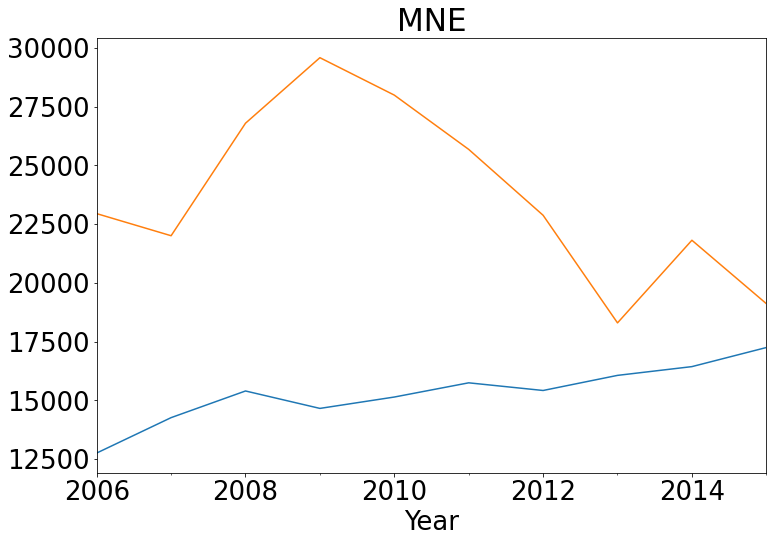

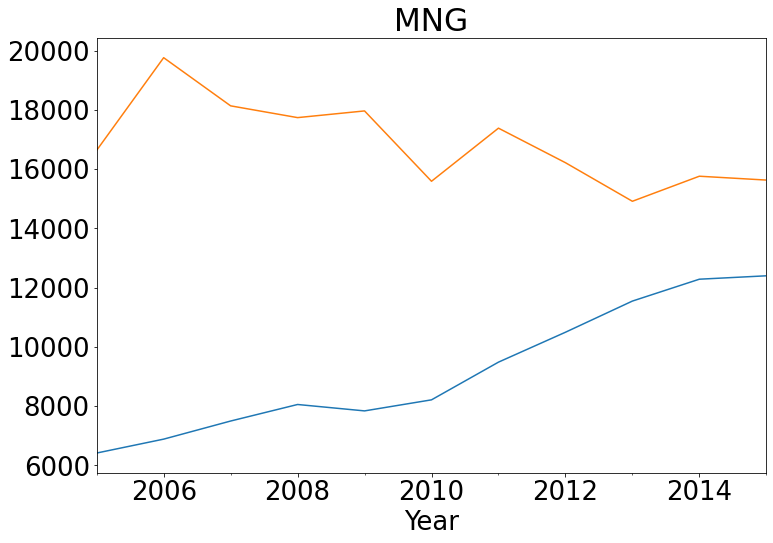

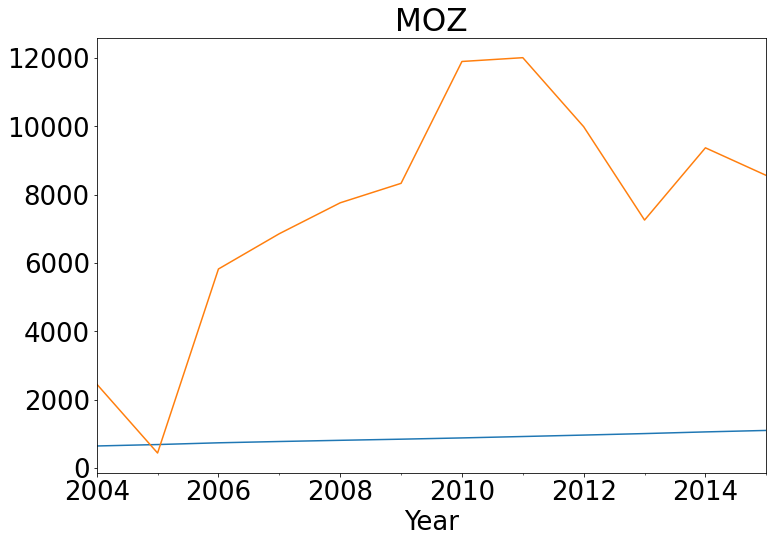

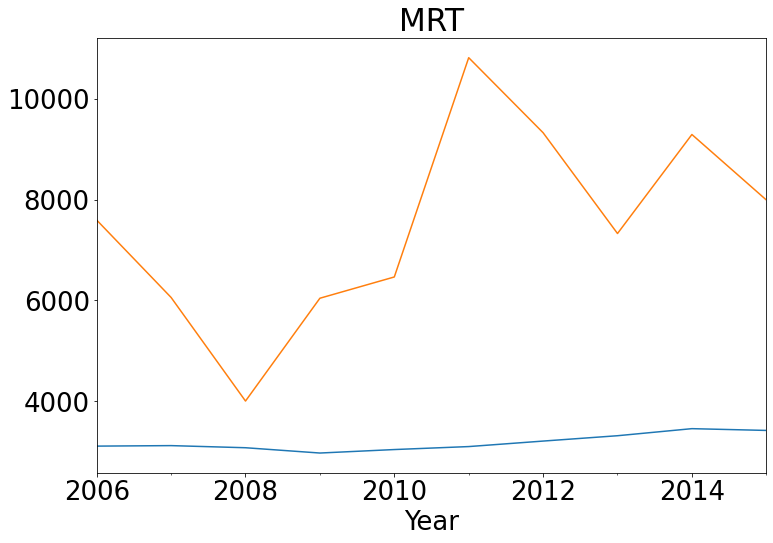

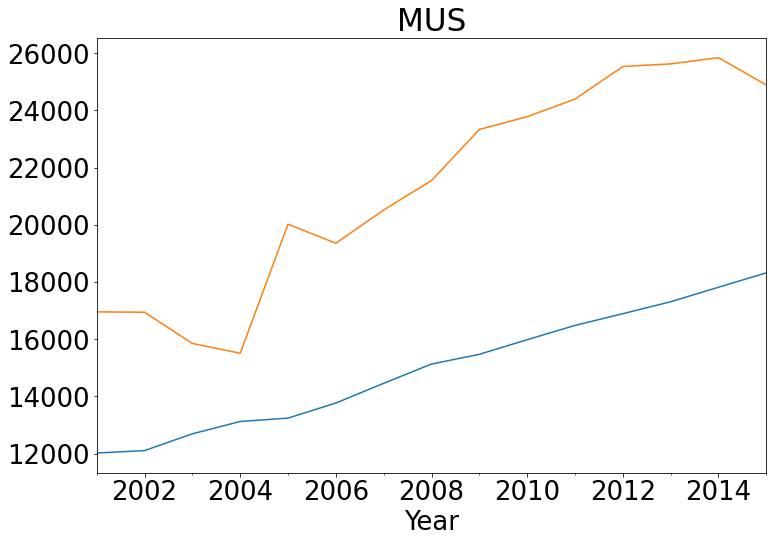

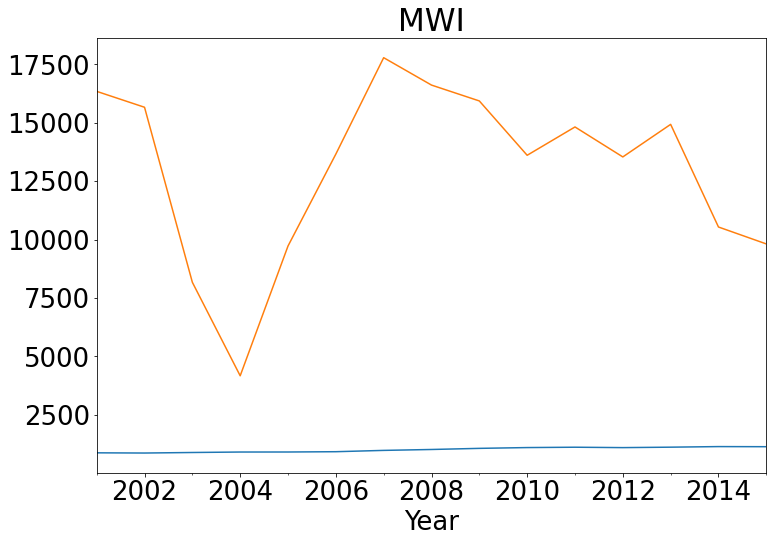

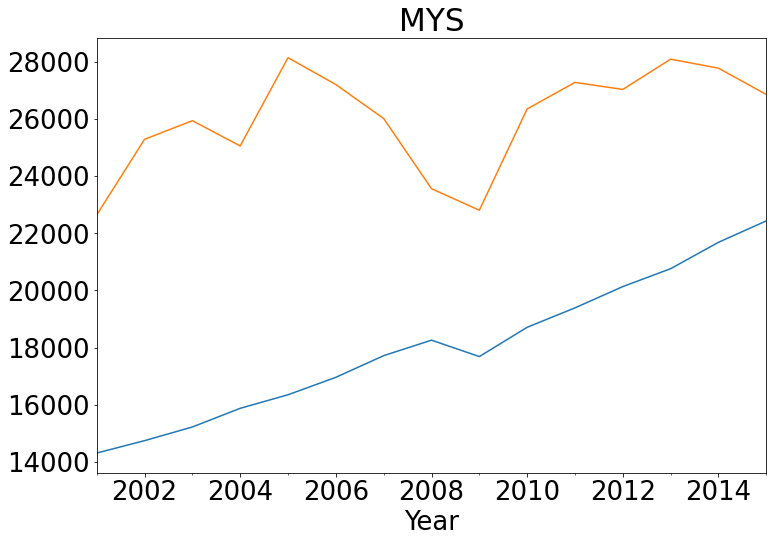

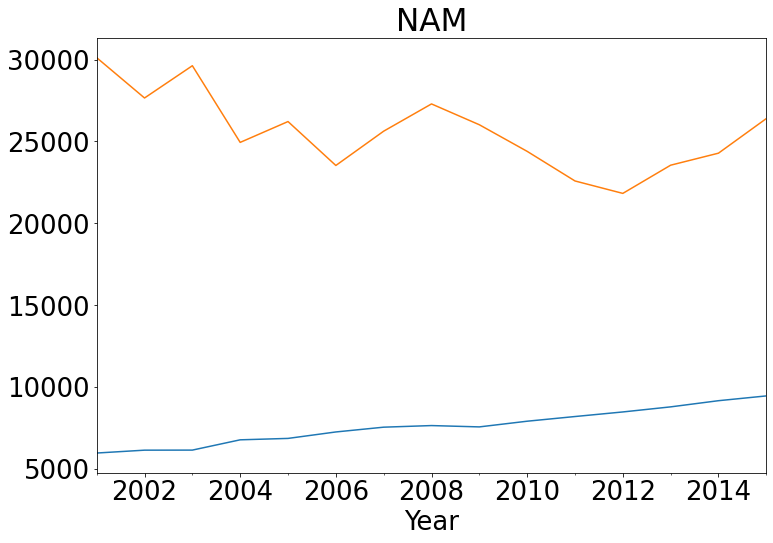

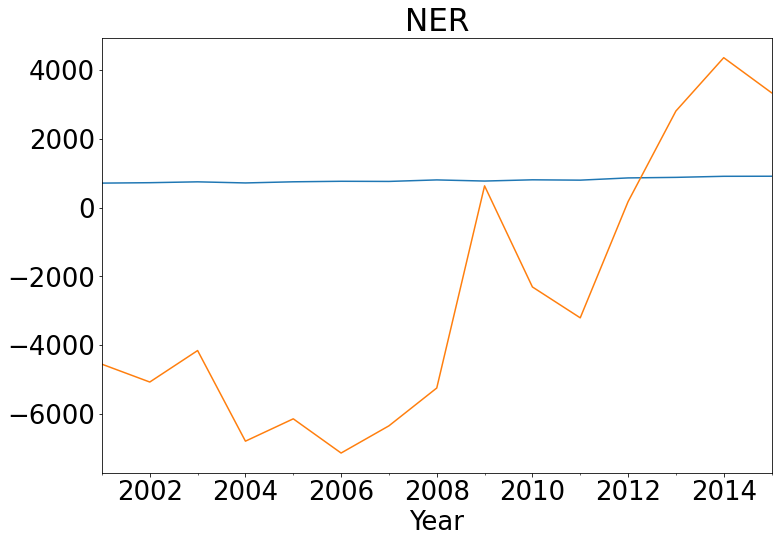

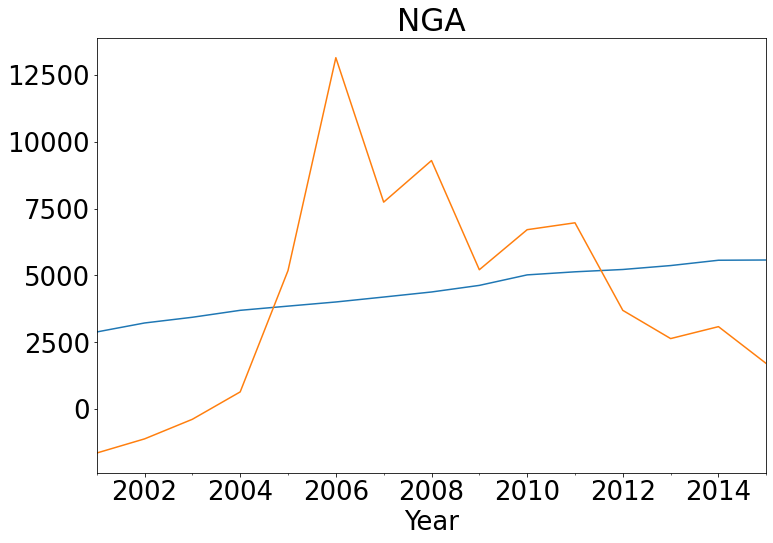

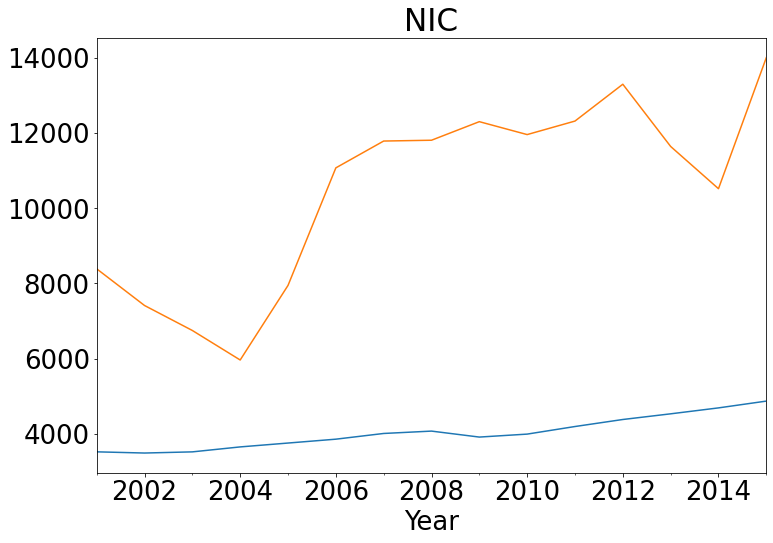

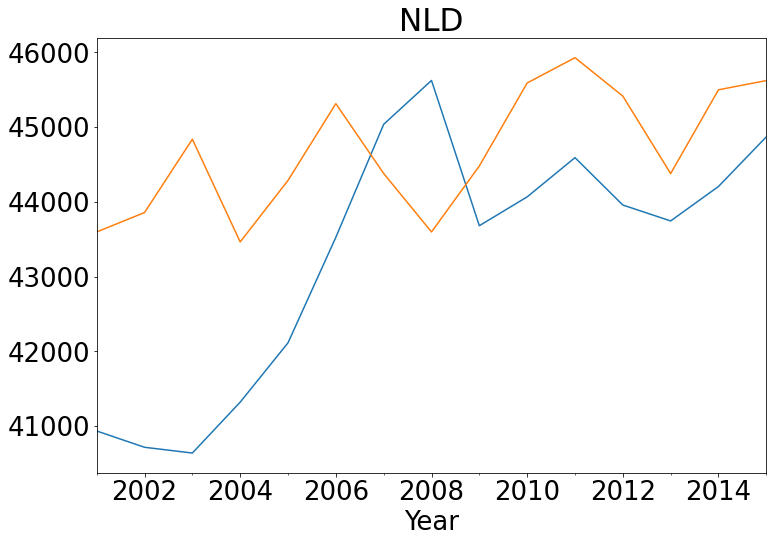

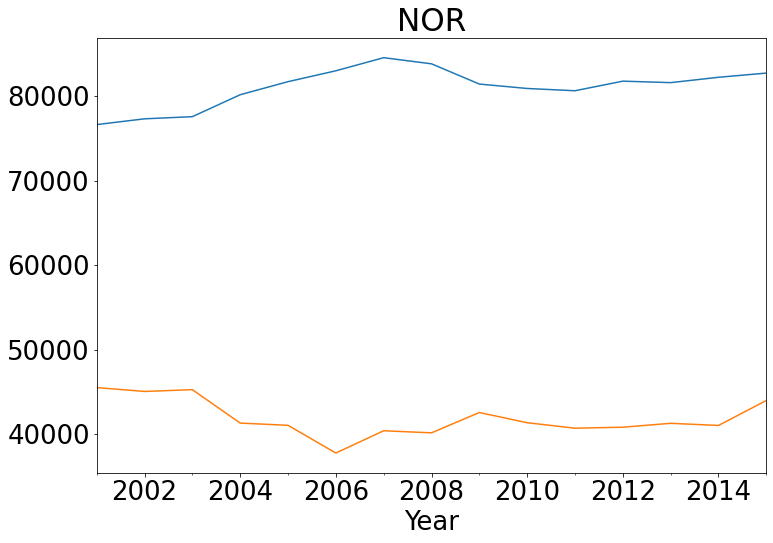

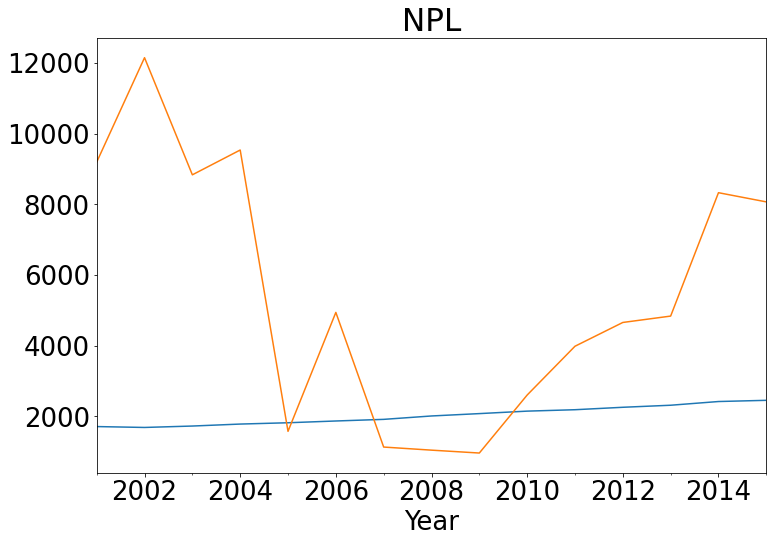

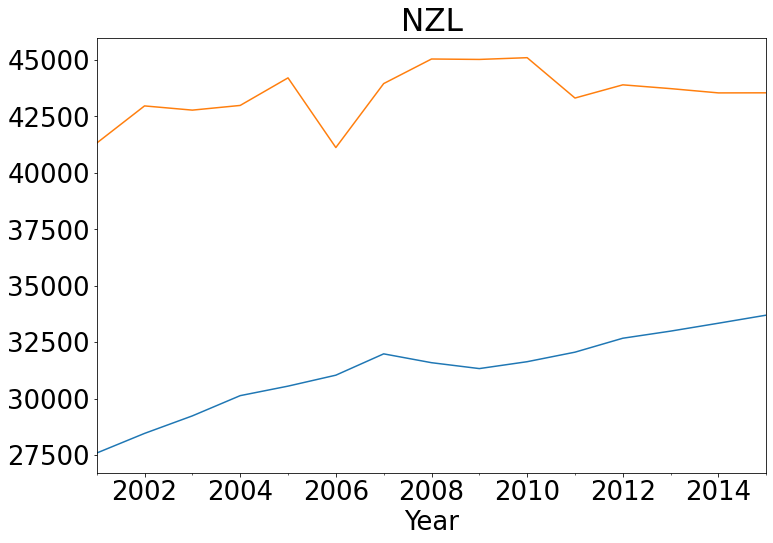

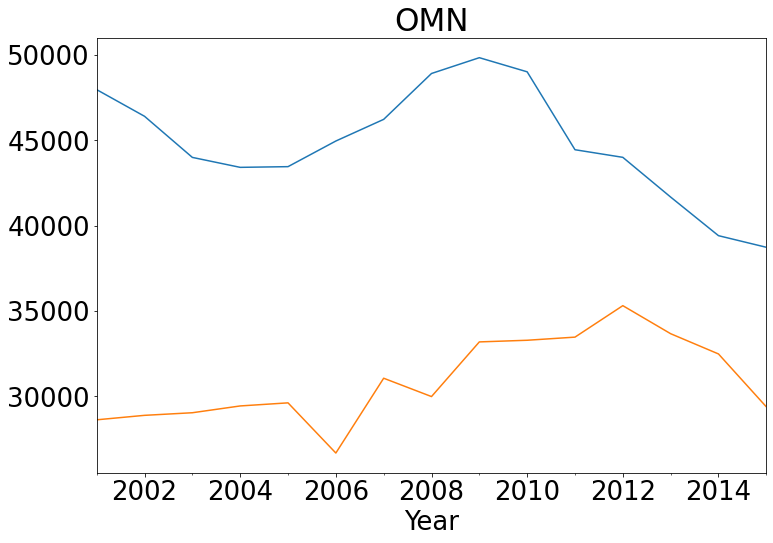

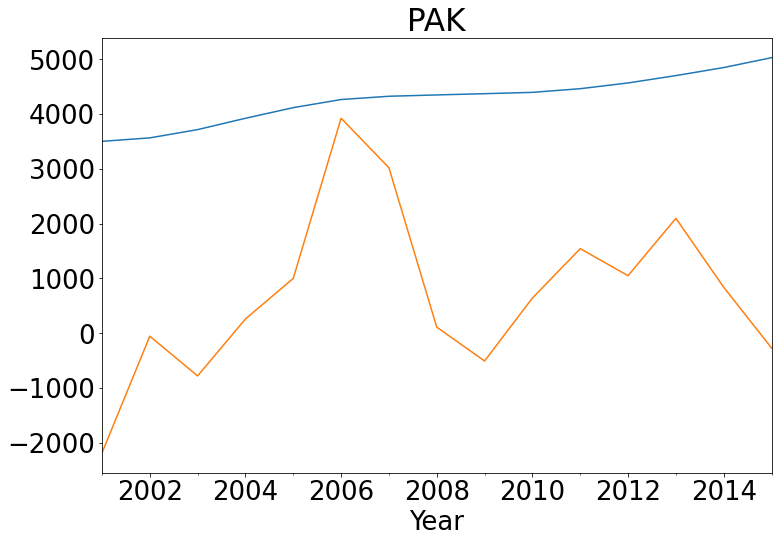

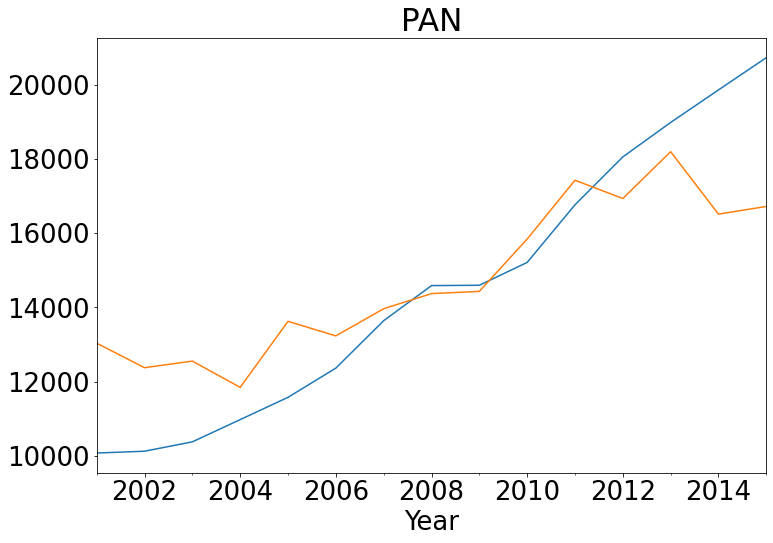

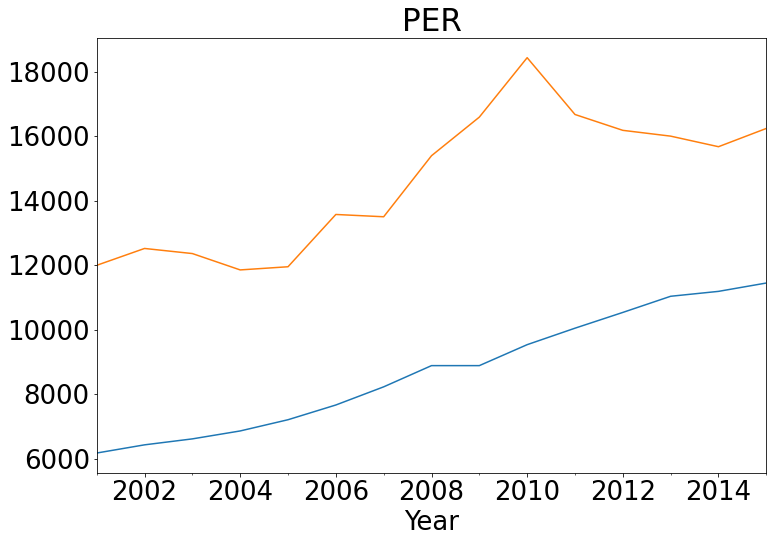

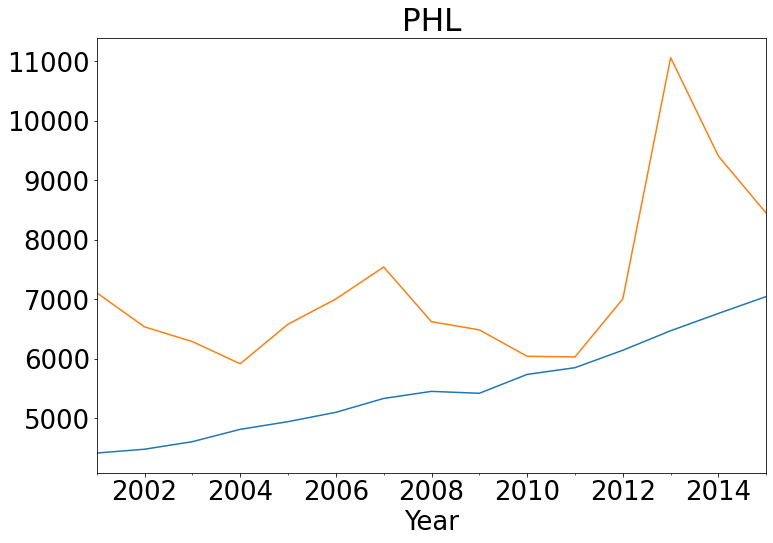

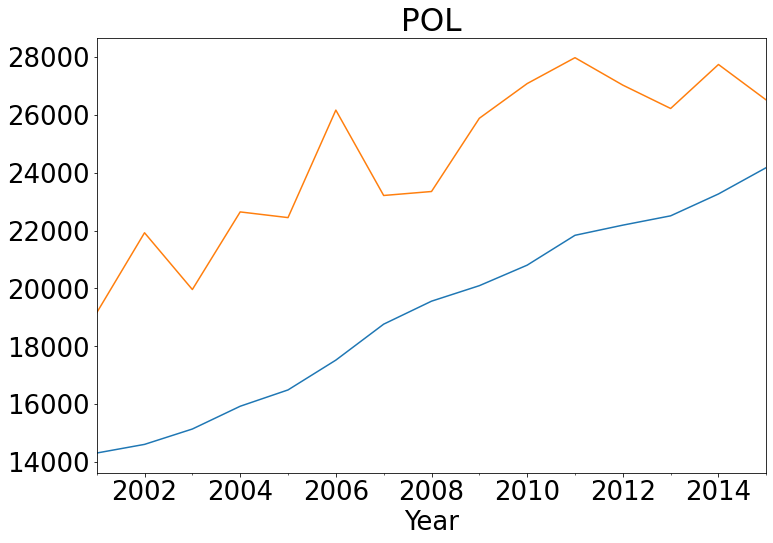

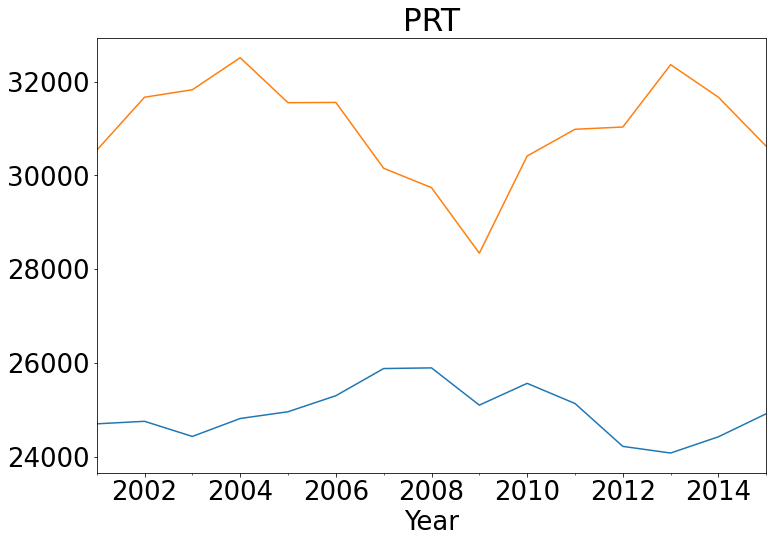

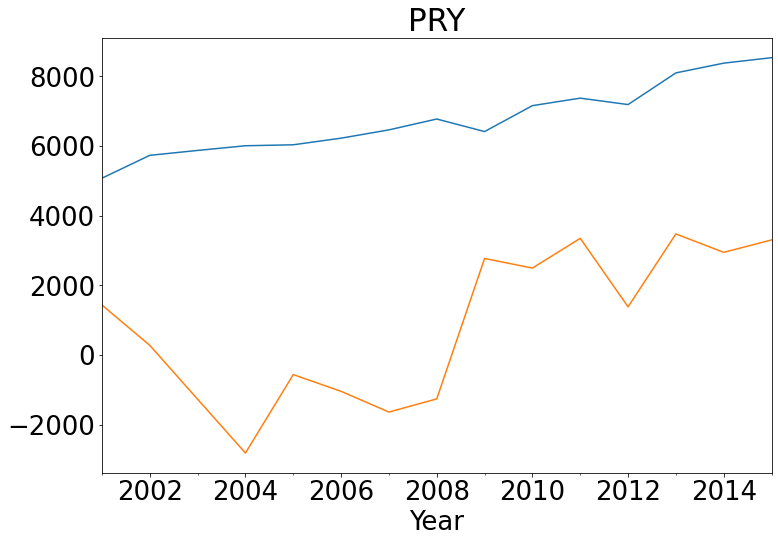

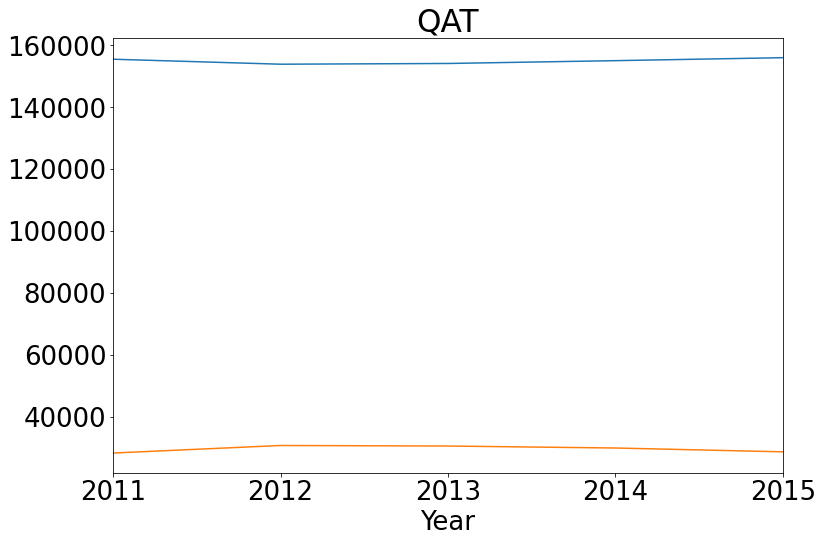

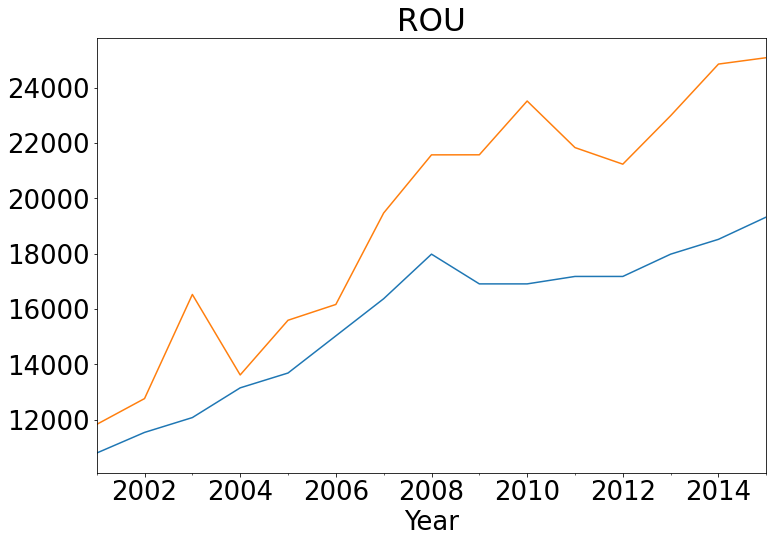

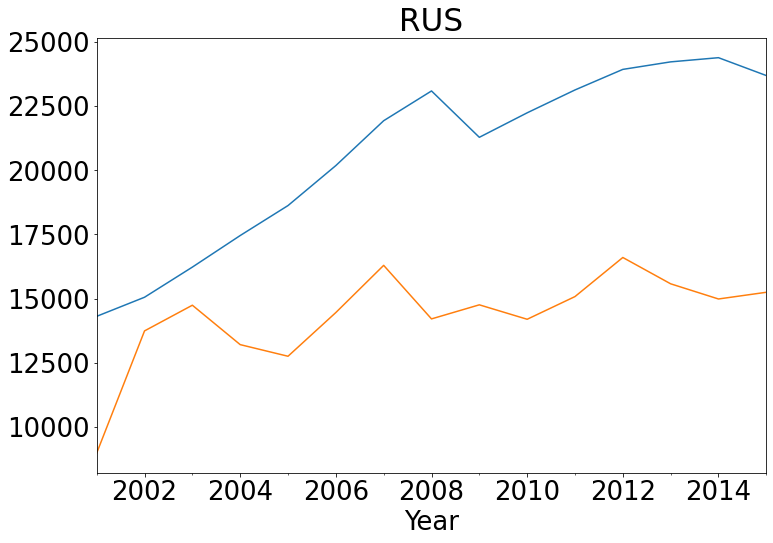

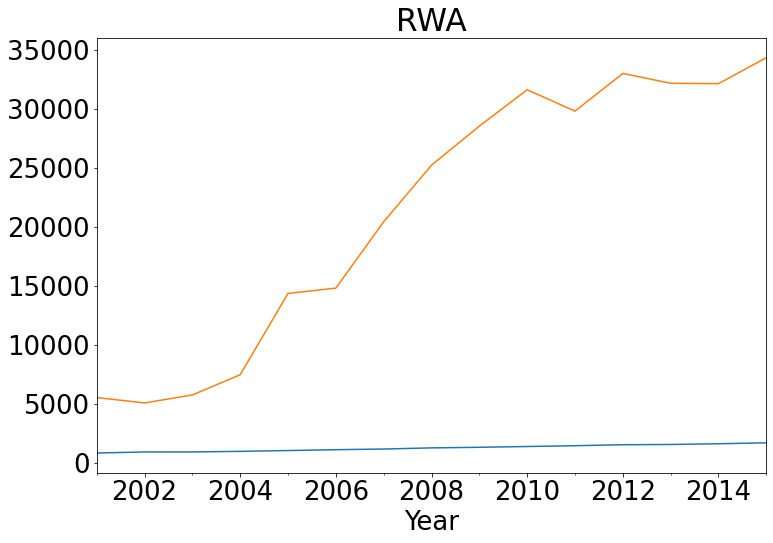

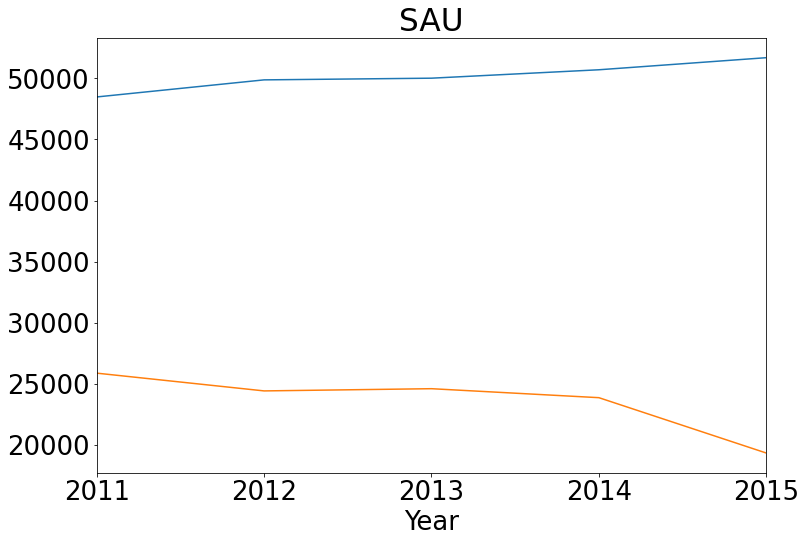

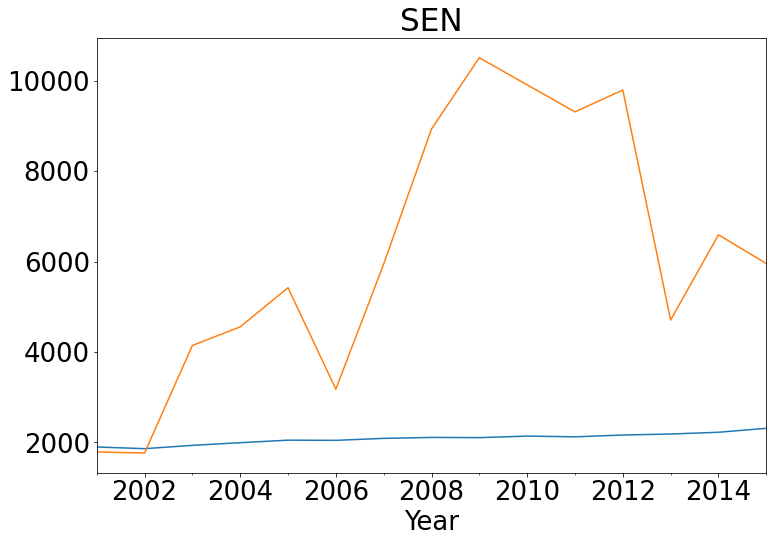

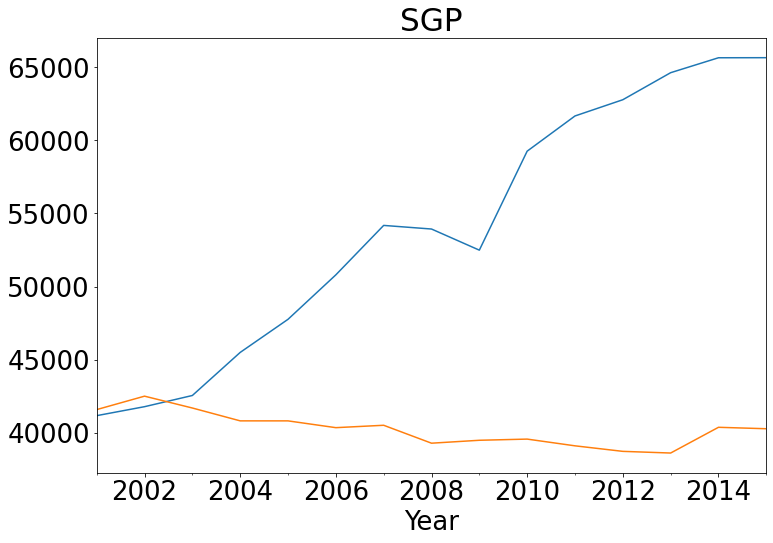

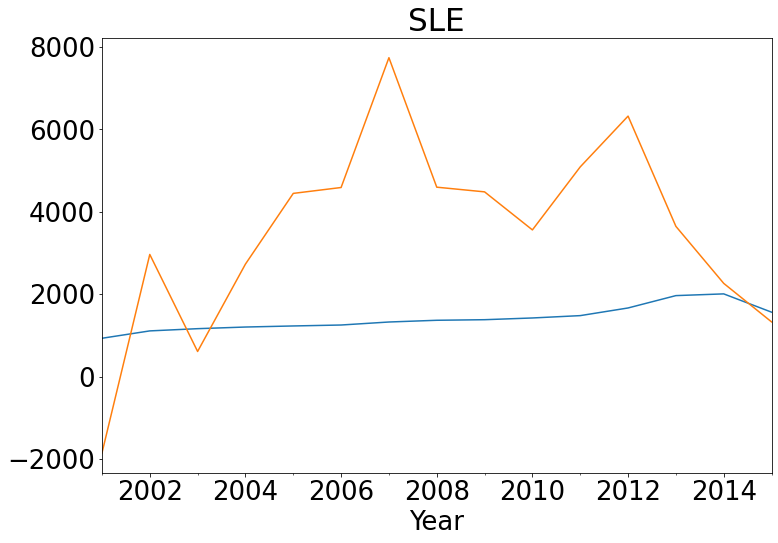

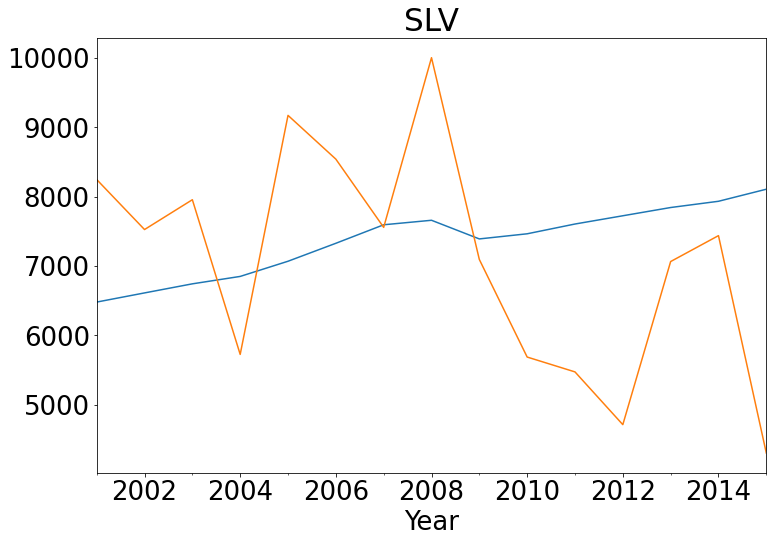

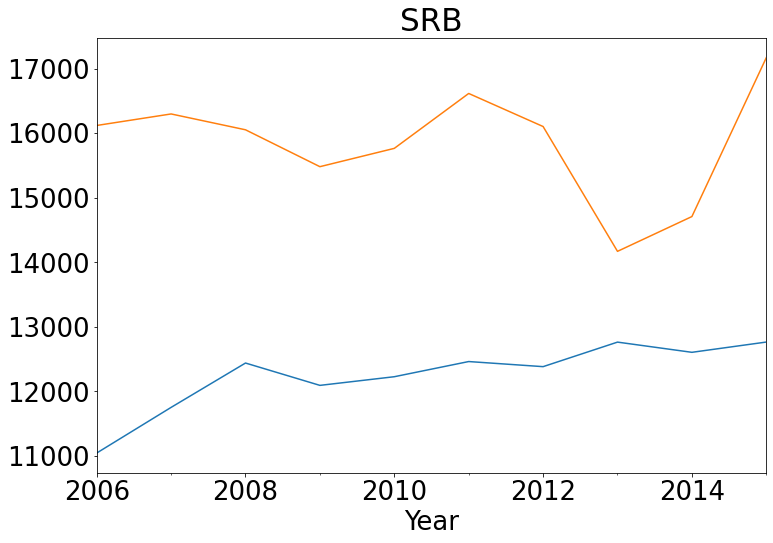

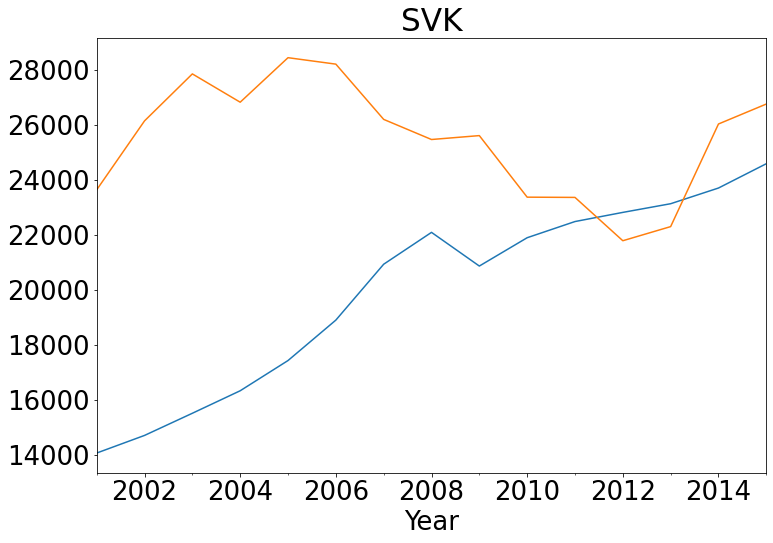

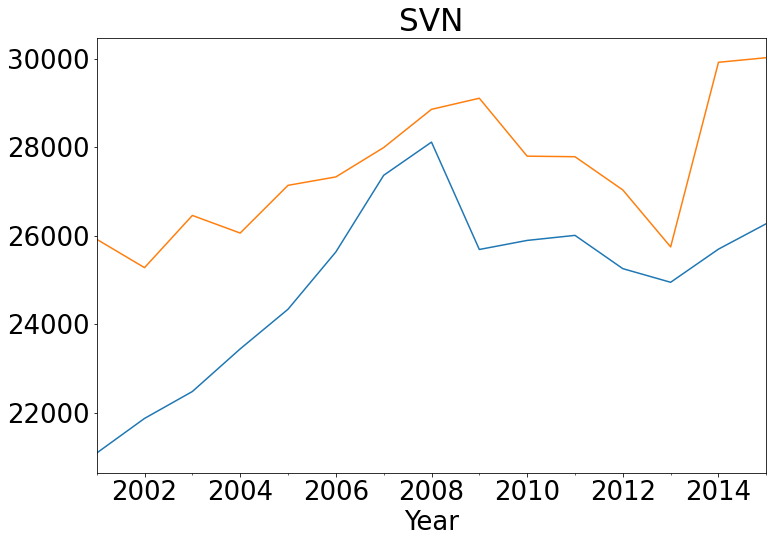

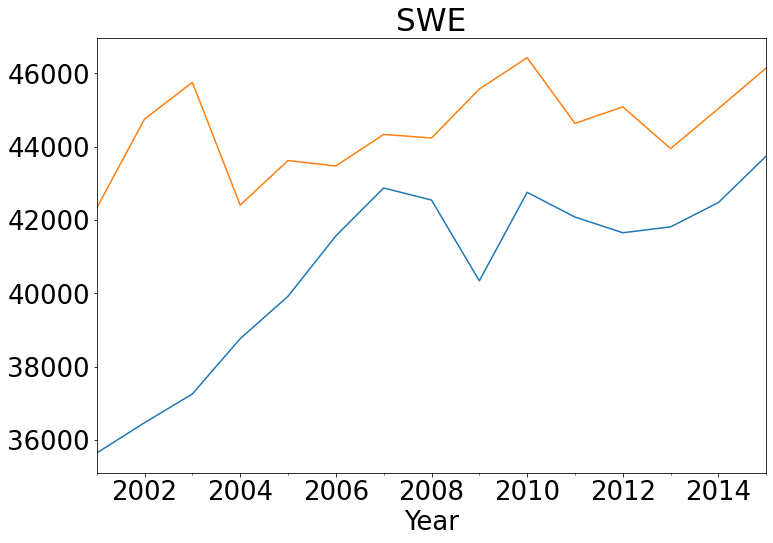

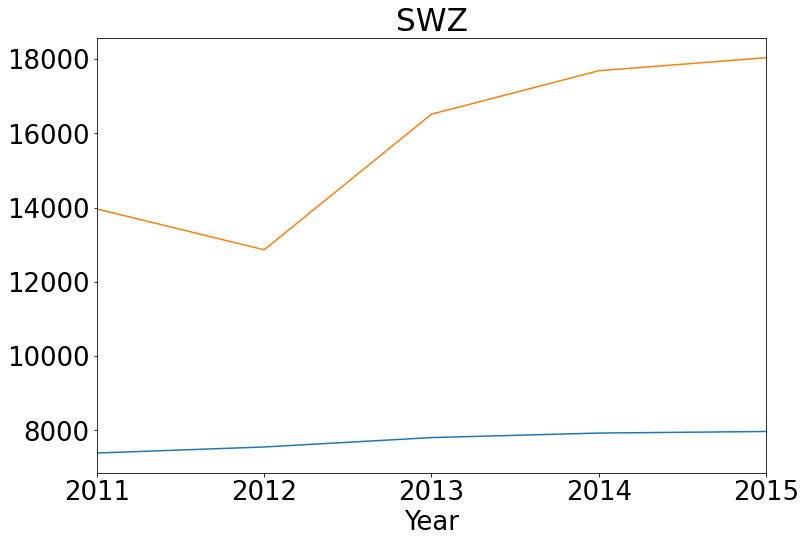

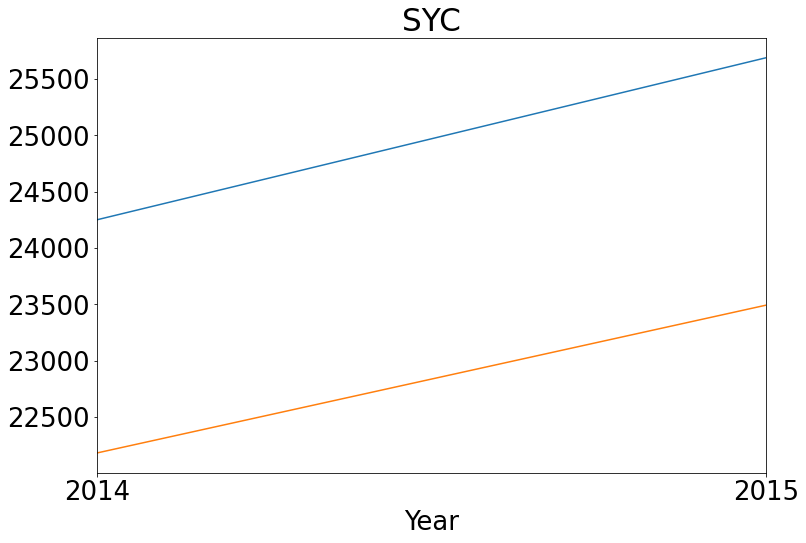

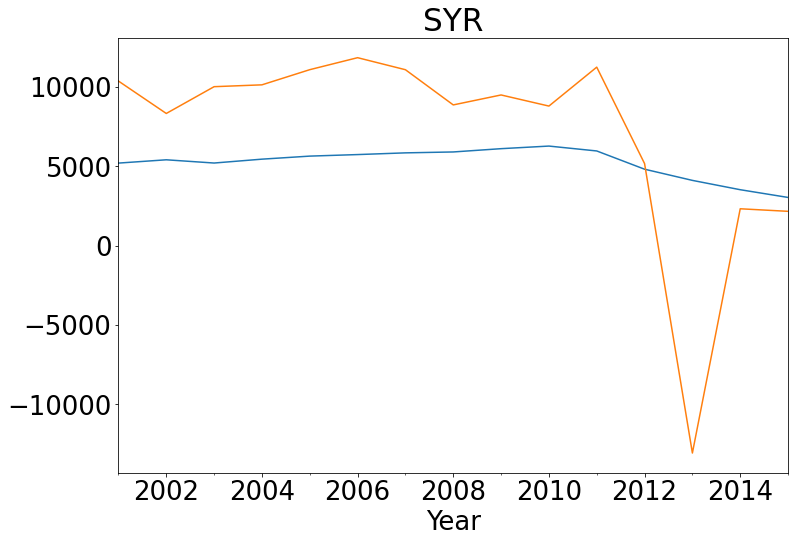

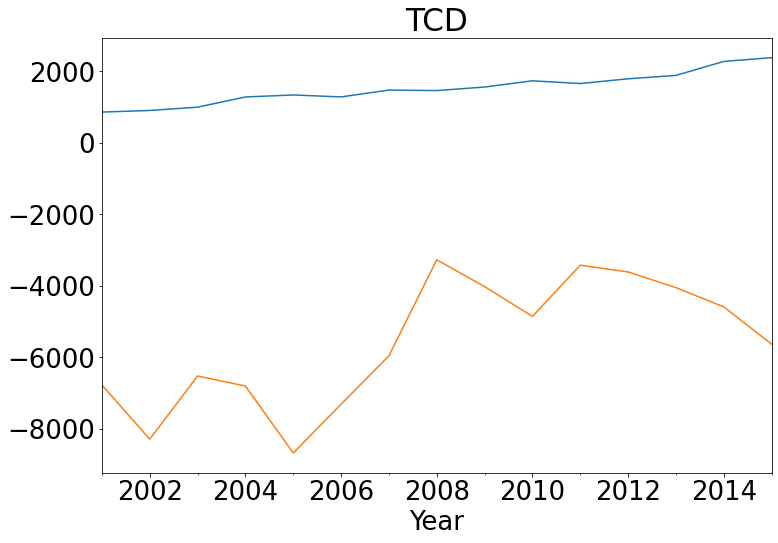

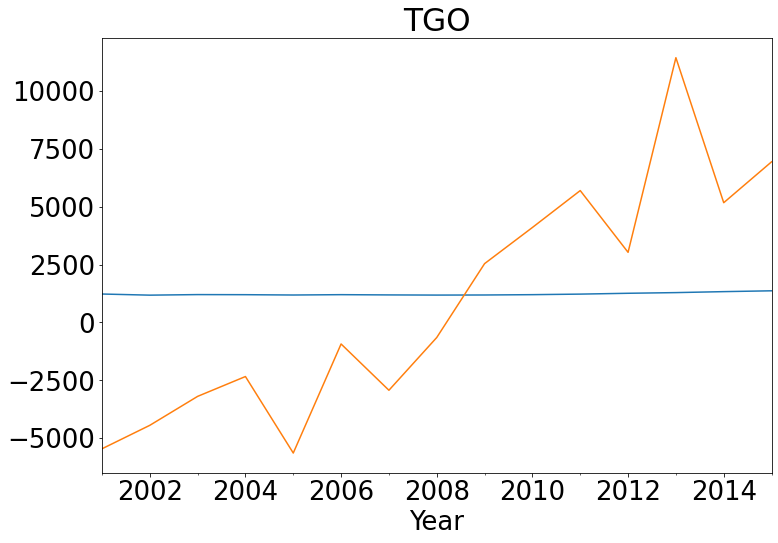

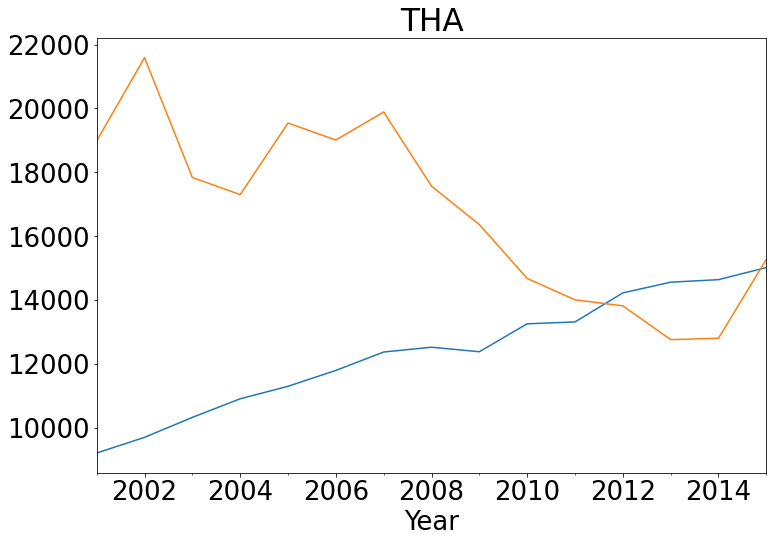

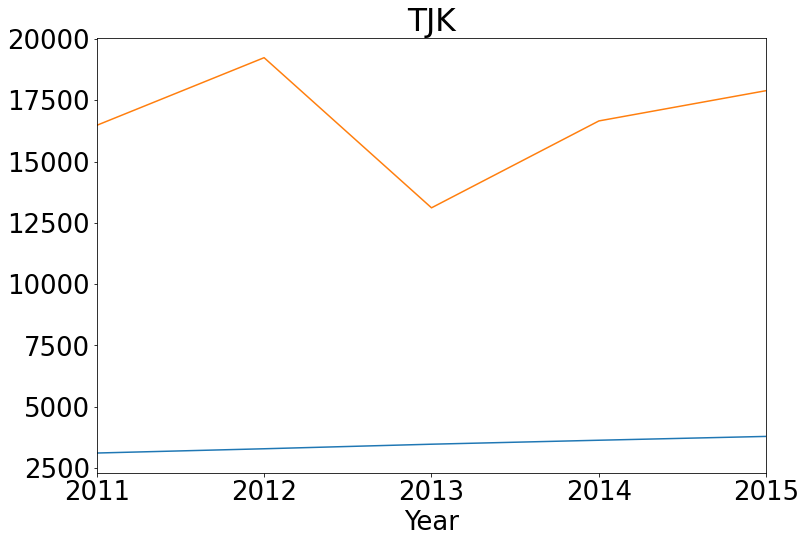

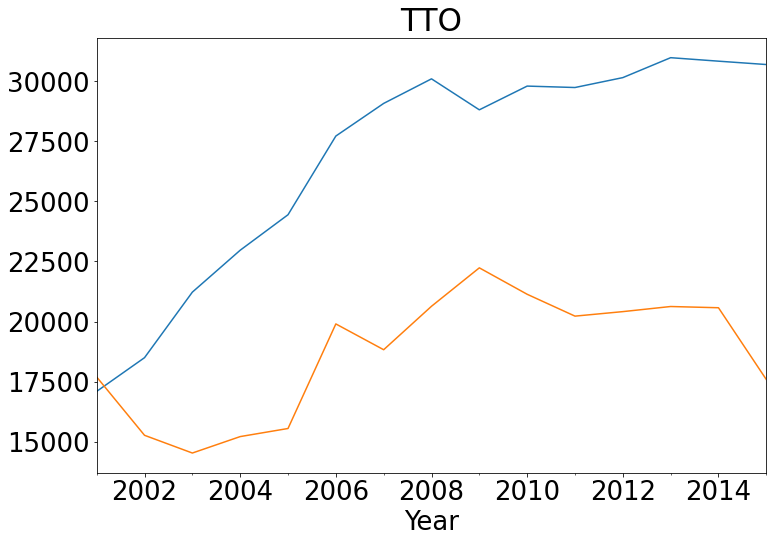

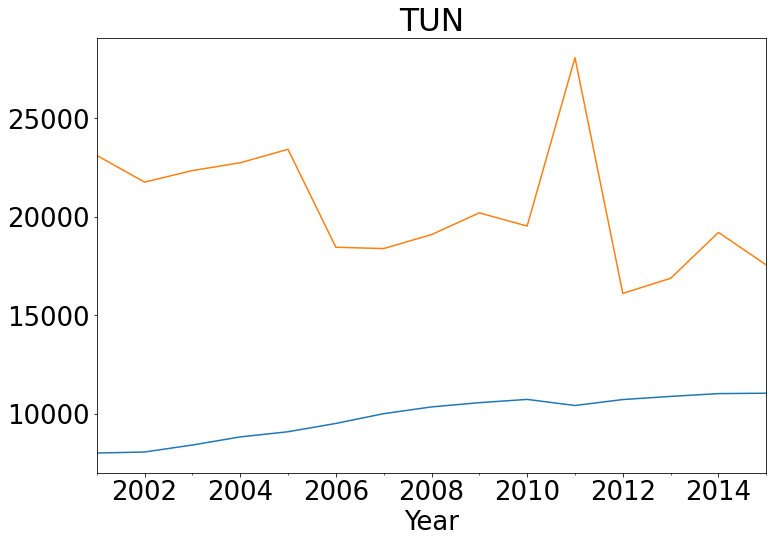

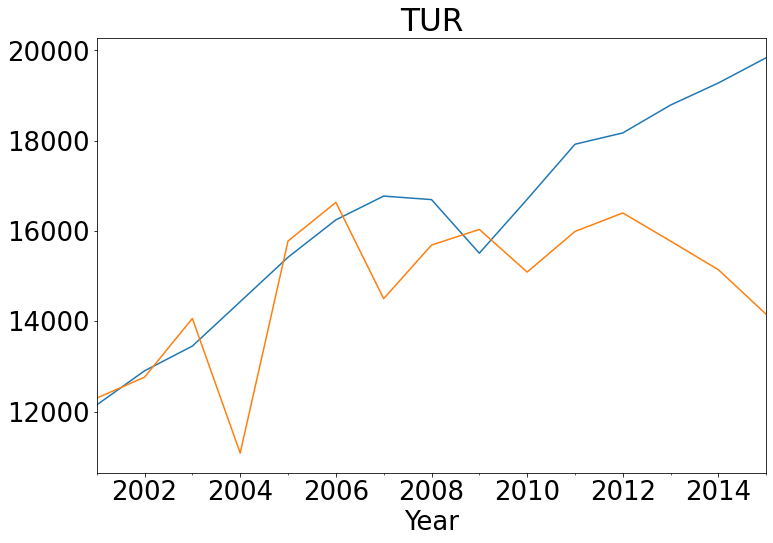

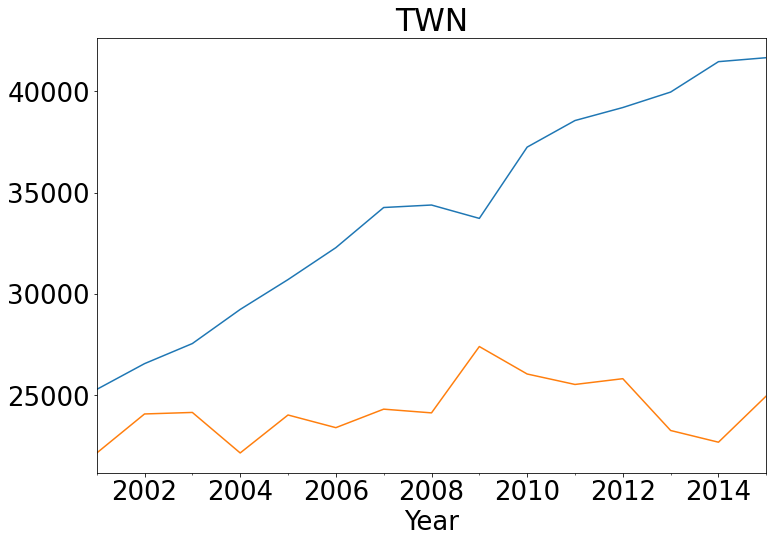

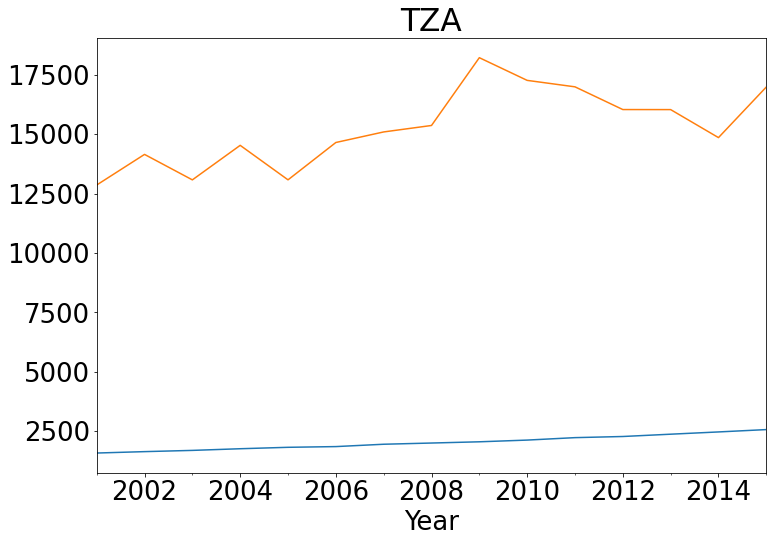

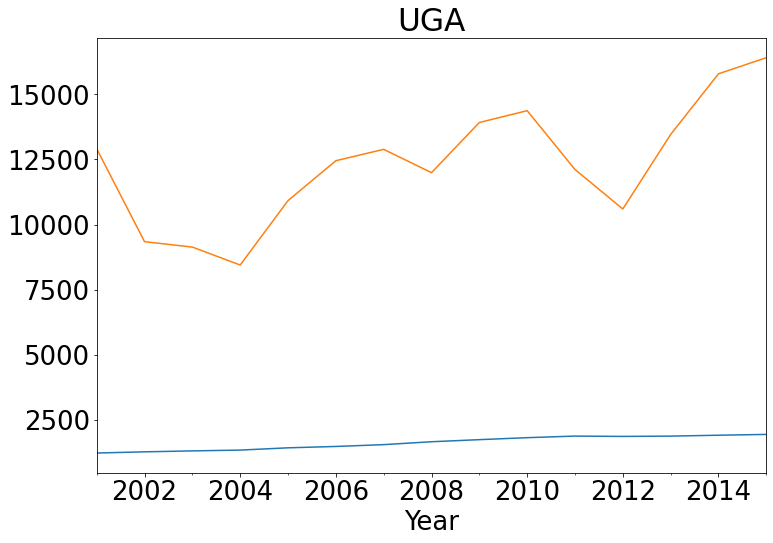

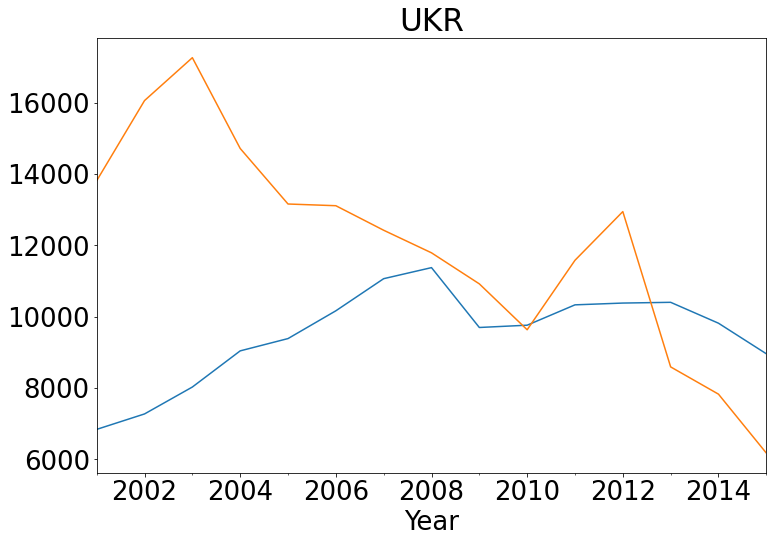

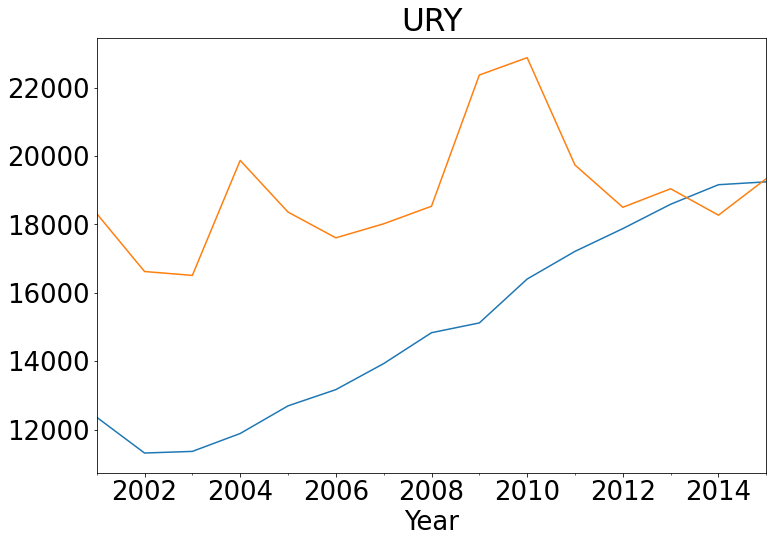

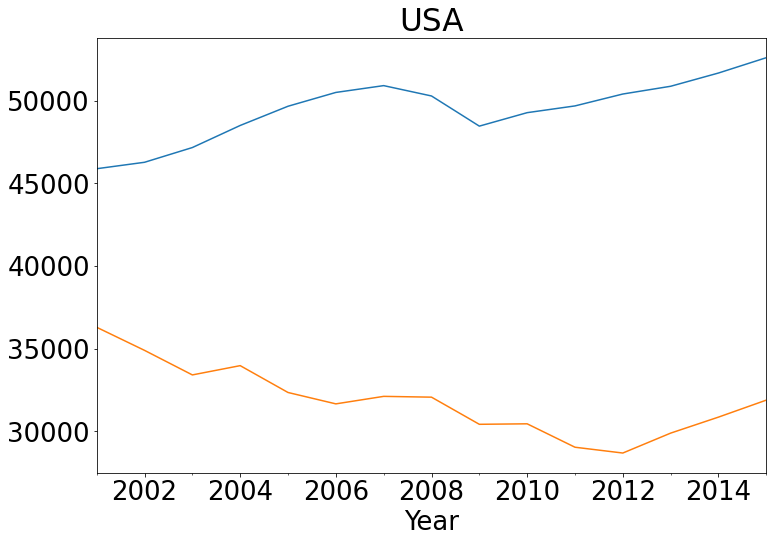

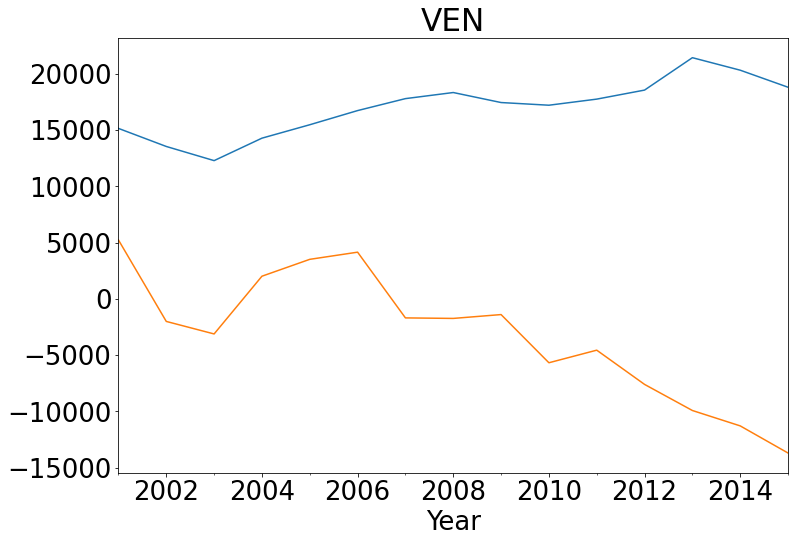

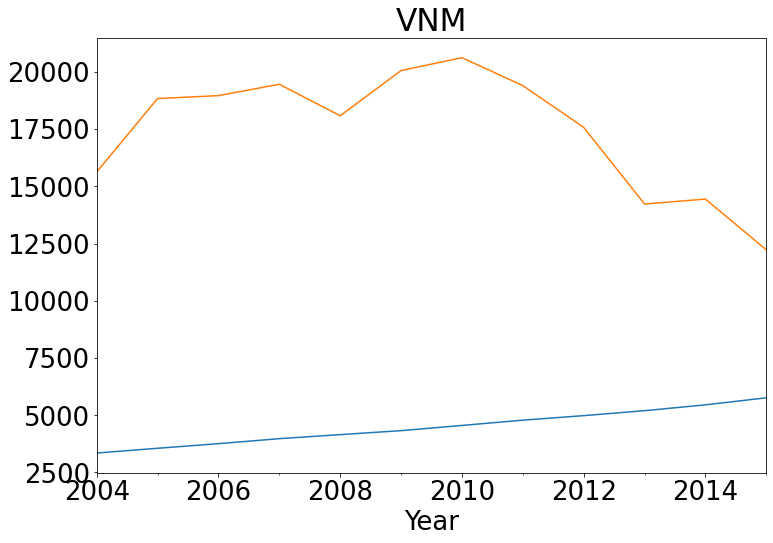

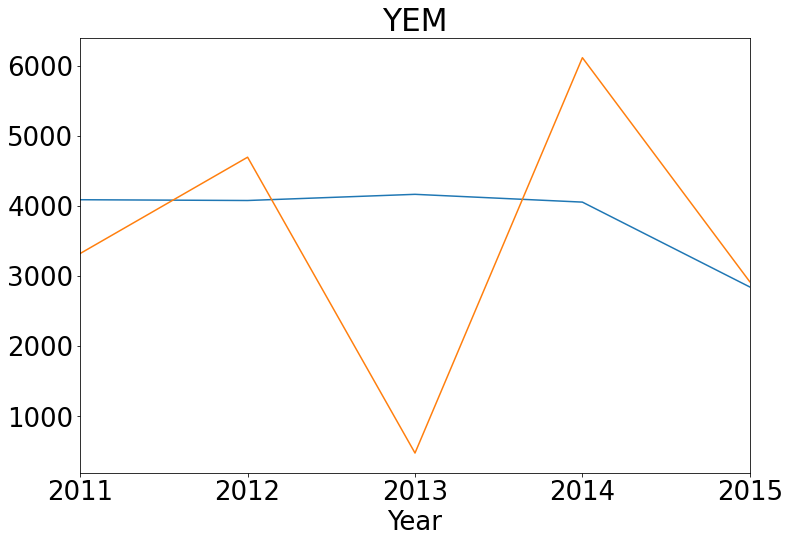

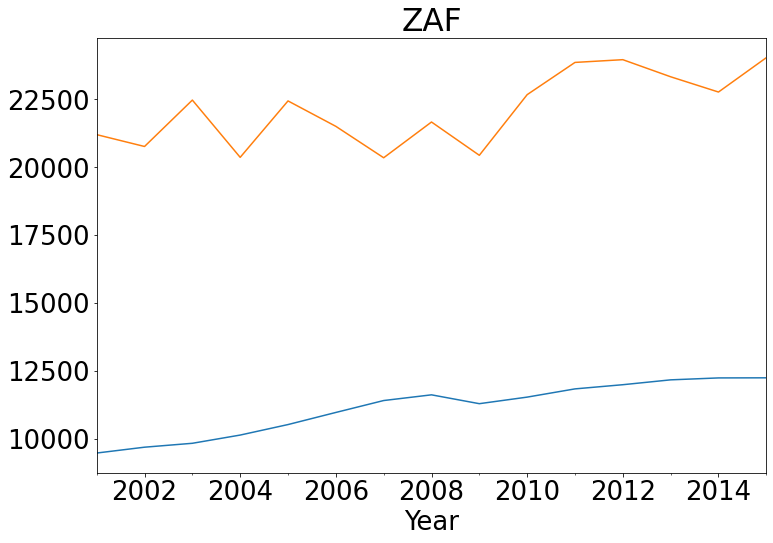

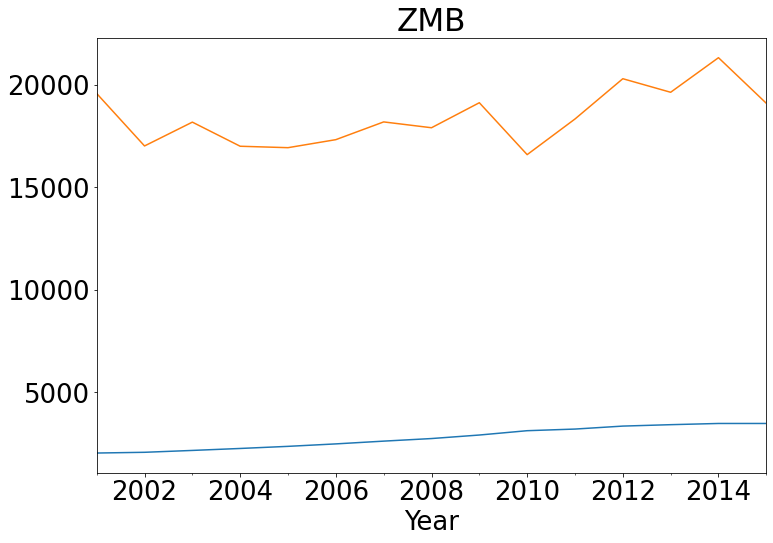

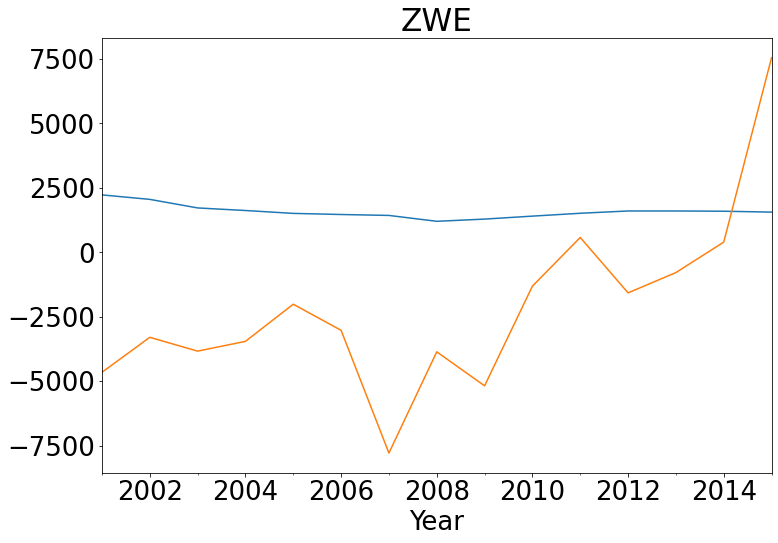

In [25]:
countries = reg_data.groupby("ISO_Code").mean().index
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
    ax.set_title(country)

In [26]:
reg_data = data
reg_data["RGDP Per Capita"] = data.groupby("ISO_Code")["RGDP Per Capita"].pct_change() 
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].shift() 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan).dropna(axis = 0, how = "any")
reg_data.loc["USA"]

<ipython-input-26-5bb3531fd236>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = data.groupby("ISO_Code")["RGDP Per Capita"].pct_change()
<ipython-input-26-5bb3531fd236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].shift()


EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2003-01-01  8.454976            7.830378                        7.803444   
2004-01-01  8.443225            7.717933                        7.767612   
2005-01-01  8.353783            7.706034                        7.540888   
2006-01-01  8.318497            7.701156                        7.360503   
2007-01-01  8.394524            7.790872                        7.447685   
2008-01-01  8.244885            7.496386                        7.409211   
2009-01-01  7.965853            7.147290                        7.188374   
2010-01-01  7.972577            7.108888                        7.143095   
2011-01-01  7.906265            7.260760                        6.957723   
2012-01-01  8.012288            7.565472                        7.016540   
2013-01-01  7.900998            7.097752                        6.974508   
2014-01-01  7.969703            7.126057                        7.099625   
2015-01-01  8.085664            7.121655                        7.226306   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2003-01-01     9.815523                          8.142189    8.683346   
2004-01-01     9.727209                          8.194439    8.808933   
2005-01-01     9.758164                          8.063767    8.700063   
2006-01-01     9.655075                          8.079715    8.796037   
2007-01-01     9.735613                          8.114240    8.884209   
2008-01-01     9.686262                          7.998733    8.633830   
2009-01-01     9.604751                          7.723552    8.165299   
2010-01-01     9.678239                          7.720760    8.211905   
2011-01-01     9.305630                          7.711284    8.295927   
2012-01-01     9.323542                          7.699527    8.456360   
2013-01-01     9.420297                          7.374713    8.637721   
2014-01-01     9.389649                          7.573566    8.659619   
2015-01-01     9.761051                          7.535949    8.783357   

            RGDP Per Capita  RGDP Per Capita Lag  
Year                                              
2003-01-01         0.019258             0.008479  
2004-01-01         0.028309             0.019258  
2005-01-01         0.023962             0.028309  
2006-01-01         0.016816             0.023962  
2007-01-01         0.008160             0.016816  
2008-01-01        -0.012298             0.008160  
2009-01-01        -0.036260            -0.012298  
2010-01-01         0.016800            -0.036260  
2011-01-01         0.008281             0.016800  
2012-01-01         0.014474             0.008281  
2013-01-01         0.009307             0.014474  
2014-01-01         0.015748             0.009307  
2015-01-01         0.017943             0.015748

In [27]:
reg_data.corr().round(2)

EFW  Size of Government  \
EFW                               1.00                0.26   
Size of Government                0.26                1.00   
Legal System & Property Rights    0.80               -0.17   
Sound Money                       0.85                0.11   
Freedom to trade internationally  0.89                0.15   
Regulation                        0.81                0.09   
RGDP Per Capita                  -0.01                0.11   
RGDP Per Capita Lag              -0.01                0.11   

                                  Legal System & Property Rights  Sound Money  \
EFW                                                         0.80         0.85   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.60   
Sound Money                                                 0.60         1.00   
Freedom to trade internationally                            0.67         0.76   
Regulation                                                  0.66         0.57   
RGDP Per Capita                                            -0.03        -0.05   
RGDP Per Capita Lag                                        -0.03        -0.05   

                                  Freedom to trade internationally  \
EFW                                                           0.89   
Size of Government                                            0.15   
Legal System & Property Rights                                0.67   
Sound Money                                                   0.76   
Freedom to trade internationally                              1.00   
Regulation                                                    0.67   
RGDP Per Capita                                              -0.01   
RGDP Per Capita Lag                                          -0.03   

                                  Regulation  RGDP Per Capita  \
EFW                                     0.81            -0.01   
Size of Government                      0.09             0.11   
Legal System & Property Rights          0.66            -0.03   
Sound Money                             0.57            -0.05   
Freedom to trade internationally        0.67            -0.01   
Regulation                              1.00            -0.01   
RGDP Per Capita                        -0.01             1.00   
RGDP Per Capita Lag                    -0.04             0.44   

                                  RGDP Per Capita Lag  
EFW                                             -0.01  
Size of Government                               0.11  
Legal System & Property Rights                  -0.03  
Sound Money                                     -0.05  
Freedom to trade internationally                -0.03  
Regulation                                      -0.04  
RGDP Per Capita                                  0.44  
RGDP Per Capita Lag                              1.00

In [28]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]

y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

<ipython-input-28-99b7cb5a04ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     69.79
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.75e-78
Time:                        00:12:41   Log-Likelihood:                 3185.8
No. Observations:                1703   AIC:                            -6358.
Df Residuals:                    1696   BIC:                            -6320.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0022      0.001      2.436      0.015       0.000       0.004
Legal System & Property Rights      -0.0002      0.001     -0.239      0.811      -0.002       0.001
Sound Money                         -0.0024      0.001     -2.533      0.011      -0.004      -0.001
Freedom to trade internationally     0.0019      0.001      1.346      0.179      -0.001       0.005
Regulation                           0.0009      0.001      0.705      0.481      -0.002       0.003
RGDP Per Capita Lag                  0.4205      0.021     19.564      0.000       0.378       0.463
Constant                            -0.0005      0.008     -0.060      0.952      -0.016       0.015
==============================================================================
Omnibus:                      679.970   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15811.493
Skew:                          -1.321   Prob(JB):                         0.00
Kurtosis:                      17.692   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Frequency'>

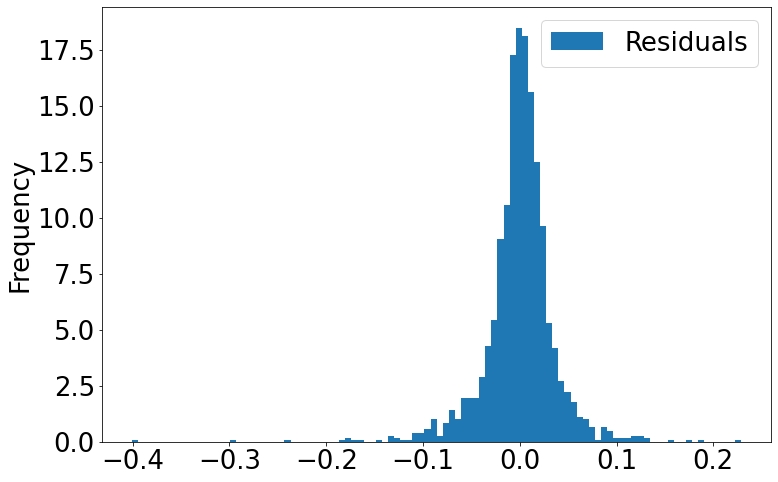

In [30]:
reg_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax, density = True)

In [31]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Size of Government                         0.002    2.436     0.015   
Legal System & Property Rights            -0.000   -0.239     0.811   
Sound Money                               -0.002   -2.533     0.011   
Freedom to trade internationally           0.002    1.346     0.179   
Regulation                                 0.001    0.705     0.481   
RGDP Per Capita Lag                        0.420   19.564     0.000   
Constant                                  -0.000   -0.060     0.952   

                                  Standard Errors  
Size of Government                          0.001  
Legal System & Property Rights              0.001  
Sound Money                                 0.001  
Freedom to trade internationally            0.001  
Regulation                                  0.001  
RGDP Per Capita Lag                         0.021  
Constant                                    0.008

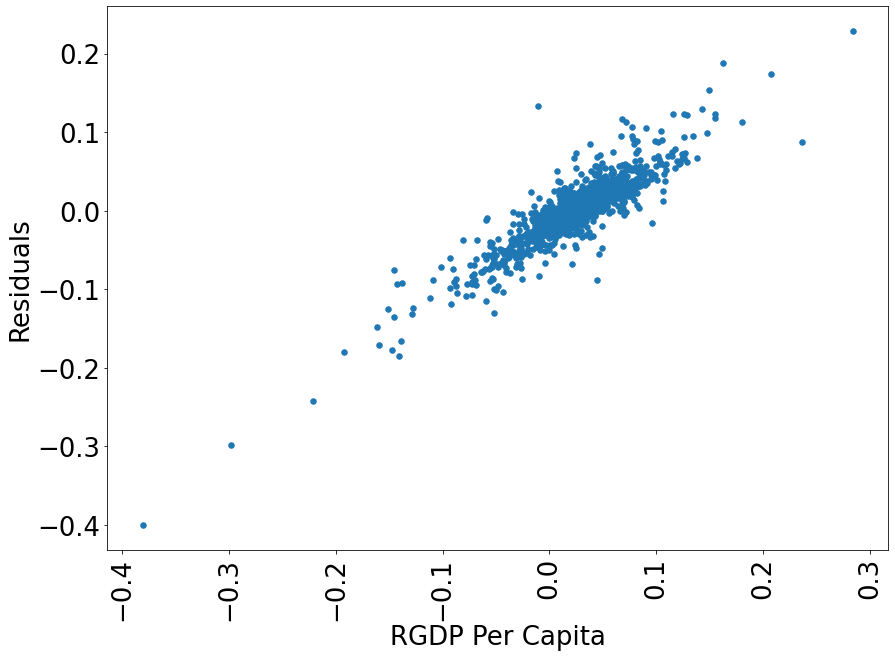

In [32]:
fig, ax = plt.subplots(figsize = (14, 10))
reg_data.plot.scatter(x=y_var[0],
                     y = "Residuals",
                     s = 30,
                     ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

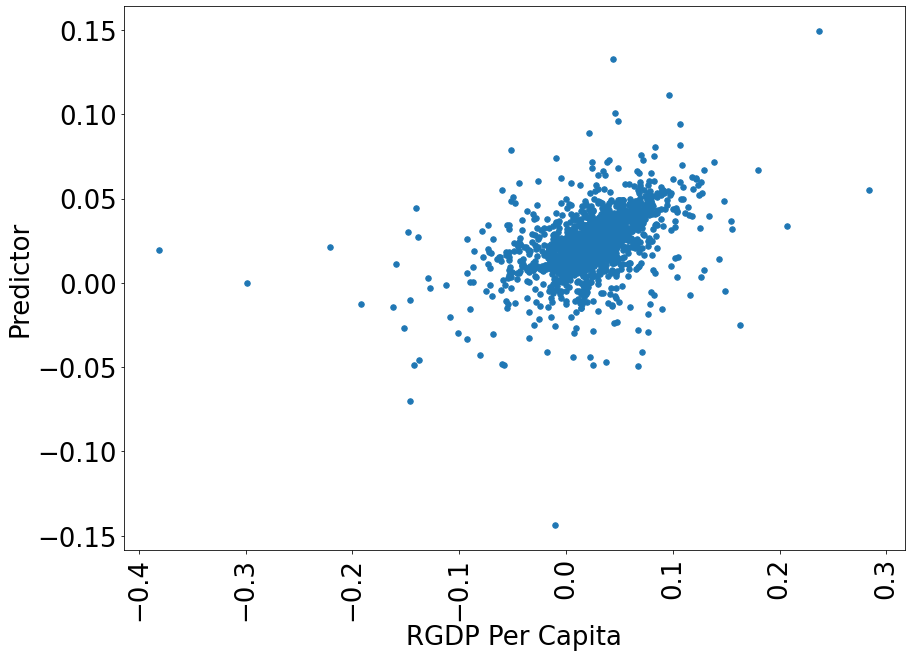

In [33]:
fig, ax = plt.subplots(figsize = (14, 10))
reg_data.plot.scatter(x=y_var[0],
                     y = "Predictor",
                     s = 30,
                     ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()